In [45]:
import numpy as np
import pandas as pd
from ase.io import read, write
from ase.io.extxyz import read_extxyz
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import seaborn as sns
from scipy.stats import kstest, ks_2samp, probplot
import os
from PIL import Image
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.image as image
from matplotlib.offsetbox import (AnnotationBbox, OffsetImage)


plt.rc('font', family="sans-serif", weight="bold")          # controls default text sizes
plt.rc('axes', labelsize=15, titlesize=15, labelweight="bold", titleweight="bold")    # x and y axes
plt.rc('xtick', labelsize=15)    # Major Ticks
plt.rc('ytick', labelsize=15)    # Major Ticks
plt.rc('xtick.minor', visible=True)    # Minor Ticks
plt.rc('ytick.minor', visible=True)    # Minor Ticks
plt.rc('legend', fontsize=10)    # Legend
plt.rc('figure', titlesize=10)  # Figure title


plt.rcParams['figure.dpi'] = 300
print(plt.rcParams['font.family'])
directory = "Data/Seeds/"

['sans-serif']


# Angles and Bond lengths

In [4]:
def get_all_angles(mol, indices):
    angles = np.zeros((len(indices), len(mol)))
    for i, atom in enumerate(mol):
        angles[:,i] = atom.get_angles(indices)
    return angles

angles_indices = np.array([[5, 0, 1], [4, 0, 1], [3, 0, 1], [5, 0, 3], [4, 0, 3], [4, 0, 5], [0, 1, 2], [0, 1, 6], [0, 1, 7], [6, 1, 7], [6, 1, 2], [7, 1, 2], [1, 2, 8]])

bond_matrix = np.zeros((9,9))
bonds = [[0, 1], [0, 4], [0, 5], [0, 3], [1, 2], [1, 6], [1, 7], [2, 8]]
for index in bonds:
    bond_matrix[index[0], index[1]] = 1

def get_distances(mol):
    distances = np.zeros((len(mol[0]), len(mol[0]), len(mol)))
    for i, atom in enumerate(mol):
        distances[:,:,i] = np.triu(atom.get_all_distances())
    return distances

## Distributions

In [3]:
ref_data = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
angles_indices = np.array([[5, 0, 1], [4, 0, 1], [3, 0, 1], [5, 0, 3], [4, 0, 3], [4, 0, 5], [0, 1, 2], [0, 1, 6], [0, 1, 7], [6, 1, 7], [6, 1, 2], [7, 1, 2], [1, mol1, mol2]])
angles_ref = get_all_angles(ref_data, angles_indices)
df_summary_angles = pd.DataFrame(columns=['file', 'min KS', 'max KS', 'mean KS', 'std KS'])
df_scores_angles = pd.DataFrame(columns=['file', '5, 0, 1', "4, 0, 1", "3, 0, 1", "5, 0, 3", "4, 0, 3", "4, 0, 5", "0, 1, 2", "0, 1, 6", "0, 1, 7", "6, 1, 7", "6, 1, 2", "7, 1, 2", "1, mol1, mol2"])
dist_ref = get_distances(ref_data)
df_summary_bonds = pd.DataFrame(columns=['file', 'min KS', 'max KS', 'mean KS', 'std KS'])
df_scores_bonds = pd.DataFrame(columns=["file", "0, 1", "0, 4", "0, 5", "0, 3", "1, 2", "1, 6", "1, 7", "mol1, mol2"])

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith("xyz"):
        print(filename)
        model_data = read(directory+filename, index=":")
        angles_model = get_all_angles(model_data, angles_indices)
        KS_scores_angles = np.zeros(angles_ref.shape[0])
        row_scores_angles = [filename]
        for i in range(angles_ref.shape[0]):
            KS_scores_angles[i] = kstest(angles_model[i, :], angles_ref[i, :])[1]
            row_scores_angles.append(KS_scores_angles[i])
        row_summary_angles = [filename, KS_scores_angles.min(), KS_scores_angles.max(), np.mean(KS_scores_angles), np.std(KS_scores_angles, ddof=1)]
        df_summary_angles.loc[len(df_scores_angles)] = row_summary_angles
        df_scores_angles.loc[len(df_scores_angles)] = row_scores_angles

        dist_model = get_distances(model_data)
        KS_scores_bonds = np.zeros(len(bonds))
        row_scores_bonds = [filename]
        for i, index in enumerate(bonds):
            KS_scores_bonds[i] = kstest(dist_model[index[0],index[1], :], dist_ref[index[0],index[1], :])[1]
            row_scores_bonds.append(KS_scores_bonds[i])
        row_summary_bonds = [filename, KS_scores_bonds.min(), KS_scores_bonds.max(), np.mean(KS_scores_bonds), np.std(KS_scores_bonds, ddof=1)]
        df_summary_bonds.loc[len(df_summary_bonds)] = row_summary_bonds
        df_scores_bonds.loc[len(df_scores_bonds)] = row_scores_bonds
        
df_summary_angles.to_csv(directory+"Angles_KS_summary_seeds.csv")        
df_scores_angles.to_csv(directory+"Angles_KS_scores_seeds.csv") 
        
df_summary_bonds.to_csv(directory+"Bonds_KS_summary_seeds.csv")        
df_scores_bonds.to_csv(directory+"Bonds_KS_scores_seeds.csv") 

EtOH_moldyn_data_500.xyz
EtOH_moldyn_data_700.xyz
Speed_up_ethanol12_2_700.xyz
SVD_not_regularized12_2_500.xyz
SVD_not_regularized15_4_500.xyz
SVD_not_regularized15_4_700.xyz
SVD_regularized12_2_500.xyz
SVD_regularized12_2_500_v2.xyz
SVD_regularized12_2_700.xyz
SVD_regularized12_2_700_v2.xyz
SVD_regularized15_4_500.xyz
SVD_regularized15_4_700.xyz
Velverlet_12_500.xyz
Velverlet_12_700.xyz


In [5]:
ref_data = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
mol_12_2 = read(directory+"SVD_not_regularized12_2_500.xyz", index=":")
velver = read(directory+"Velverlet_12_500.xyz", index=":")
mol_r_12_2 = read(directory+"SVD_regularized12_2_500_v2.xyz", index=":")
mol_15_4 = read(directory+"SVD_not_regularized15_4_500.xyz", index=":")
mol_r_15_4 = read(directory+"SVD_regularized15_4_500.xyz", index=":")
ref_2_data = read(directory+"EtOH_moldyn_data_700.xyz", index=":")
angles_ref = get_all_angles(ref_data, angles_indices)
dist_ref = get_distances(ref_data)
angles_data =  [get_all_angles(mol_r_12_2, angles_indices)]
angles_data.append(get_all_angles(mol_12_2, angles_indices))
angles_data.append(get_all_angles(mol_15_4, angles_indices))
angles_data.append(get_all_angles(mol_r_15_4, angles_indices))
angles_data.append(get_all_angles(velver, angles_indices))
angles_data.append(get_all_angles(ref_2_data, angles_indices))

bonds_data = [get_distances(mol_r_12_2)]
bonds_data.append(get_distances(mol_12_2))
bonds_data.append(get_distances(mol_15_4))
bonds_data.append(get_distances(mol_r_15_4))
bonds_data.append(get_distances(velver))
bonds_data.append(get_distances(ref_2_data))

### Histograms

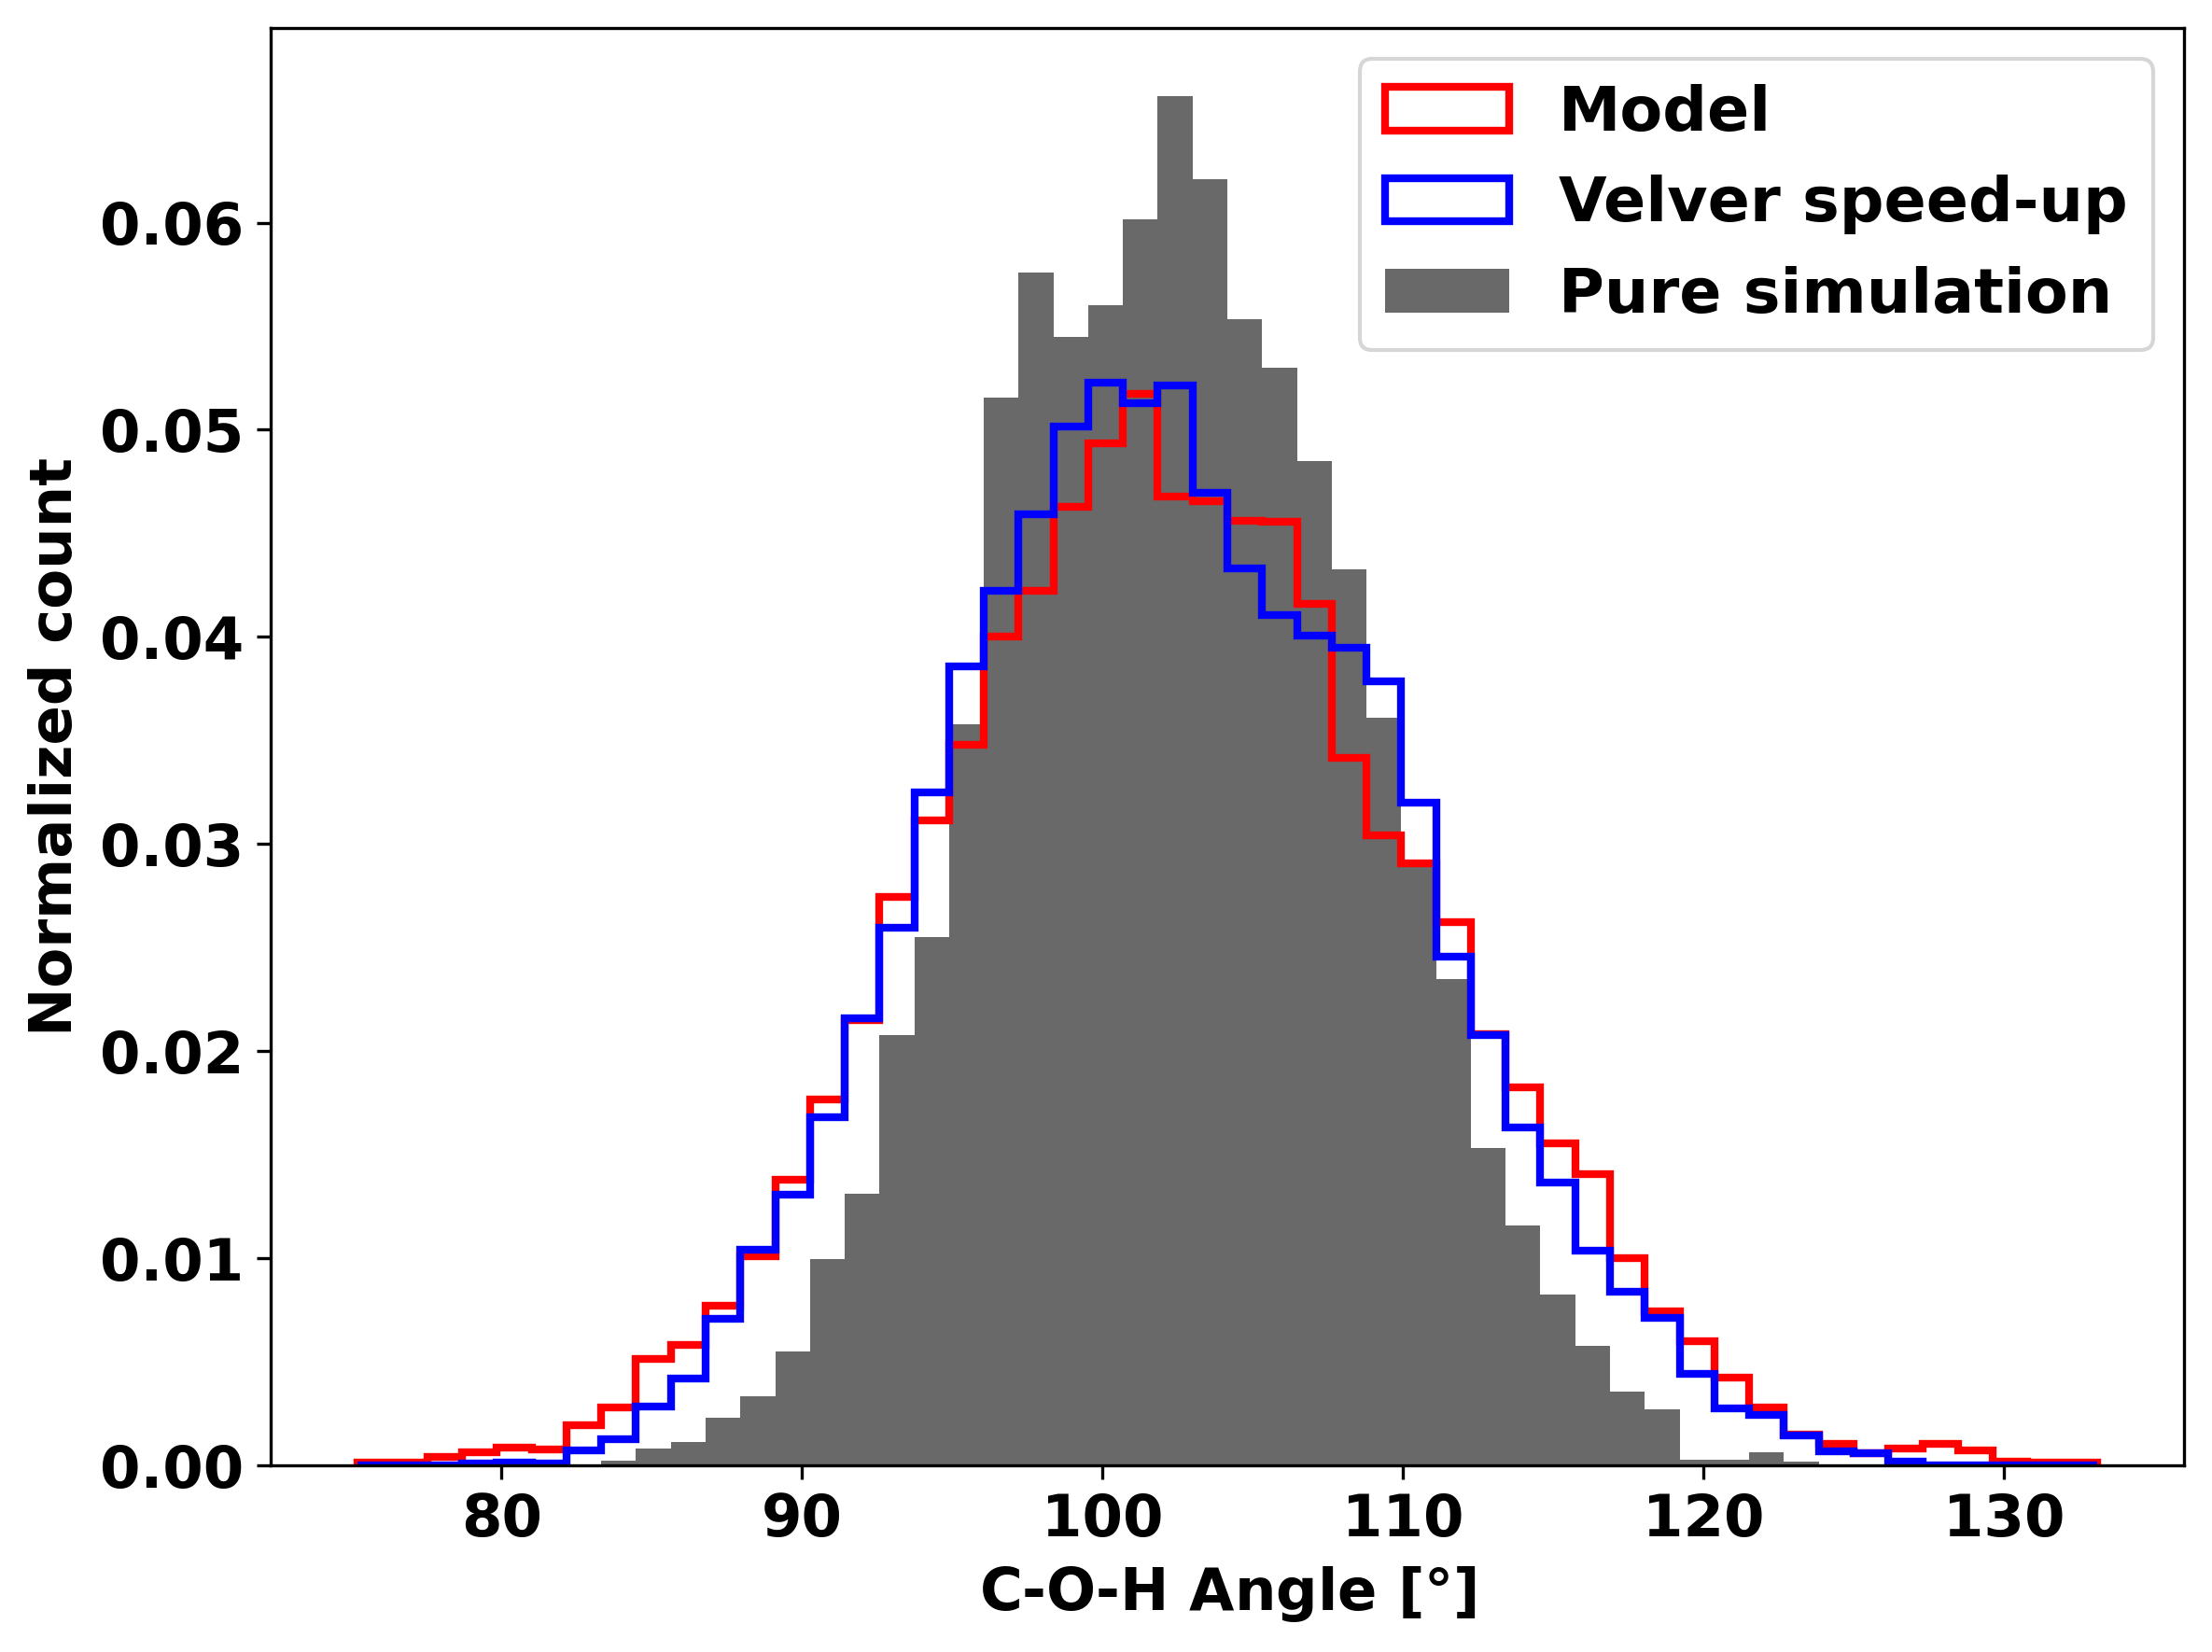

In [16]:
N_bins = 50
plot_index = -1
#x_range = (min(angles_ref[plot_index, :])-0.5, max(angles_ref[plot_index, :])+0.5)
x_range = (min(angles_data[1][plot_index, :])-0.5, max(angles_data[1][plot_index, :])+0.5)
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(angles_data[1][plot_index, :], bins=N_bins, range=x_range, density=True, label=f"Model", histtype="step", color="red", linewidth=2)
ax.hist(angles_data[4][plot_index, :], bins=N_bins, range=x_range, density=True, label=f"Velver speed-up", histtype="step", color="blue", linewidth=2)
#ax.hist(angles_data[-1][plot_index, :], bins=N_bins, range=x_range, density=True, label=f"sim 2", histtype="step", color="black", linewidth=2)
ax.hist(angles_ref[plot_index, :], bins=N_bins, range=x_range, density=True, label=f"Pure simulation", histtype="stepfilled", color="dimgray")
#ax.set_title(model_label, fontweight="bold", fontsize=18)
ax.set_xlabel("C-O-H Angle [$\degree$]")
ax.set_ylabel("Normalized count")
#ax.set_ylim(0, 0.12)
ax.legend(loc="upper right", fontsize=16)
ax.minorticks_off()



plt.tight_layout()
plt.show()

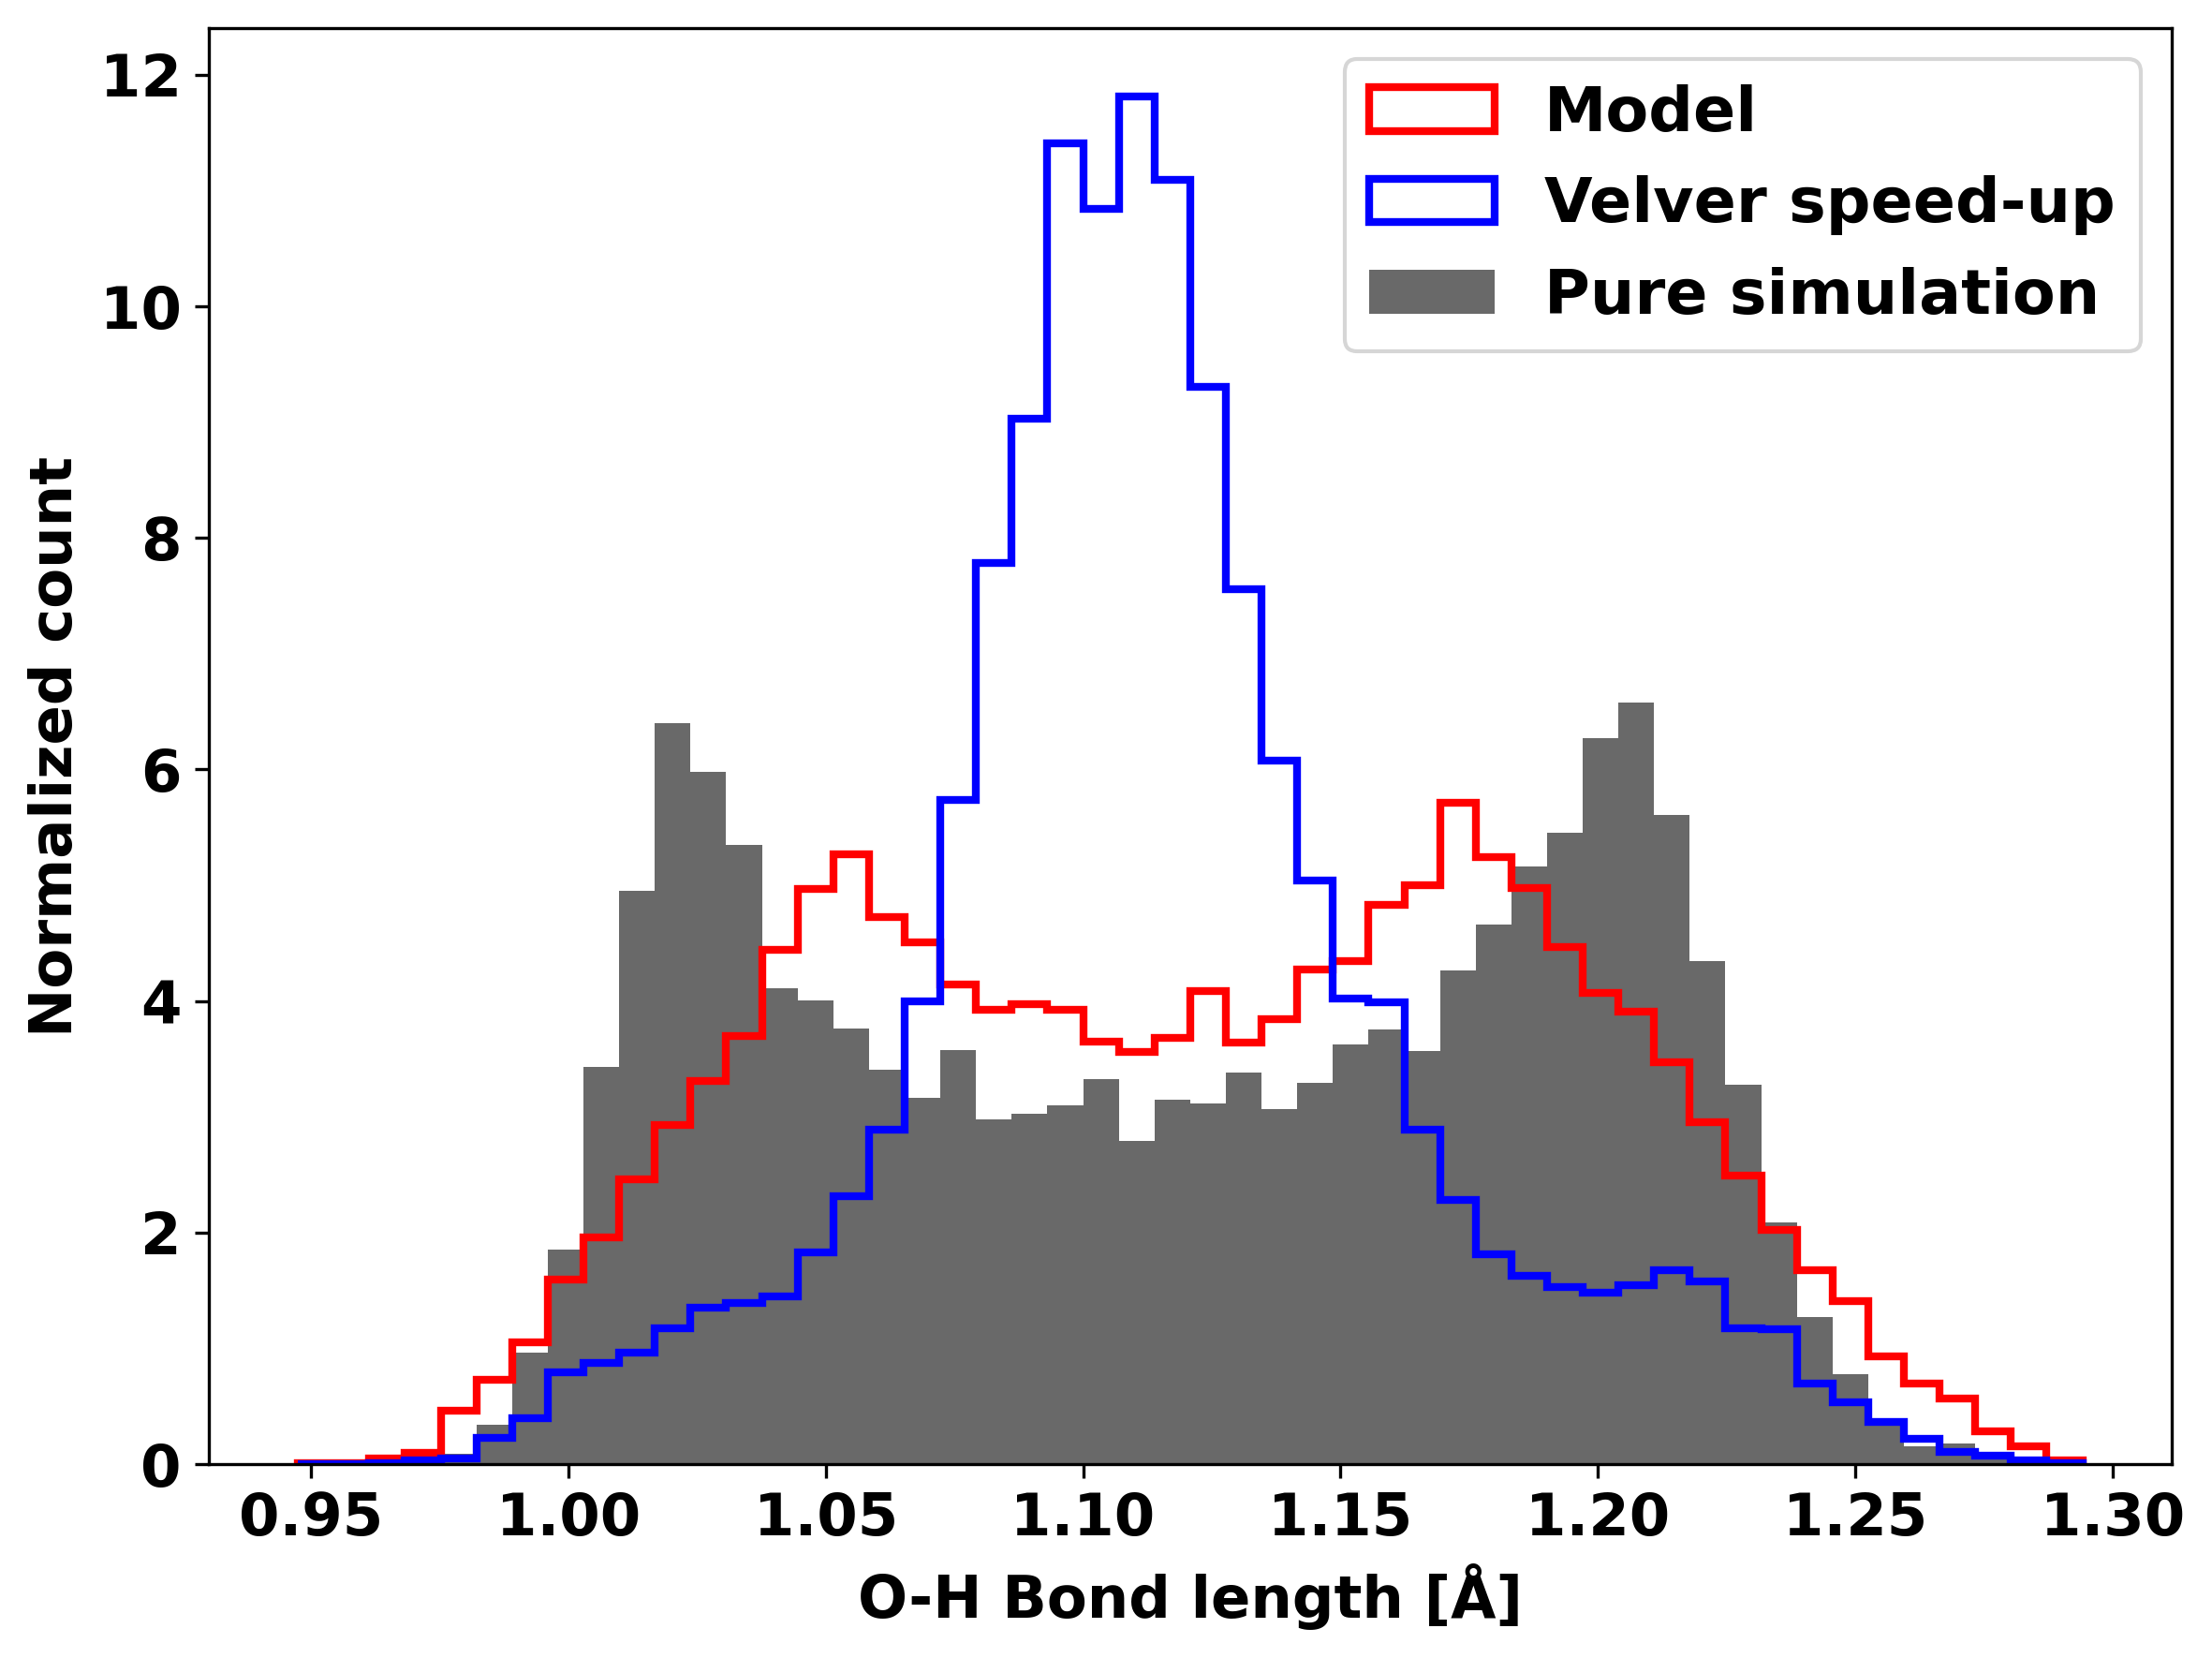

In [17]:
N_bins = 50
plot_index = -1
mol1 = 2
mol2 = 8
#x_range = (min(angles_ref[plot_index, :])-0.5, max(angles_ref[plot_index, :])+0.5)
x_range = (min(bonds_data[1][mol1, mol2, :])-0.005, max(bonds_data[1][mol1, mol2, :])+0.005)
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(bonds_data[1][mol1, mol2, :], bins=N_bins, range=x_range, density=True, label=f"Model", histtype="step", color="red", linewidth=2)
ax.hist(bonds_data[4][mol1, mol2, :], bins=N_bins, range=x_range, density=True, label=f"Velver speed-up", histtype="step", color="blue", linewidth=2)
#ax.hist(bonds_data[-1][mol1, mol2, :], bins=N_bins, range=x_range, density=True, label=f"sim 2", histtype="step", color="black", linewidth=2)
ax.hist(dist_ref[mol1, mol2, :], bins=N_bins, range=x_range, density=True, label=f"Pure simulation", histtype="stepfilled", color="dimgray")
#ax.set_title(model_label, fontweight="bold", fontsize=18)
ax.set_xlabel("O-H Bond length [Å]")
ax.set_ylabel("Normalized count")
#ax.set_ylim(0, 0.12)
ax.legend(loc="upper right", fontsize=16)
ax.minorticks_off()



plt.tight_layout()
plt.show()

### Q-Q/P-P plots

In [4]:
print(len(ref_data))
print(len(mol_12_2))
print(len(velver))
print(len(ref_2_data))

14756
21069
22526
14965


In [6]:
#https://stackoverflow.com/questions/55142882/python-multiple-qq-plot
import numbers
def qqplot(x, y, quantiles=None, interpolation='nearest', ax=None, **kwargs):
    """Draw a quantile-quantile plot for `x` versus `y`.

    Parameters
    ----------
    x, y : array-like
        One-dimensional numeric arrays.

    ax : matplotlib.axes.Axes, optional
        Axes on which to plot. If not provided, the current axes will be used.

    quantiles : int or array-like, optional
        Quantiles to include in the plot. This can be an array of quantiles, in
        which case only the specified quantiles of `x` and `y` will be plotted.
        If this is an int `n`, then the quantiles will be `n` evenly spaced
        points between 0 and 1. If this is None, then `min(len(x), len(y))`
        evenly spaced quantiles between 0 and 1 will be computed.

    interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
        Specify the interpolation method used to find quantiles when `quantiles`
        is an int or None. See the documentation for numpy.quantile().

    kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.scatter() when drawing
        the q-q plot.
    """
    # Get current axes if none are provided
    if ax is None:
        ax = plt.gca()

    if quantiles is None:
        quantiles = min(len(x), len(y))

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, method=interpolation)
    y_quantiles = np.quantile(y, quantiles, method=interpolation)

    
    # Draw the q-q plot
    ax.scatter(x_quantiles, y_quantiles, **kwargs)

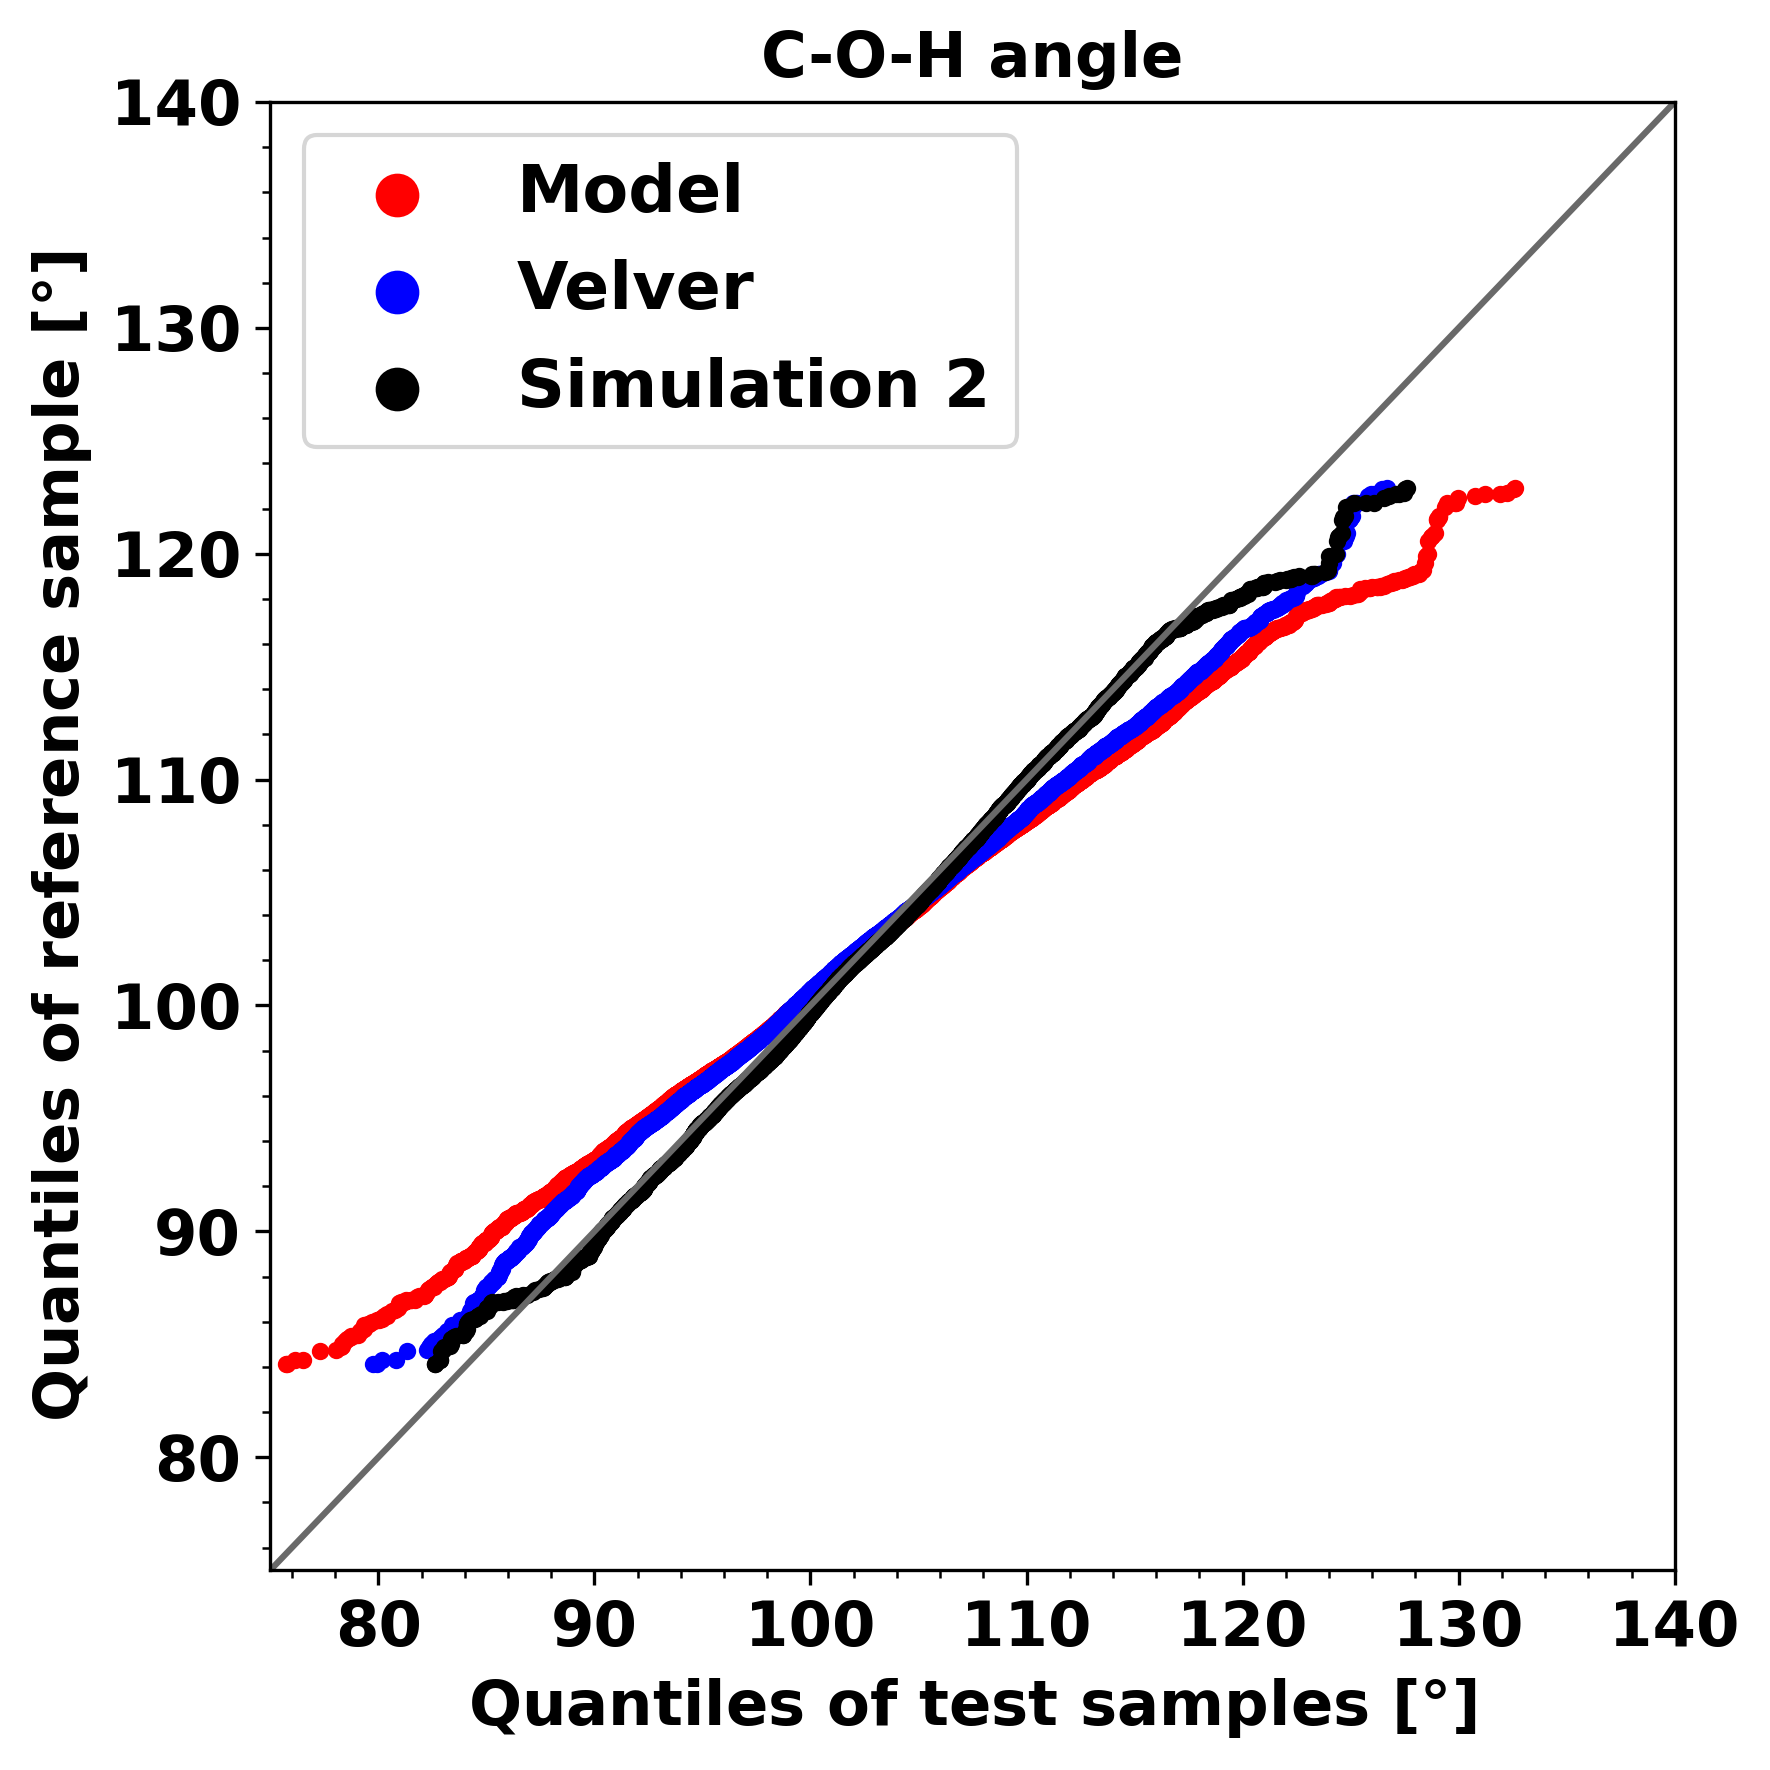

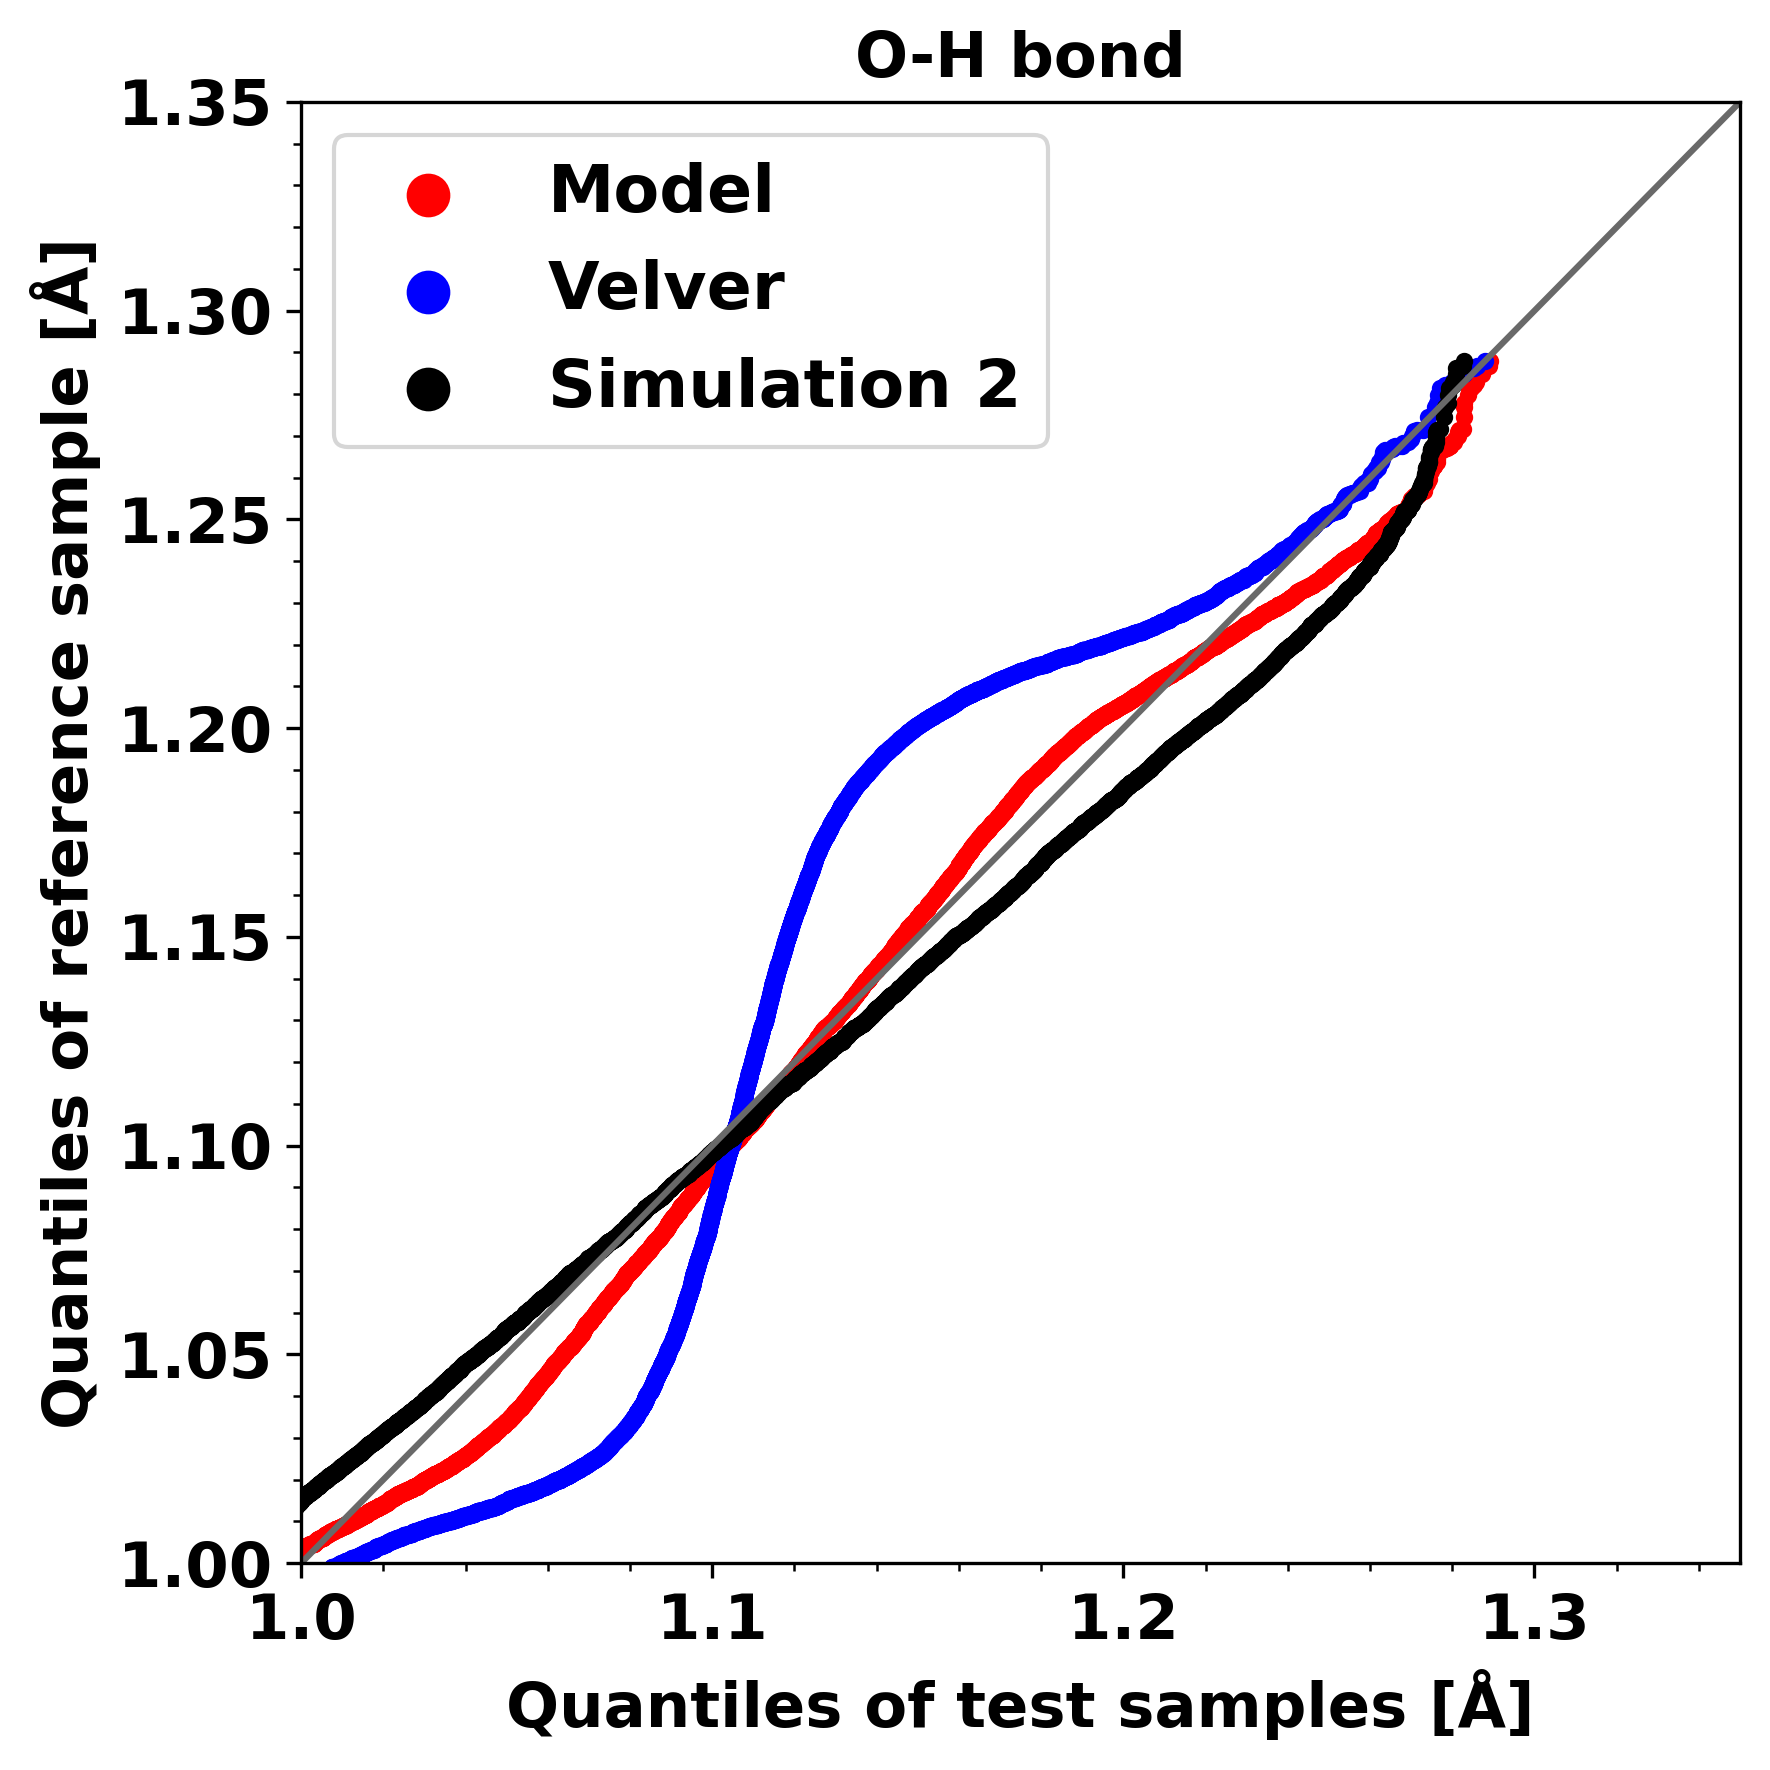

In [12]:
angle = -1
bond = -1
sims = [1, 4, -1]
labels = ["reg 12_2", "Model", "15_4", "reg 15_4", "Velver", "Simulation 2"]
color = ["darkblue", "red", "red", "darkred", "blue", "black"]
fig1, ax1 = plt.subplots(figsize=(6, 6))
fig2, ax2 = plt.subplots(figsize=(6, 6))
for i in sims:
    index = bonds[bond]
    qqplot(angles_data[i][angle,:], angles_ref[angle,:], color=color[i], ax=ax1, label=labels[i], s=10)
    qqplot(bonds_data[i][index[0],index[1], :],dist_ref[index[0],index[1], :], color=color[i], ax=ax2, label=labels[i], s=10)
ax1.plot([70, 140], [70, 140], c='dimgray')
ax1.set_xlim(75, 140)
ax1.set_ylim(75, 140)
ax1.set_xlabel("Quantiles of test samples [$\degree$]")
ax1.set_ylabel("Quantiles of reference sample [$\degree$]")
ax2.plot([0, 4], [0, 4], c='dimgray')
ax2.set_xlim(1, 1.35)
ax2.set_ylim(1, 1.35)
ax2.set_xlabel("Quantiles of test samples [Å]")
ax2.set_ylabel("Quantiles of reference sample [Å]")
ax1.set_title("C-O-H angle")
ax2.set_title("O-H bond")
lgnd_1 = ax1.legend(fontsize=16)
lgnd_2 = ax2.legend(fontsize=16)
lgnd_1.legend_handles[0]._sizes = [90]
lgnd_1.legend_handles[1]._sizes = [90]
lgnd_1.legend_handles[2]._sizes = [90]
lgnd_2.legend_handles[0]._sizes = [90]
lgnd_2.legend_handles[1]._sizes = [90]
lgnd_2.legend_handles[2]._sizes = [90]
fig1.tight_layout()
fig2.tight_layout()
plt.show()

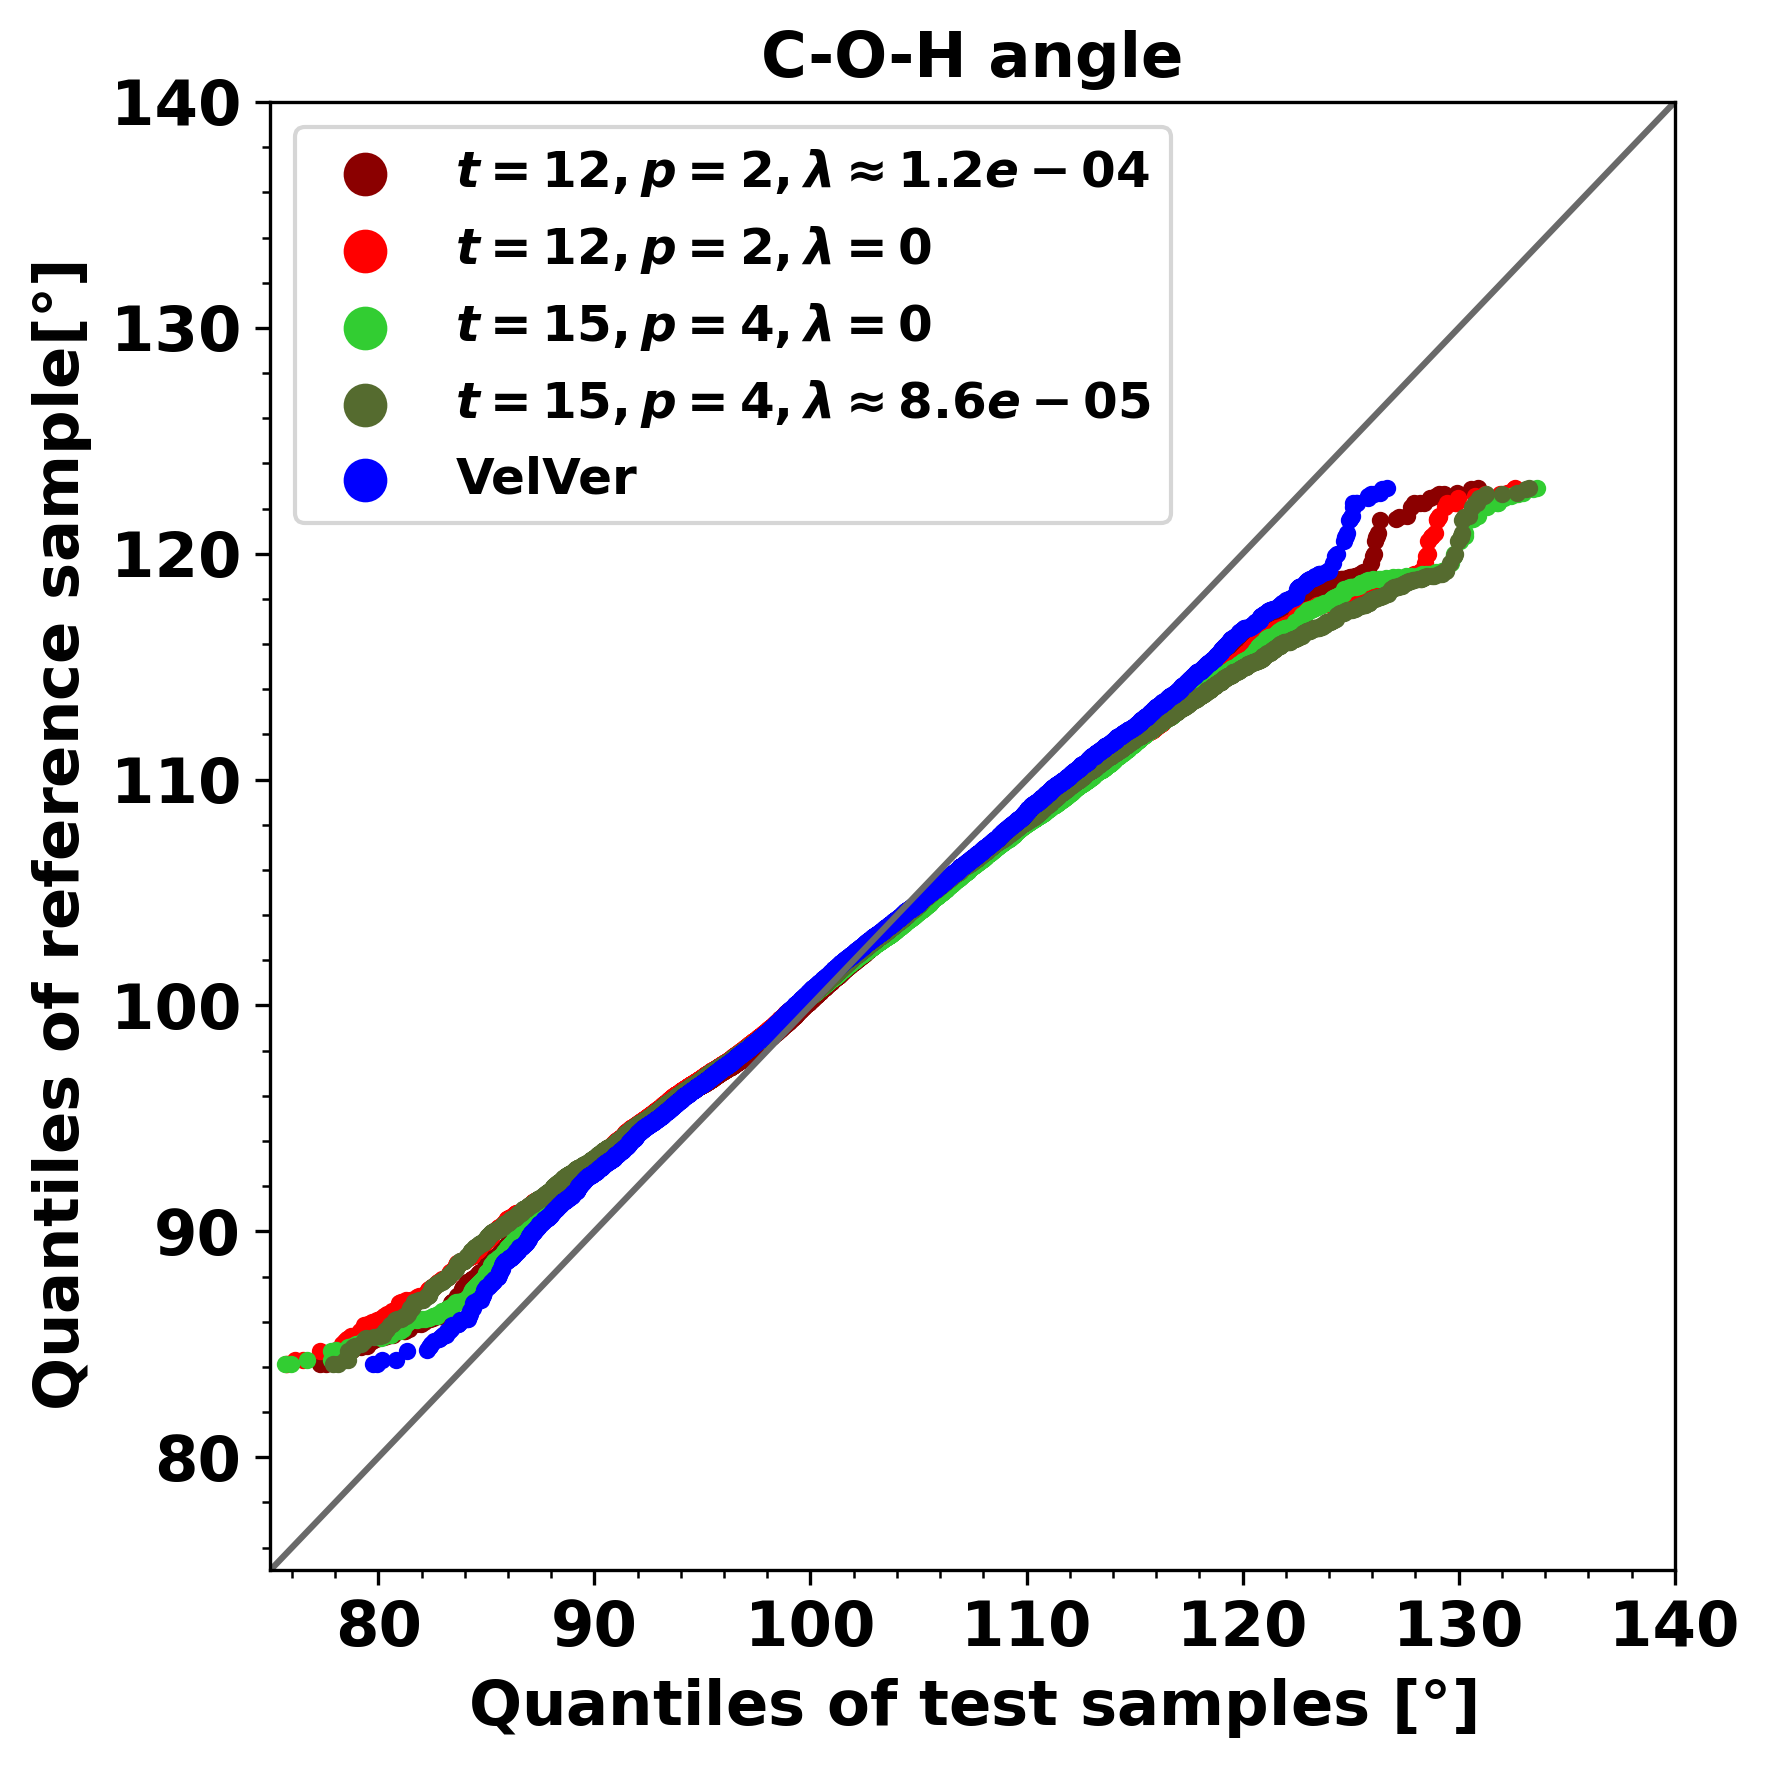

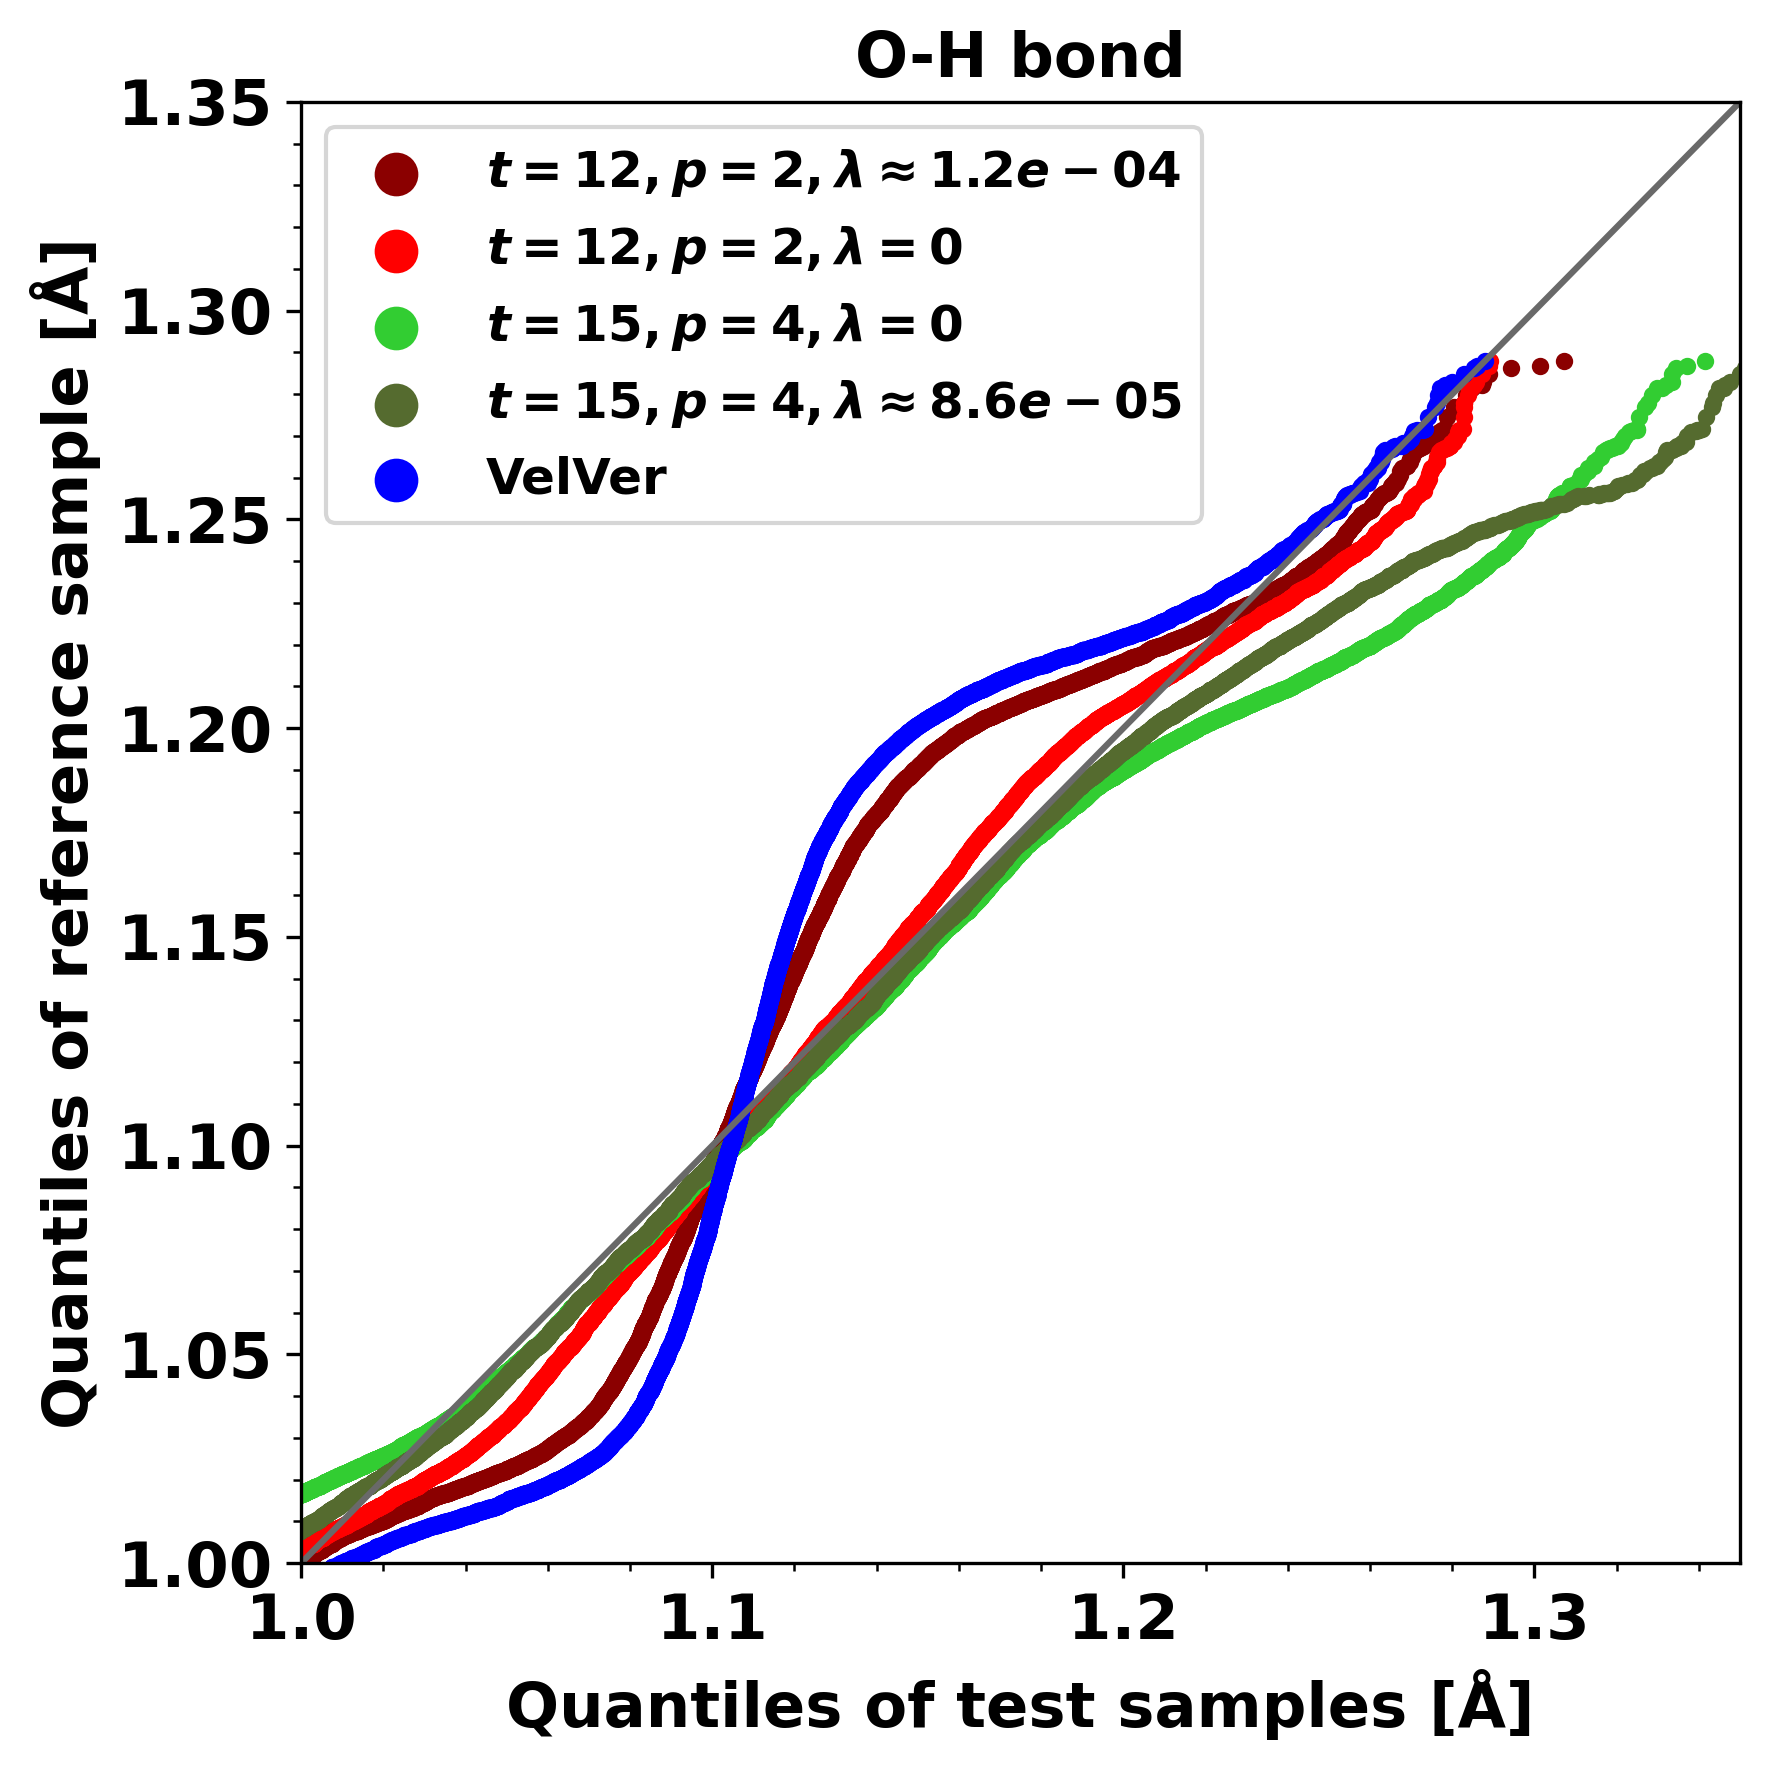

In [15]:
angle = -1
bond = -1
labels = [r"$t=12, p=2, \lambda\approx 1.2e-04$", "$t=12, p=2, \lambda=0$", "$t=15, p=4, \lambda=0$", r"$t=15, p=4, \lambda\approx 8.6e-05$", "VelVer"]
color = ["darkred", "red", "limegreen", "darkolivegreen", "blue"]
fig1, ax1 = plt.subplots(figsize=(6, 6))
fig2, ax2 = plt.subplots(figsize=(6, 6))
for i in range(len(labels)):
    index = bonds[bond]
    qqplot(angles_data[i][angle,:], angles_ref[angle,:], color=color[i], ax=ax1, label=labels[i], s=10)
    qqplot(bonds_data[i][index[0],index[1], :],dist_ref[index[0],index[1], :], color=color[i], ax=ax2, label=labels[i], s=10)
ax1.plot([70, 140], [70, 140], c='dimgray')
ax1.set_xlim(75, 140)
ax1.set_ylim(75, 140)
ax1.set_xlabel("Quantiles of test samples [$\degree$]")
ax1.set_ylabel("Quantiles of reference sample[$\degree$]")
ax2.plot([0, 4], [0, 4], c='dimgray')
ax2.set_xlim(1, 1.35)
ax2.set_ylim(1, 1.35)
ax2.set_xlabel("Quantiles of test samples [Å]")
ax2.set_ylabel("Quantiles of reference sample [Å]")
ax1.set_title("C-O-H angle")
ax2.set_title("O-H bond")
lgnd_1 = ax1.legend(fontsize=12)
lgnd_2 = ax2.legend(fontsize=12)
lgnd_1.legend_handles[0]._sizes = [90]
lgnd_1.legend_handles[1]._sizes = [90]
lgnd_1.legend_handles[2]._sizes = [90]
lgnd_1.legend_handles[3]._sizes = [90]
lgnd_1.legend_handles[4]._sizes = [90]
lgnd_2.legend_handles[0]._sizes = [90]
lgnd_2.legend_handles[1]._sizes = [90]
lgnd_2.legend_handles[2]._sizes = [90]
lgnd_2.legend_handles[3]._sizes = [90]
lgnd_2.legend_handles[4]._sizes = [90]
fig1.tight_layout()
fig2.tight_layout()
plt.show()

## Average values

In [4]:
df_angles = pd.DataFrame(columns=['file', '5, 0, 1', 'std 5, 0, 1', "4, 0, 1", "std 4, 0, 1", "3, 0, 1", "std 3, 0, 1", "5, 0, 3", "std 5, 0, 3", "4, 0, 3", "std 4, 0, 3", "4, 0, 5", "std 4, 0, 5", "0, 1, 2", "std 0, 1, 2", "0, 1, 6", "std 0, 1, 6", "0, 1, 7", "std 0, 1, 7", "6, 1, 7", "std 6, 1, 7", "6, 1, 2", "std 6, 1, 2", "7, 1, 2", "std 7, 1, 2", "1, 2, 8", "std 1, 2, 8"])
df_bonds = pd.DataFrame(columns=["file", "0, 1", "std 0, 1", "0, 4", "std 0, 4", "0, 5", "std 0, 5", "0, 3", "std 0, 3", "1, 2", "std 1, 2", "1, 6", "std 1, 6", "1, 7", "std 1, 7", "2, 8", "std 2, 8"])
bonds = [[0, 1], [0, 4], [0, 5], [0, 3], [1, 2], [1, 6], [1, 7], [2, 8]]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith("xyz"):
        print(filename)
        model_data = read(directory+filename, index=":")
        dist_model = get_distances(model_data)
        angles_model = get_all_angles(model_data, angles_indices)
        row_angles = [filename]
        row_bonds = [filename]
        for index in bonds:
            row_bonds.append(np.mean(dist_model[index[0],index[1],:]))
            row_bonds.append(np.std(dist_model[index[0],index[1],:], ddof=1)/np.sqrt(len(dist_model[index[0],index[1],:])))
        for i in range(len(angles_indices)):
            row_angles.append(np.mean(angles_model[i, :]))
            row_angles.append(np.std(angles_model[i, :], ddof=1)/np.sqrt(len(angles_model[i, :])))

        df_bonds.loc[len(df_bonds)] = row_bonds
        df_angles.loc[len(df_angles)] = row_angles
        
df_angles.to_csv(directory+"Angles_seeds.csv")        
df_bonds.to_csv(directory+"Bonds_seeds.csv")

EtOH_moldyn_data_500.xyz
EtOH_moldyn_data_700.xyz
Speed_up_ethanol12_2_700.xyz
SVD_not_regularized12_2_500.xyz
SVD_not_regularized15_4_500.xyz
SVD_not_regularized15_4_700.xyz
SVD_regularized12_2_500.xyz
SVD_regularized12_2_500_v2.xyz
SVD_regularized12_2_700.xyz
SVD_regularized12_2_700_v2.xyz
SVD_regularized15_4_500.xyz
SVD_regularized15_4_700.xyz
Velverlet_12_500.xyz
Velverlet_12_700.xyz


# Frequency

In [17]:
ref_data = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
mol_12_2 = read(directory+"SVD_not_regularized12_2_500.xyz", index=":")
velver = read(directory+"Velverlet_12_500.xyz", index=":")
mol_r_12_2 = read(directory+"SVD_regularized12_2_500_v2.xyz", index=":")
mol_15_4 = read(directory+"SVD_not_regularized15_4_500.xyz", index=":")
mol_r_15_4 = read(directory+"SVD_regularized15_4_500.xyz", index=":")
ref_2_data = read(directory+"EtOH_moldyn_data_700.xyz", index=":")

In [18]:
ref_angles, ref_dist = get_all_angles(ref_data, angles_indices), get_distances(ref_data)
ref_2_angles, ref_2_dist = get_all_angles(ref_2_data, angles_indices), get_distances(ref_2_data)
mol_angles, mol_dist = get_all_angles(mol_12_2, angles_indices), get_distances(mol_12_2)
velver_angles, velver_dist = get_all_angles(velver, angles_indices), get_distances(velver)

# Try fourier transform of bond length/angles and changes in bond length/angle

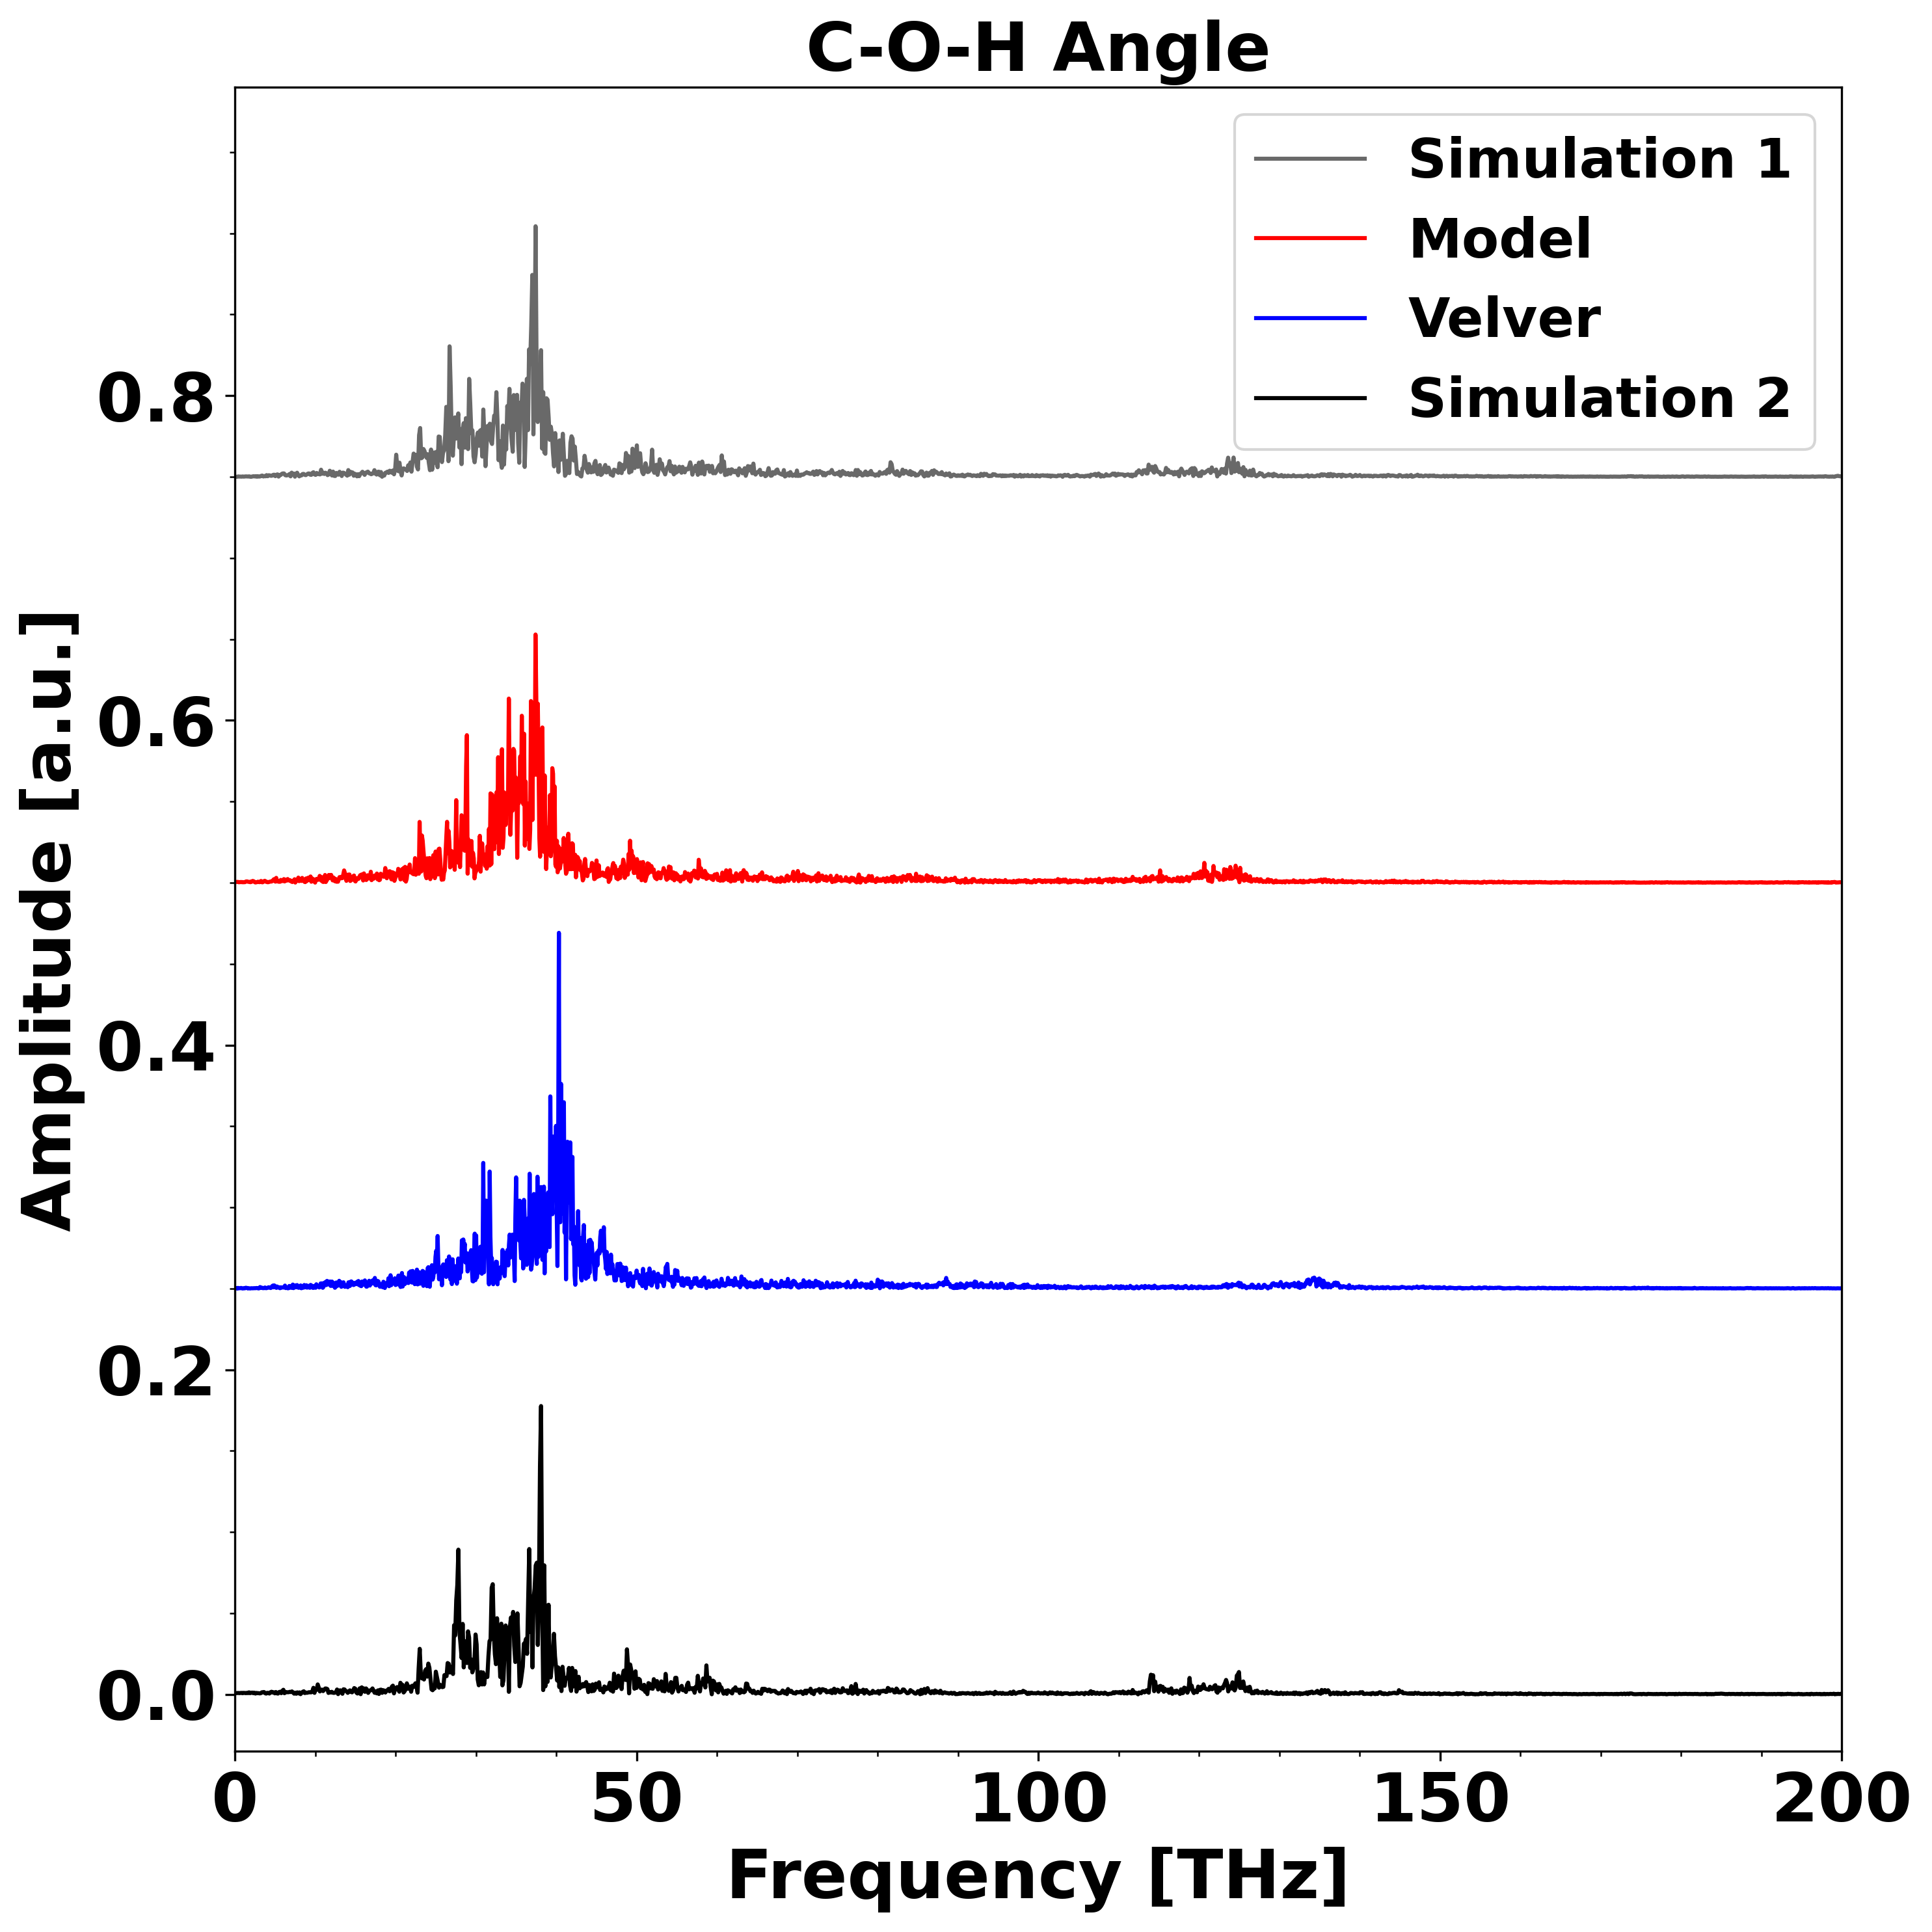

In [37]:
angle = -1
N_ref = len(ref_angles[0,:])-1
N_ref_2 = len(ref_2_angles[0,:])-1
N_mol = len(mol_angles[0,:])-1
N_vel = len(velver_angles[0,:])-1
ref_x = fftfreq(N_ref, 0.5)
ref_2_x = fftfreq(N_ref_2, 0.5)
mol_x = fftfreq(N_mol, 0.5)
vel_x = fftfreq(N_vel, 0.5)
ref_fft = fft(ref_angles[angle,1:]-ref_angles[angle,:-1]) 
ref_2_fft = fft(ref_2_angles[angle,1:]-ref_2_angles[angle,:-1]) 
mol_fft = fft(mol_angles[angle,1:]-mol_angles[angle,:-1])
vel_fft = fft(velver_angles[angle,1:]-velver_angles[angle,:-1])
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ref_x[:N_ref//2]*1000, 0.75+1/N_ref*np.abs(ref_fft)[:N_ref//2], label="Simulation 1", color="dimgray")
ax.plot(mol_x[:N_mol//2]*1000, 0.5+1/N_mol*np.abs(mol_fft)[:N_mol//2], label="Model", color="red")
ax.plot(vel_x[:N_vel//2]*1000, 0.25+1/N_vel*np.abs(vel_fft)[:N_vel//2], label="Velver", color="blue")
ax.plot(ref_2_x[:N_ref_2//2]*1000, 0+1/N_ref_2*np.abs(ref_2_fft)[:N_ref_2//2], label="Simulation 2", color="black")
ax.set_xlim(0,200)
#ax.set_ylim(-0.01, 1)
fontsize = 25
plt.tick_params(labelsize=fontsize)
ax.set_ylabel("Amplitude [a.u.]", fontsize=fontsize)
ax.set_xlabel("Frequency [THz]", fontsize=fontsize)
ax.legend(loc="upper right", fontsize=fontsize-5)
ax.set_title("C-O-H Angle", fontsize=fontsize)
ax.set_ylim(-0.035, 0.99)
plt.tight_layout()
plt.show()

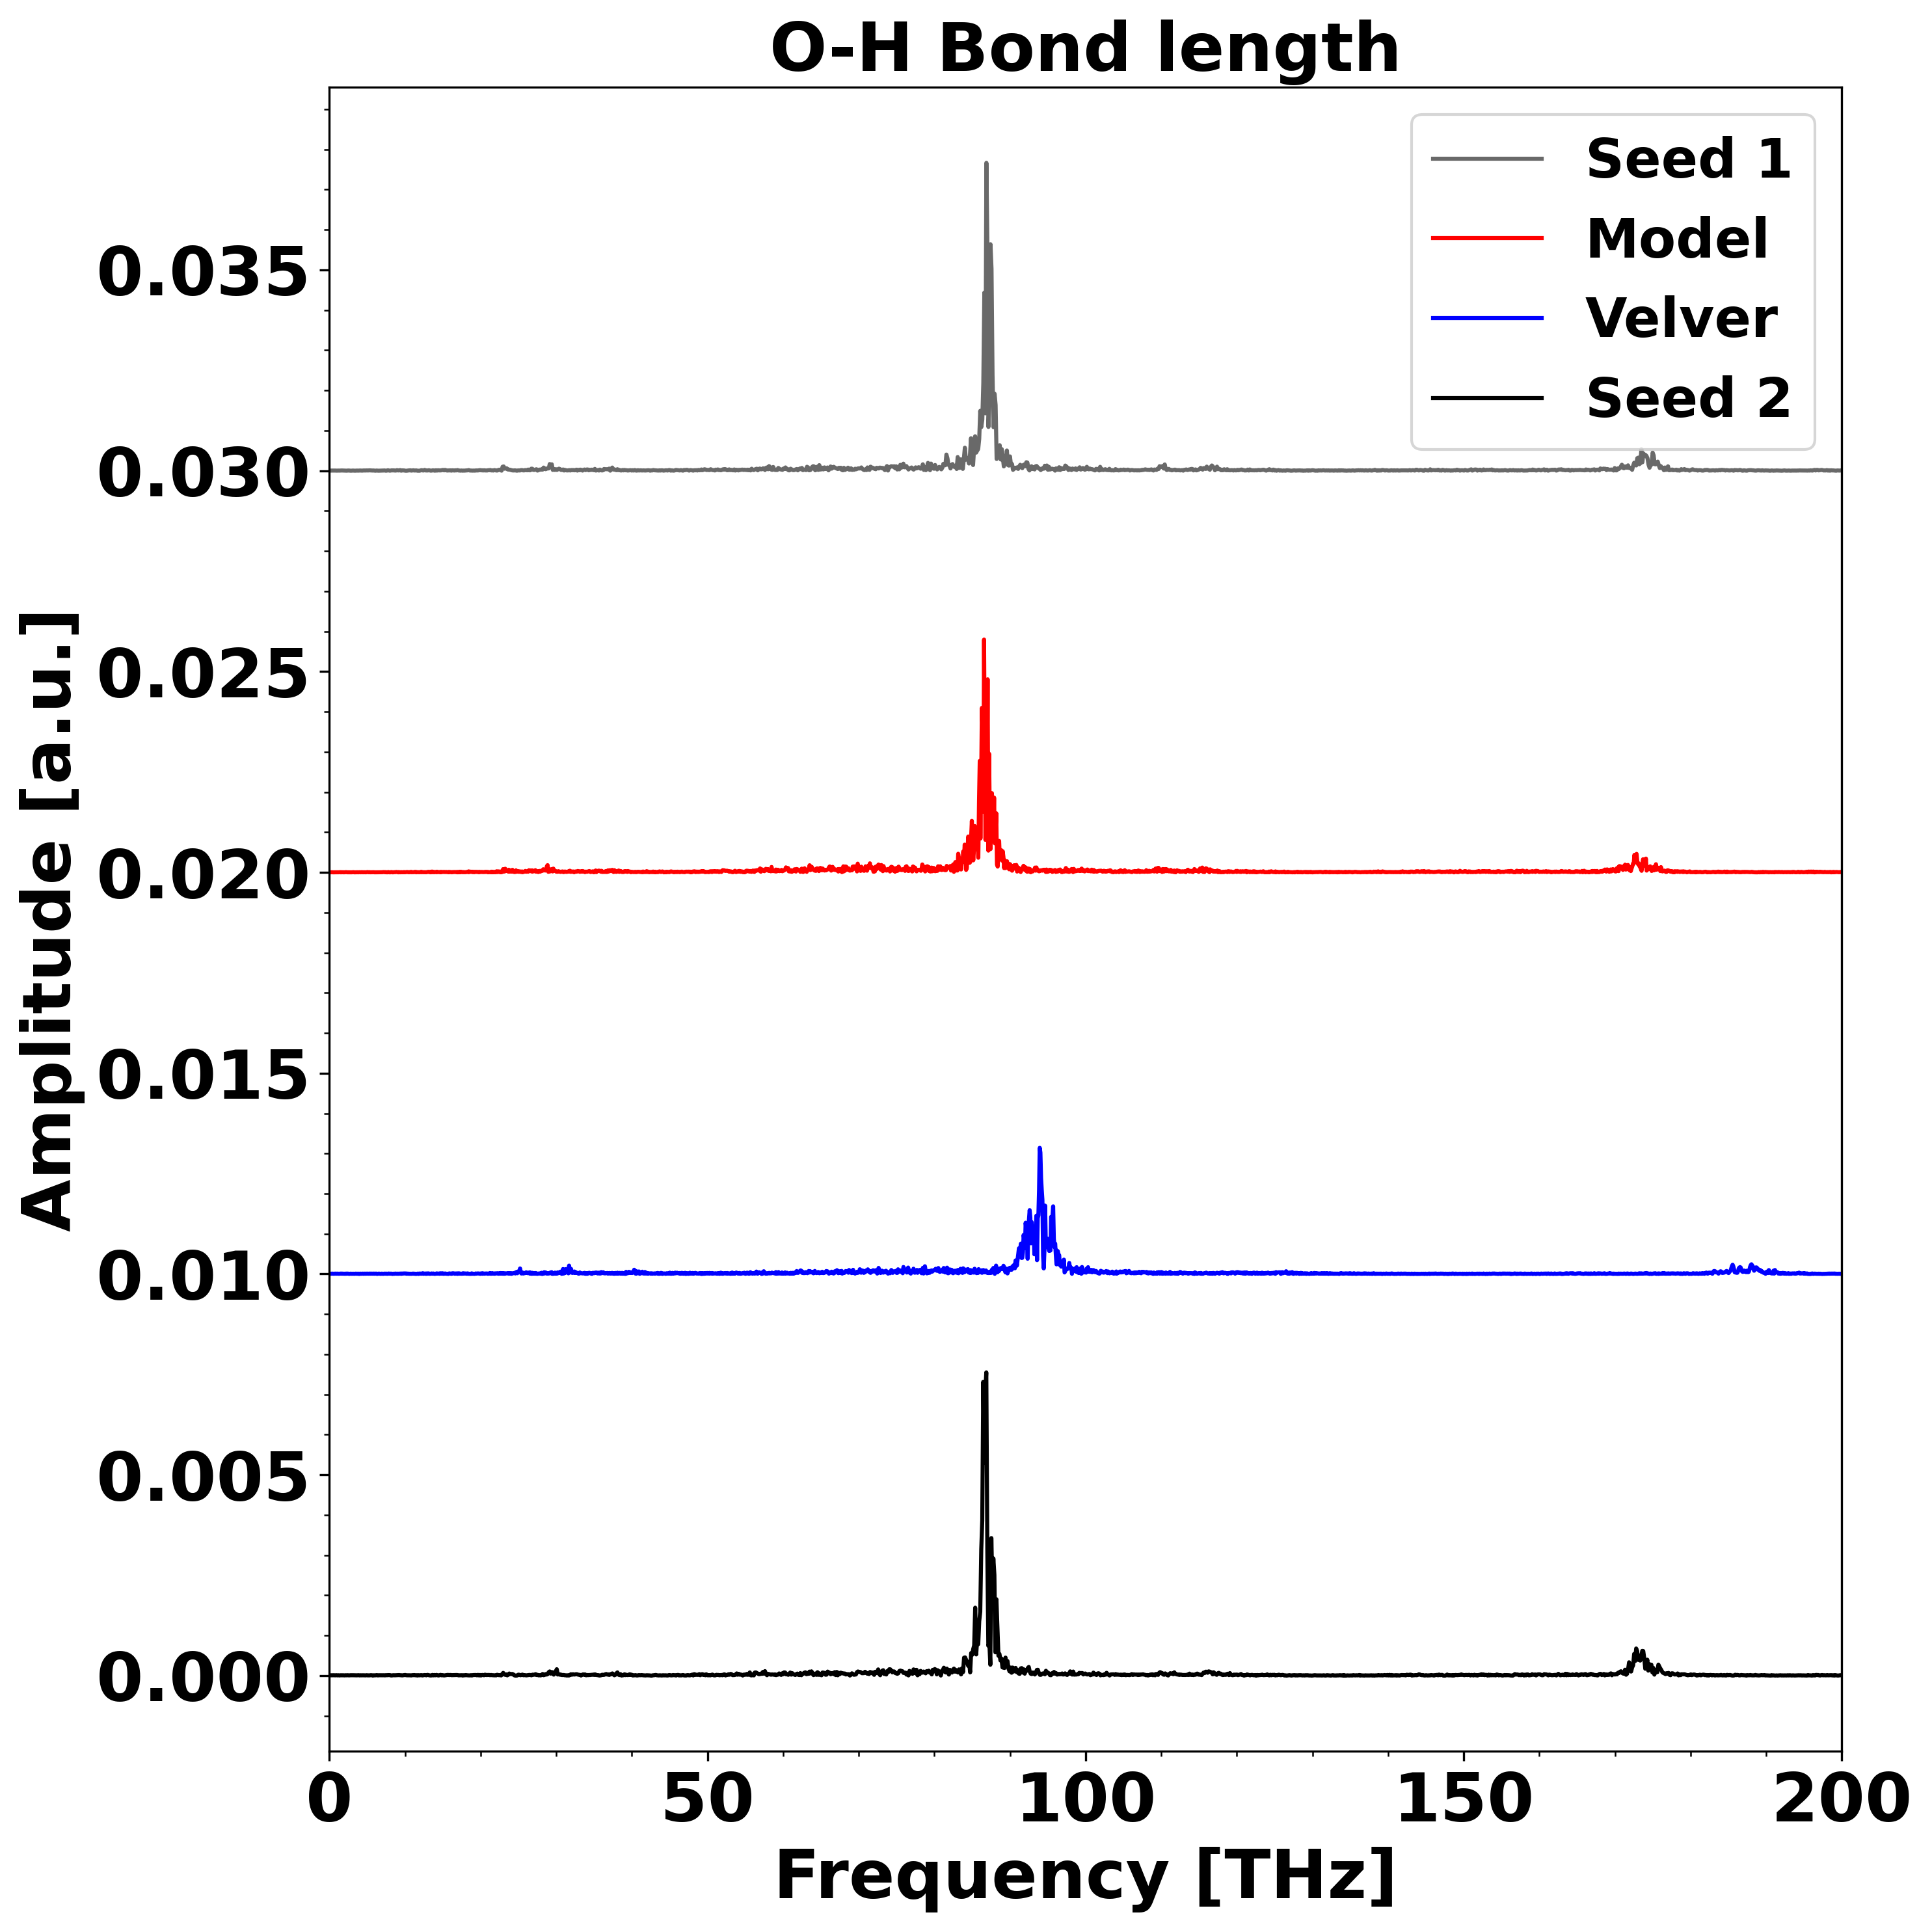

In [30]:
bond = -1
bond_index = bonds[bond]
N_ref = len(ref_dist[bond_index[0], bond_index[1], :])-1
N_ref_2 = len(ref_2_dist[bond_index[0], bond_index[1], :])-1
N_mol = len(mol_dist[bond_index[0], bond_index[1], :])-1
N_vel = len(velver_dist[bond_index[0], bond_index[1], :])-1
ref_x = fftfreq(N_ref, 0.5)
ref_2_x = fftfreq(N_ref_2, 0.5)
mol_x = fftfreq(N_mol, 0.5)
vel_x = fftfreq(N_vel, 0.5)
ref_fft = fft(ref_dist[bond_index[0], bond_index[1], 1:]-ref_dist[bond_index[0], bond_index[1], :-1]) 
ref_2_fft = fft(ref_2_dist[bond_index[0], bond_index[1], 1:]-ref_2_dist[bond_index[0], bond_index[1], :-1]) 
mol_fft = fft(mol_dist[bond_index[0], bond_index[1], 1:]-mol_dist[bond_index[0], bond_index[1], :-1])
vel_fft = fft(velver_dist[bond_index[0], bond_index[1], 1:]-velver_dist[bond_index[0], bond_index[1], :-1])
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ref_x[:N_ref//2]*1000, 0.03+1/N_ref*np.abs(ref_fft)[:N_ref//2], label="Seed 1", color="dimgray")
ax.plot(mol_x[:N_mol//2]*1000, 0.02+1/N_mol*np.abs(mol_fft)[:N_mol//2], label="Model", color="Red")
ax.plot(vel_x[:N_vel//2]*1000, 0.01+1/N_vel*np.abs(vel_fft)[:N_vel//2], label="Velver", color="blue")
ax.plot(ref_2_x[:N_ref_2//2]*1000, 0+1/N_ref_2*np.abs(ref_2_fft)[:N_ref_2//2], label="Seed 2", color="black")
ax.set_xlim(0,200)
#ax.set_ylim(-0.001, 0.05)
fontsize = 25
plt.tick_params(labelsize=fontsize)
ax.set_ylabel("Amplitude [a.u.]", fontsize=fontsize)
ax.set_xlabel("Frequency [THz]", fontsize=fontsize)
ax.legend(loc="upper right", fontsize=fontsize-5)
ax.set_title("O-H Bond length", fontsize=fontsize)
plt.tight_layout()
plt.show()

# RMSD

In [2]:
def get_RMSD(mol):
    rmsd = []
    N = mol[0].get_global_number_of_atoms()
    for i in range(len(mol)):
        diff = mol[0].get_positions()-mol[i].get_positions()
        dist_sum = np.sum(diff[:,0]**2+diff[:,1]**2+diff[:,2]**2)
        rmsd.append(np.sqrt(dist_sum/N))
    return np.asanyarray(rmsd)

In [3]:
rmsd_1 = get_RMSD(read(directory+"EtOH_moldyn_data_500.xyz", index=":2500"))
rmsd_2 = get_RMSD(read(directory+"EtOH_moldyn_data_700.xyz", index=":2500"))
rmsd_3 = get_RMSD(read(directory+"SVD_not_regularized12_2_500.xyz", index=":2500"))
rmsd_4 = get_RMSD(read(directory+"Velverlet_12_500.xyz", index=":2500"))
rmsd_5 = get_RMSD(read(directory+"SVD_regularized12_2_500_v2.xyz", index=":2500"))
rmsd_6 = get_RMSD(read(directory+"SVD_not_regularized15_4_500.xyz", index=":2500"))
rmsd_7 = get_RMSD(read(directory+"SVD_regularized15_4_500.xyz", index=":2500"))

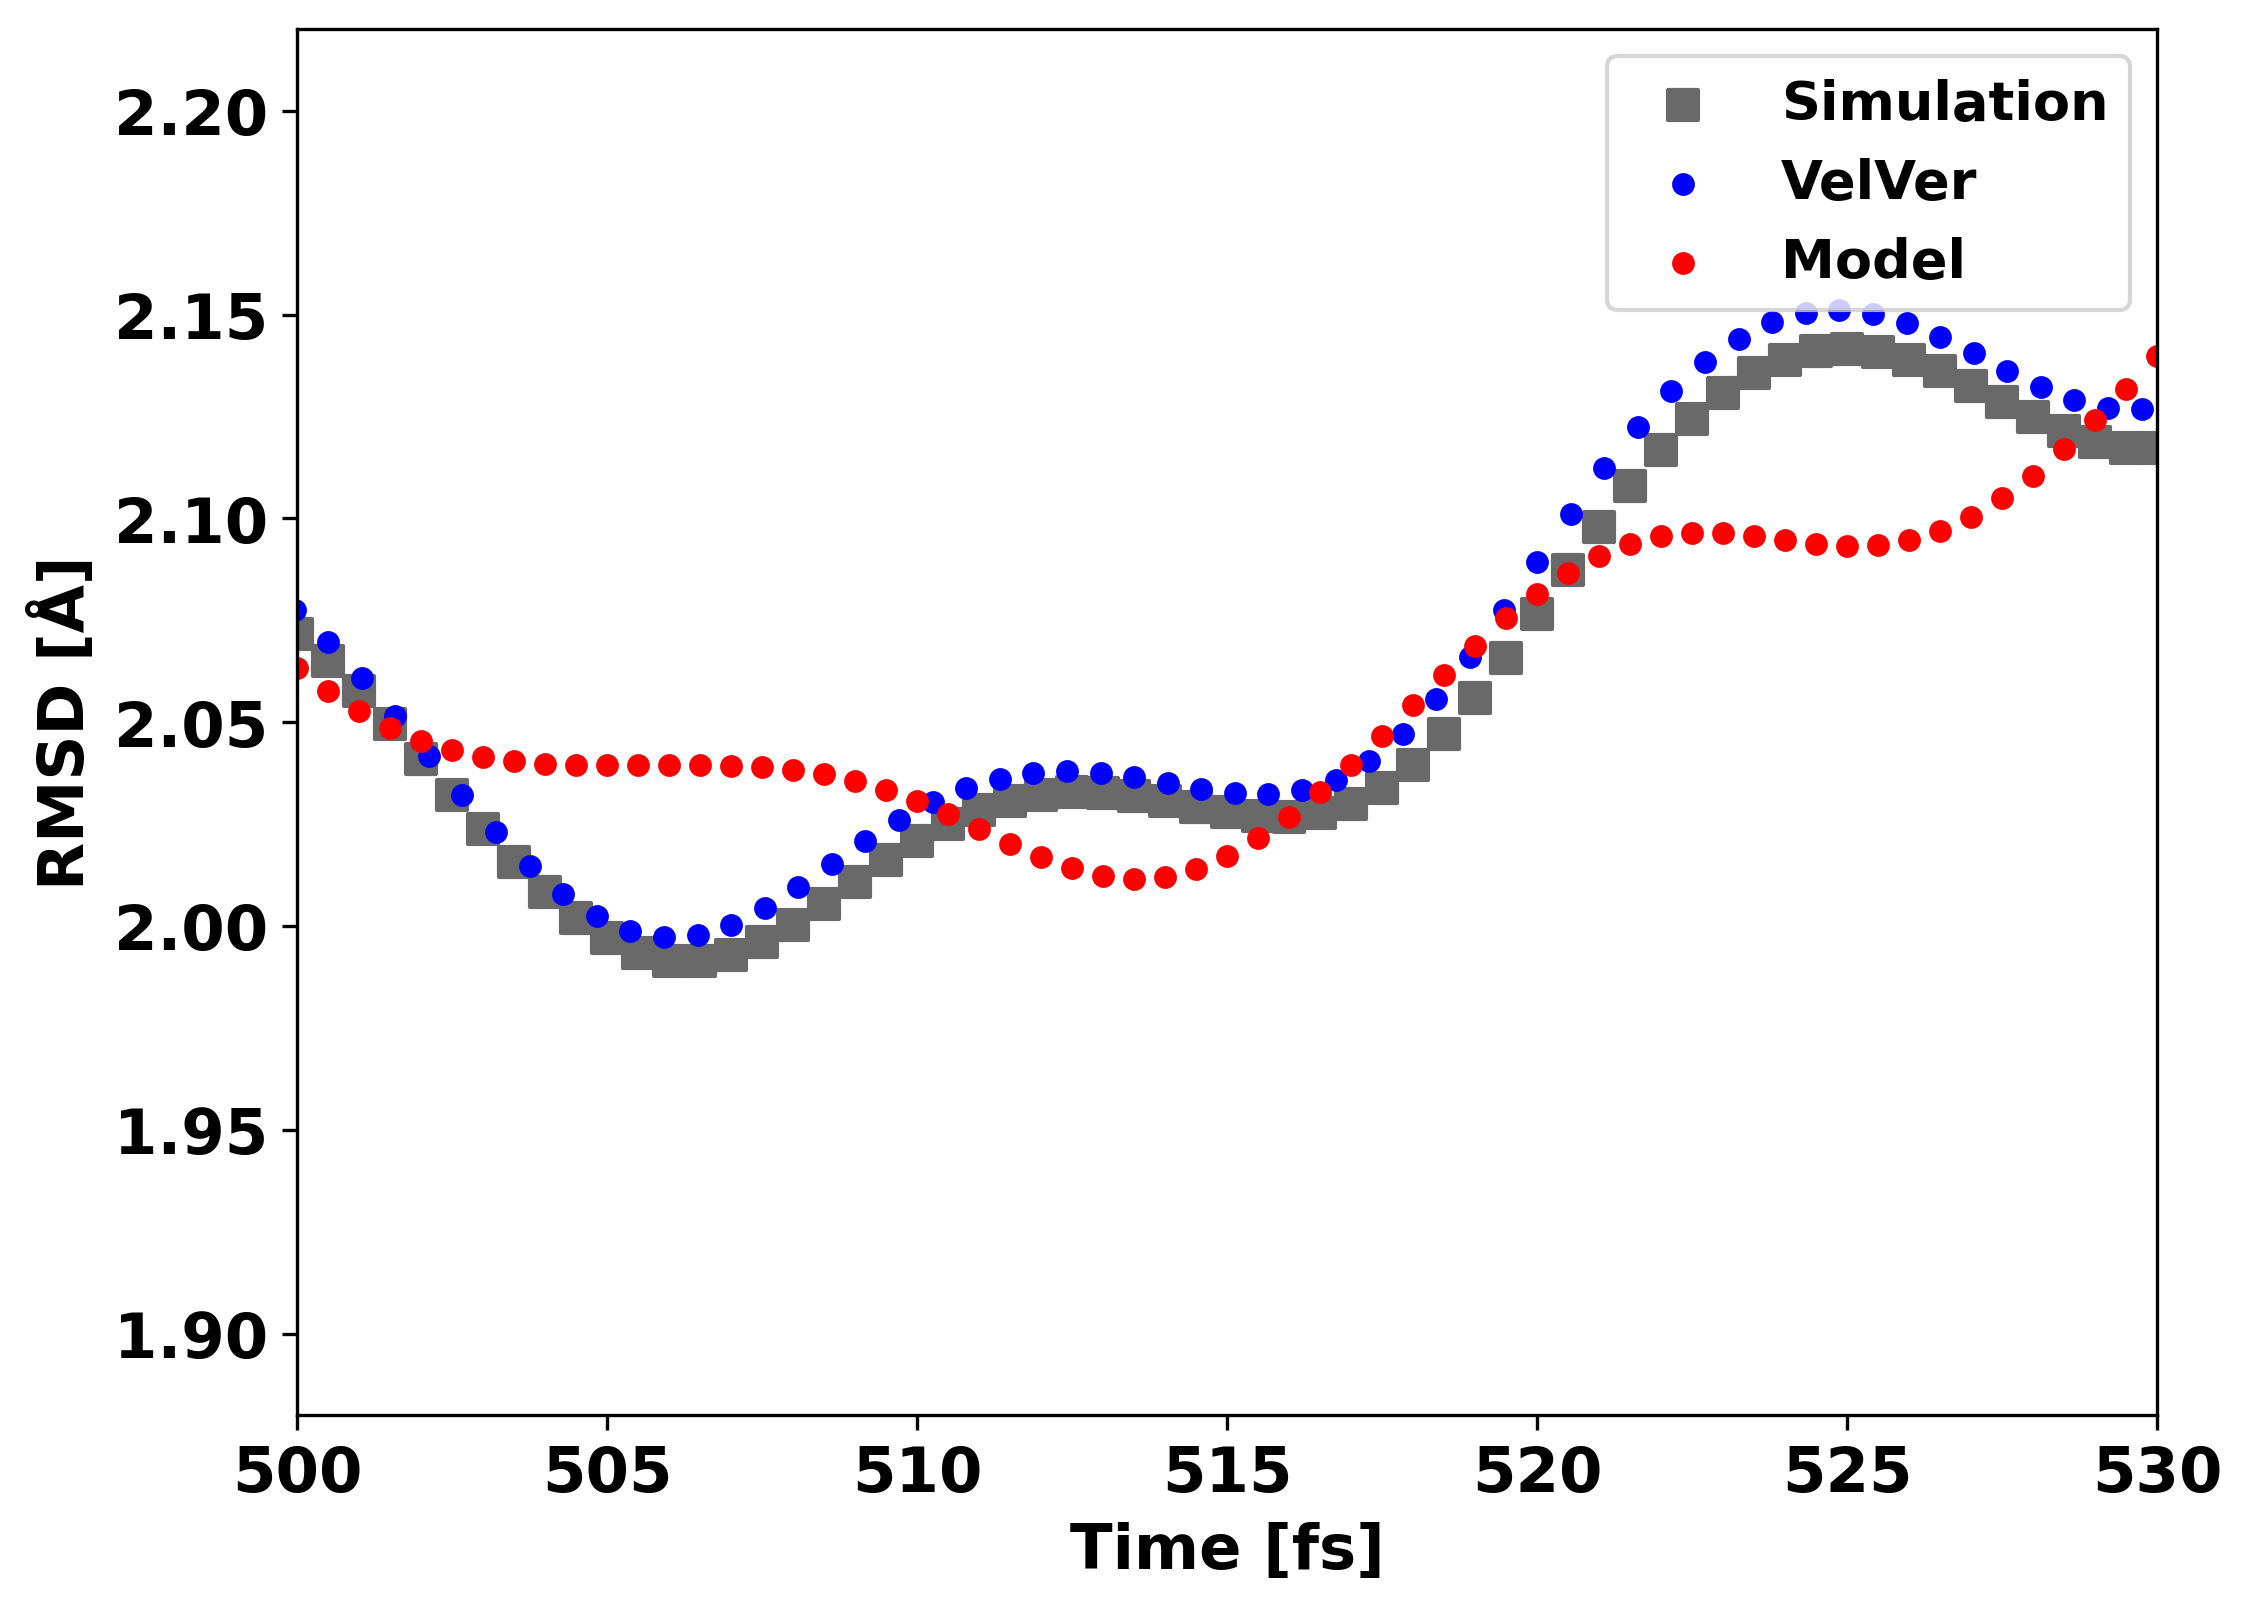

In [13]:
labels = ["Simulation","VelVer", "Model"]
rmsd = [rmsd_1, rmsd_4, rmsd_3]
colors = ["dimgray", "blue", "red"]
marker=["s", ".", "."]
dt = [0.5, 0.541667, 0.5]
s = [55, 80, 80]
fig, ax = plt.subplots(1, figsize=(8, 6))
for i in range(len(rmsd)):
    ax.scatter(np.arange(len(rmsd[i]))*dt[i], rmsd[i], label=labels[i], color=colors[i], marker=marker[i], s=s[i])


ax.set_xlabel("Time [fs]", fontweight="bold")
ax.set_ylabel("RMSD [Å]", fontweight="bold")
ax.set_ylim(1.88, 2.22)
ax.set_xlim(500, 530)
plt.legend(fontsize=13)
ax.minorticks_off()
plt.show()

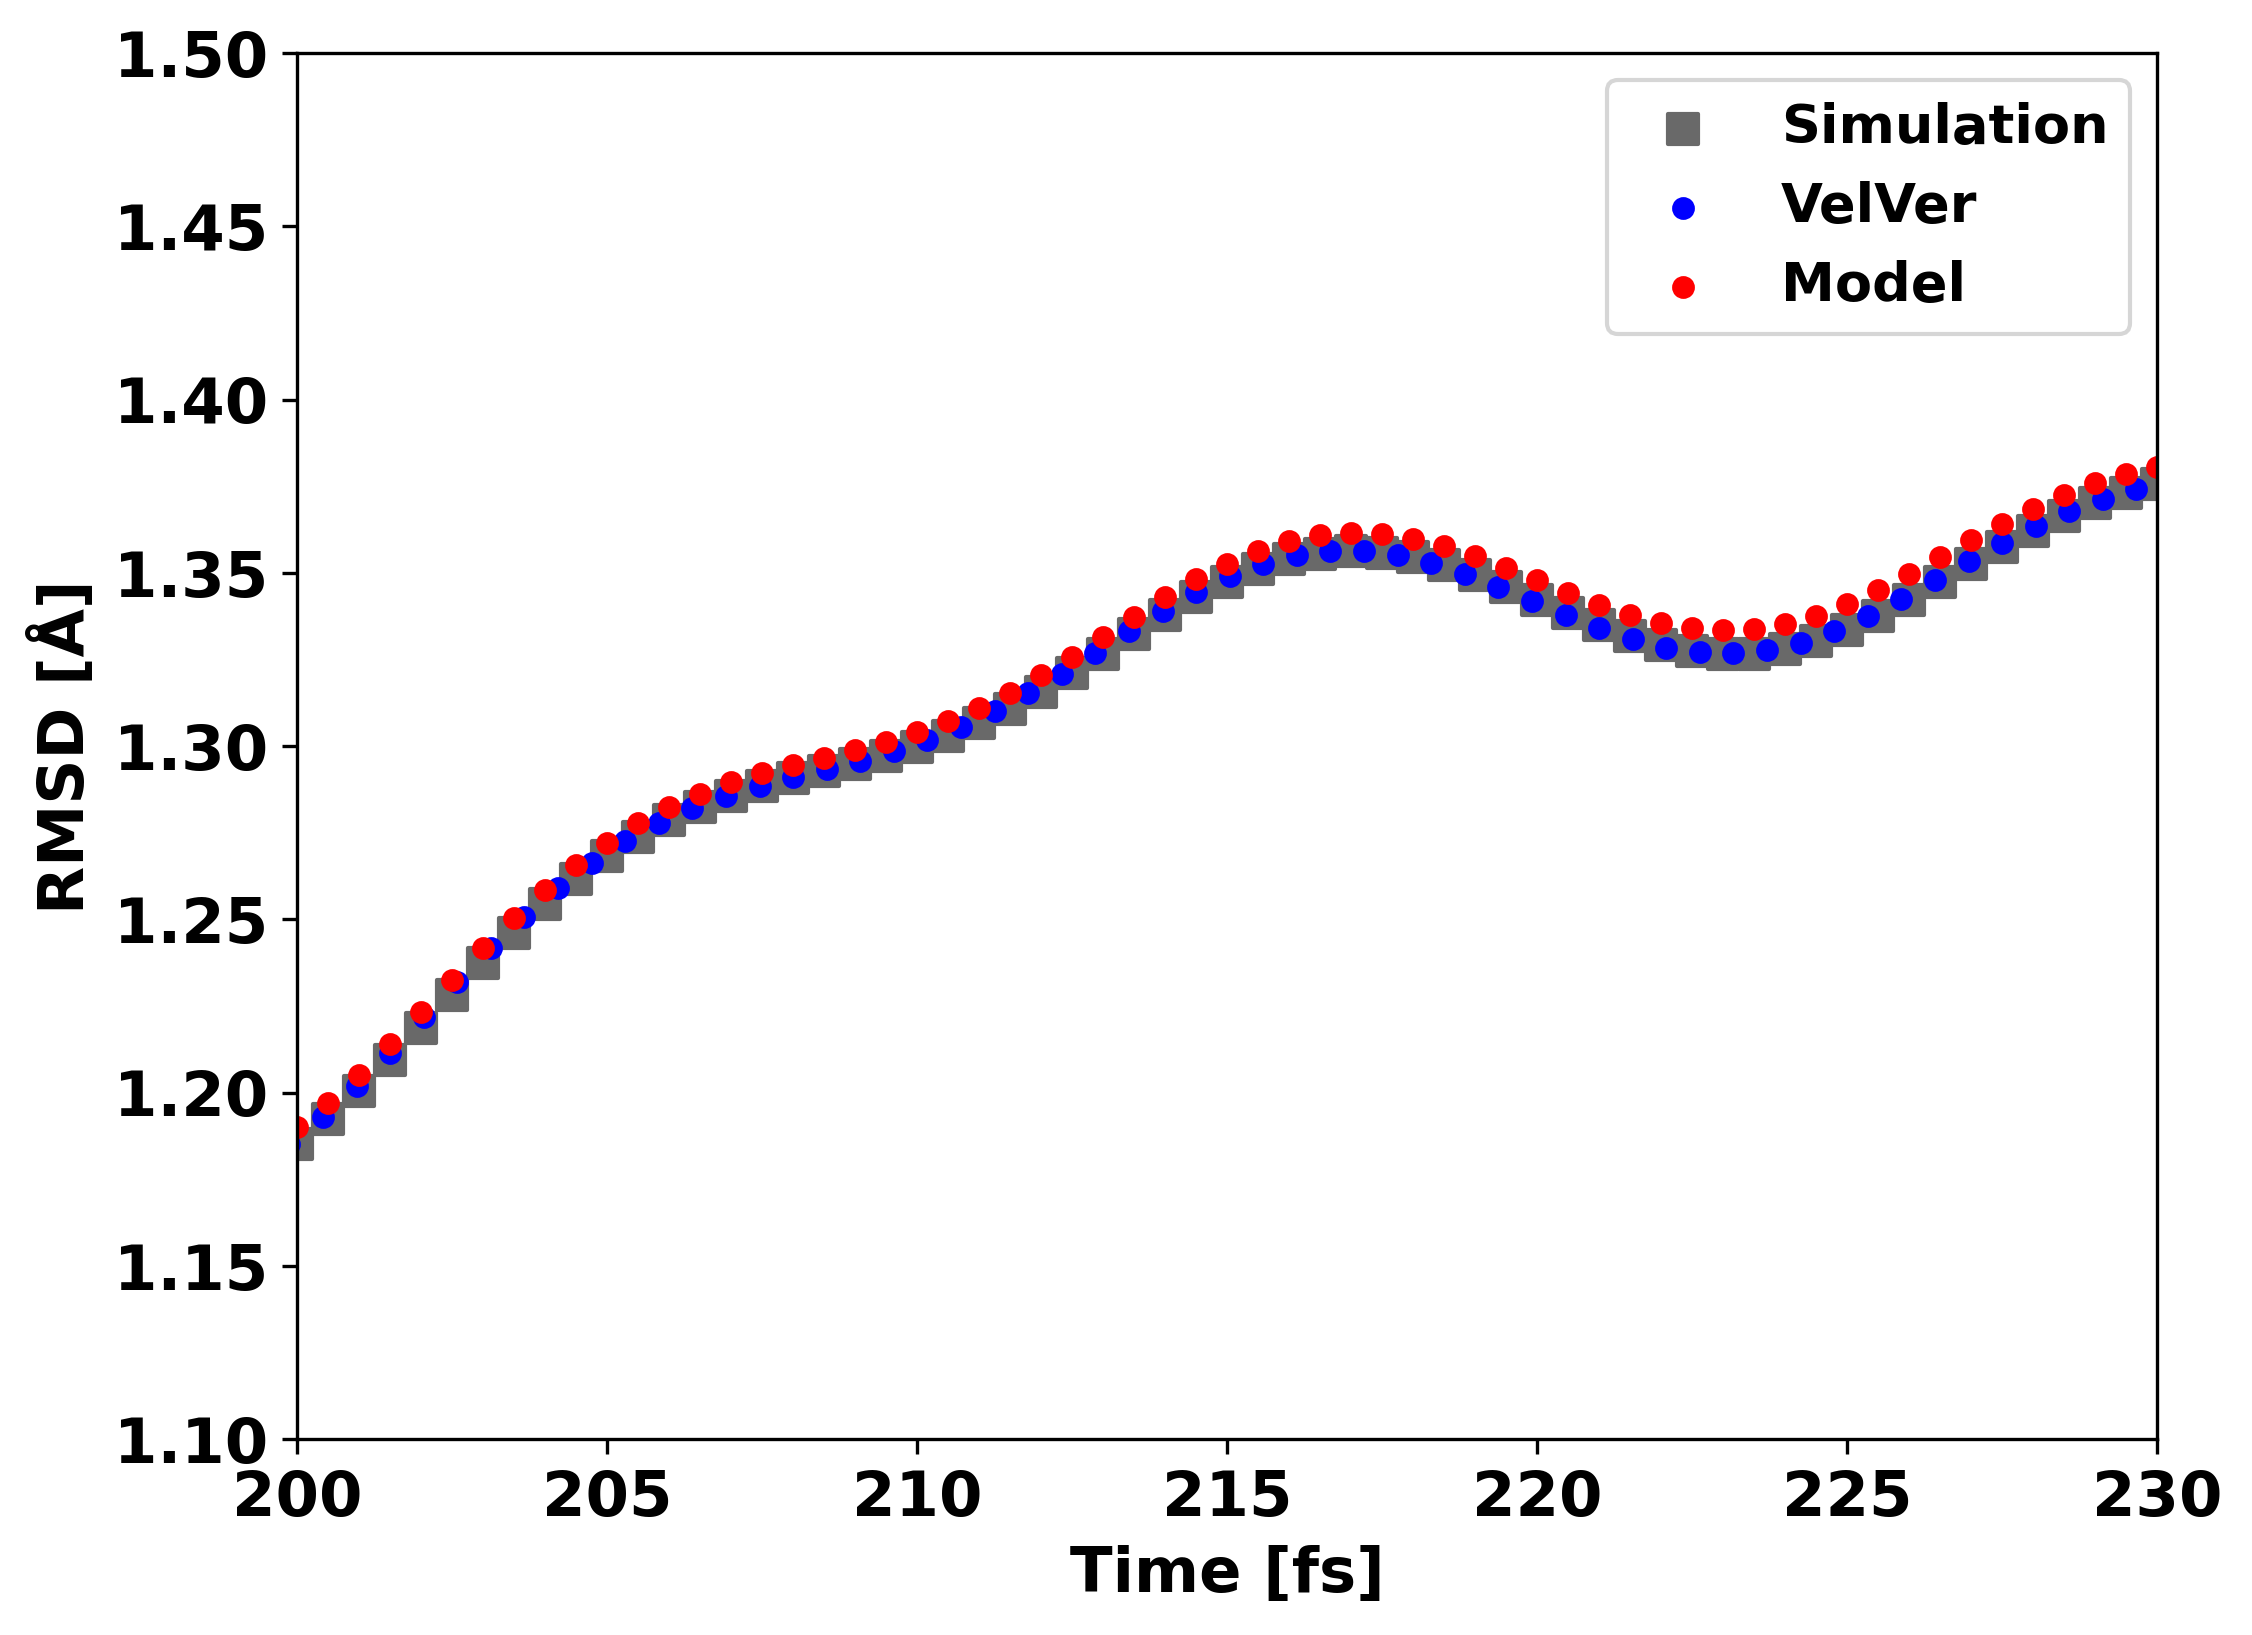

In [19]:
labels = ["Simulation","VelVer", "Model"]
rmsd = [rmsd_1, rmsd_4, rmsd_3]
colors = ["dimgray", "blue", "red"]
marker=["s", ".", "."]
dt = [0.5, 0.541667, 0.5]
s = [55, 80, 80]
fig, ax = plt.subplots(1, figsize=(8, 6))
for i in range(len(rmsd)):
    ax.scatter(np.arange(len(rmsd[i]))*dt[i], rmsd[i], label=labels[i], color=colors[i], marker=marker[i], s=s[i])


ax.set_xlabel("Time [fs]", fontweight="bold")
ax.set_ylabel("RMSD [Å]", fontweight="bold")
ax.set_ylim(1.1, 1.5)
ax.set_xlim(200, 230)
plt.legend(fontsize=13)
ax.minorticks_off()
plt.show()

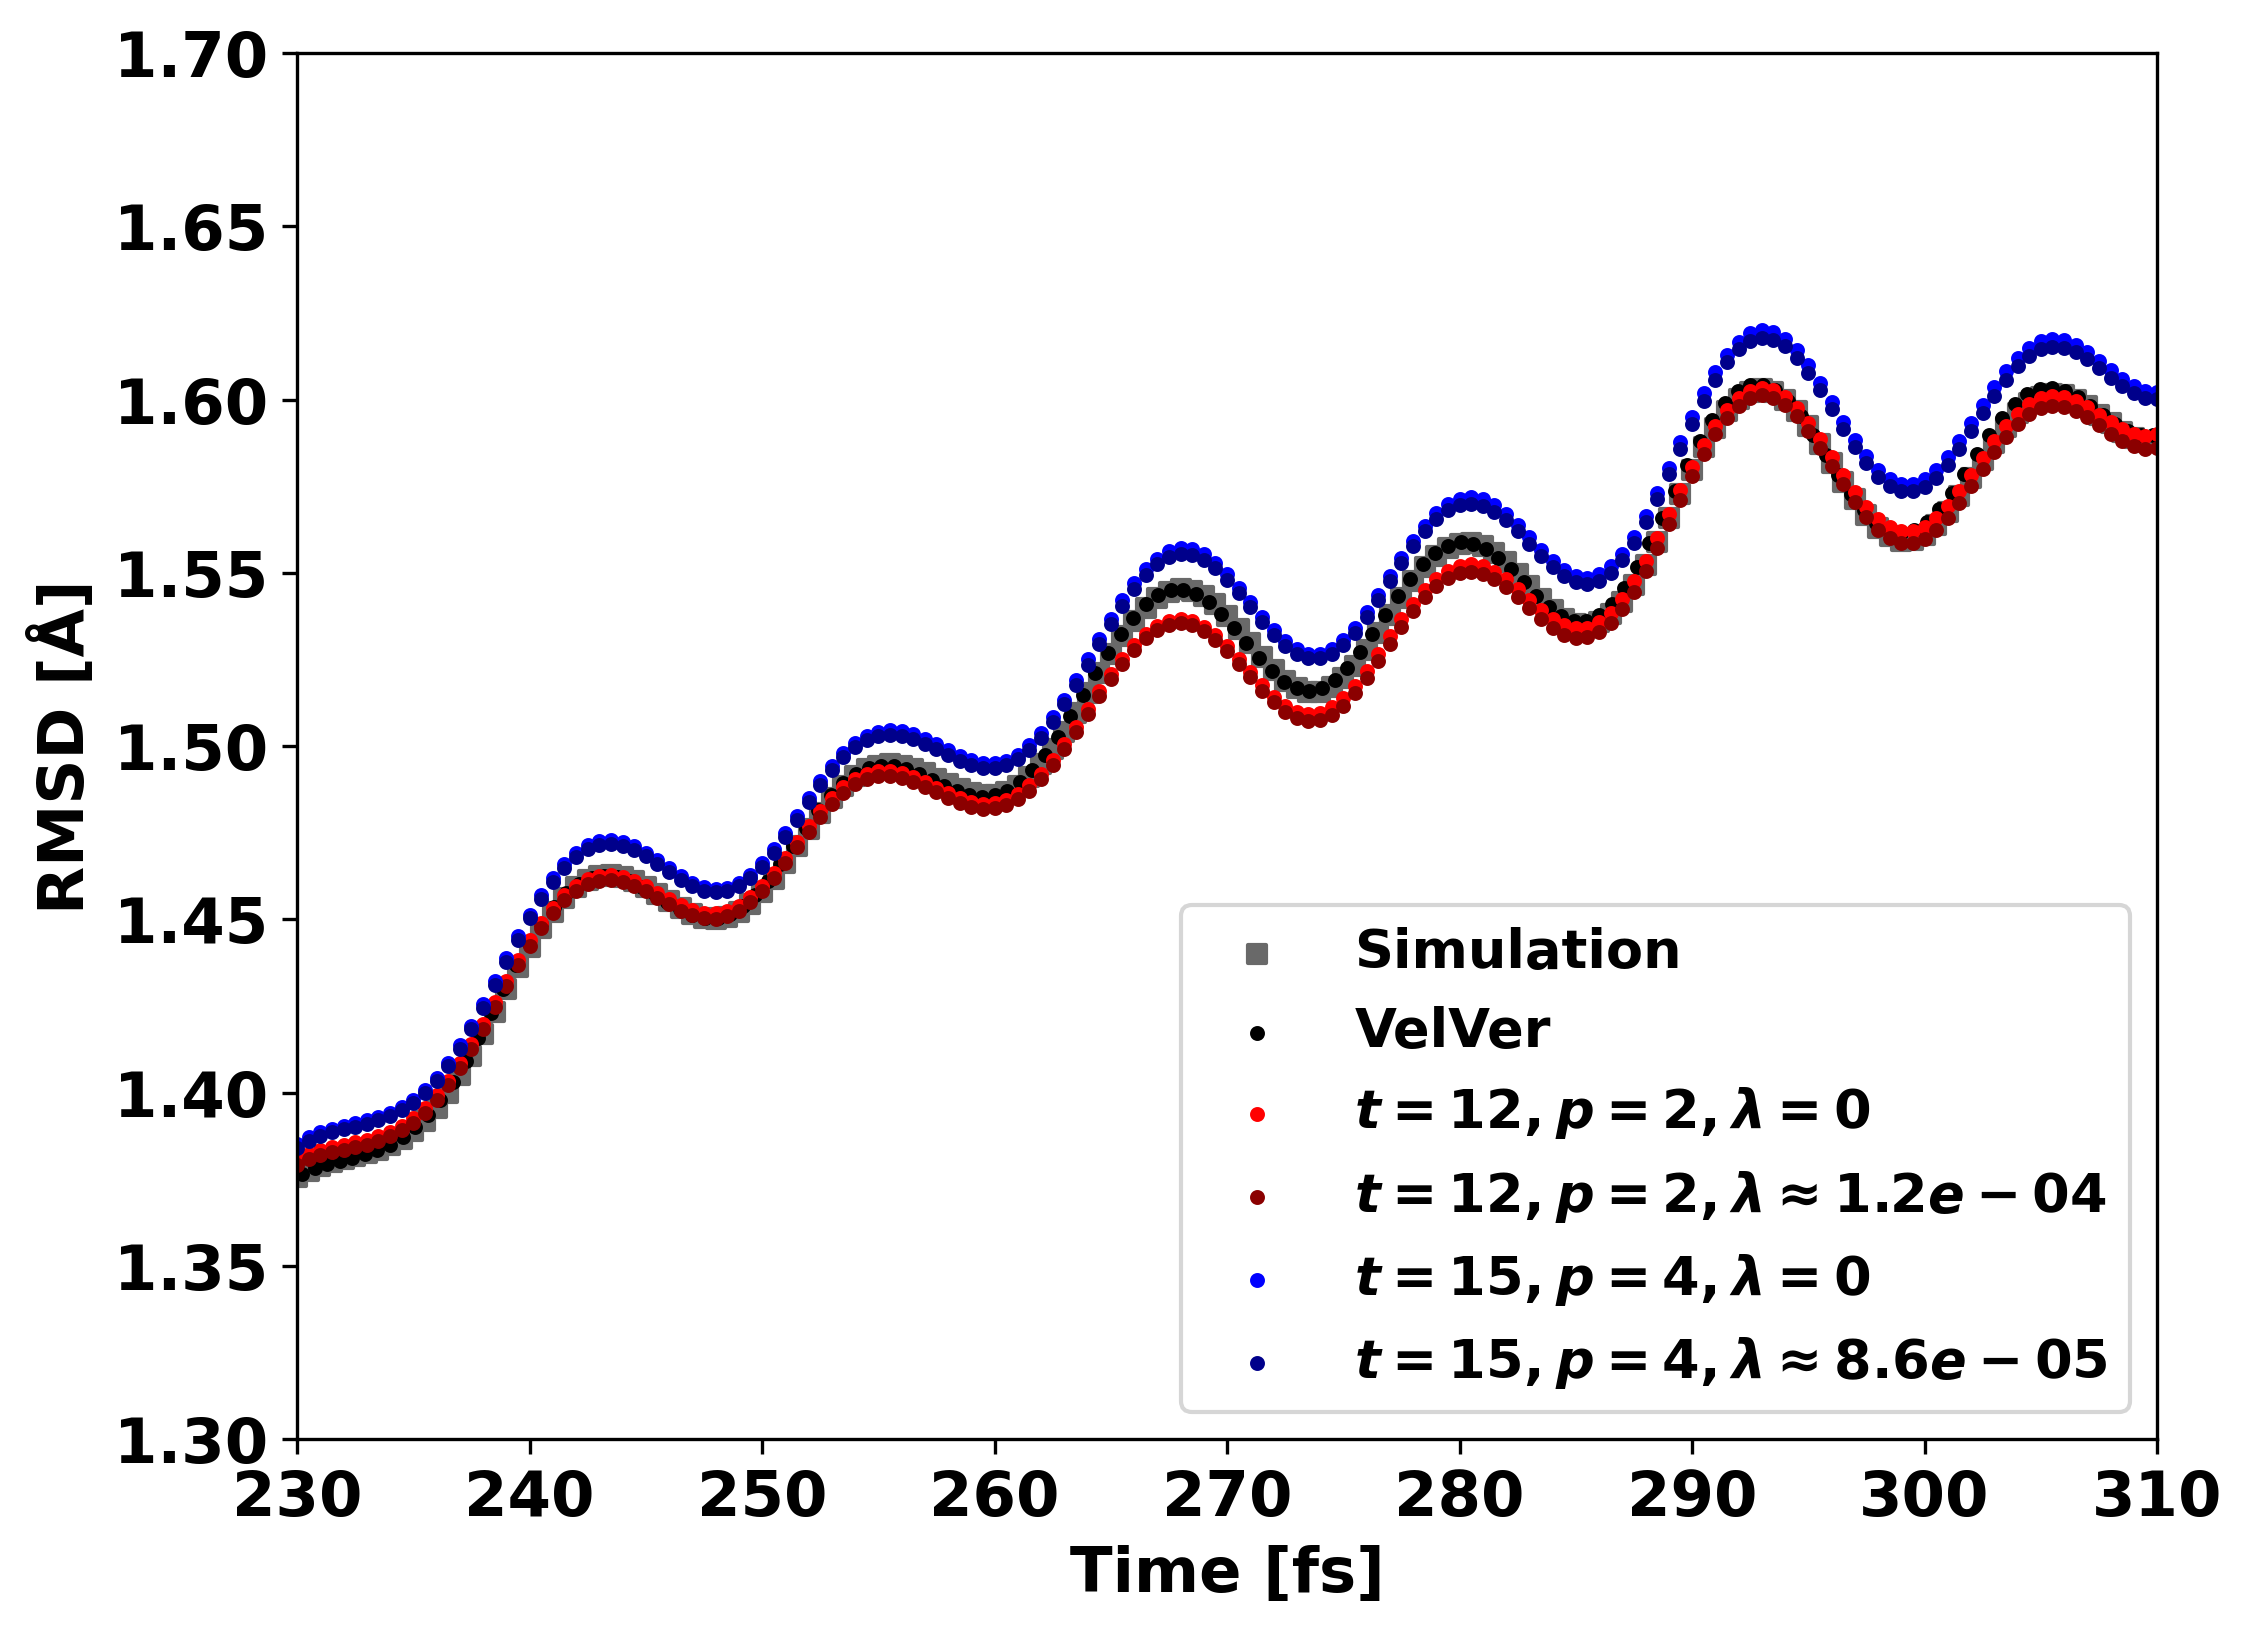

In [94]:
labels = ["Simulation","VelVer", "$t=12, p=2, \lambda=0$",  r"$t=12, p=2, \lambda\approx 1.2e-04$", "$t=15, p=4, \lambda=0$", r"$t=15, p=4, \lambda\approx 8.6e-05$"]
rmsd = [rmsd_1, rmsd_4, rmsd_3, rmsd_5, rmsd_6, rmsd_7]
colors = ["dimgray", "black", "red",  "darkred", "blue", "darkblue"]
marker=["s", ".", ".", ".", ".", "."]
dt = [0.5, 0.541667, 0.5, 0.5, 0.5, 0.5]
s = [55, 80, 80, 80, 80, 80]
fig, ax = plt.subplots(1, figsize=(8, 6))
for i in range(len(rmsd)):
    ax.scatter(np.arange(len(rmsd[i]))*dt[i], rmsd[i], label=labels[i], color=colors[i], marker=marker[i], s=s[i]/3)


ax.set_xlabel("Time [fs]", fontweight="bold")
ax.set_ylabel("RMSD [Å]", fontweight="bold")
ax.set_ylim(1.3, 1.7)
ax.set_xlim(230, 310)
plt.legend(fontsize=13)
ax.minorticks_off()
plt.show()

# Dihedral

In [39]:
def get_dihedral(mol, a1, a2, a3, a4):
    dihedral = np.zeros(len(mol))
    for i, atom in enumerate(mol):
        dihedral[i] = atom.get_dihedral(a1, a2, a3, a4)
    return dihedral


There seems to be two different dihedrals of interest in ethanol H-O-C-H and H-C-C-H. The possible indices of the dihedrals are the following

H-O-C-H:

8, 2, 1, (6, 7)


H-C-C-H:

(3, 4, 5), 0, 1, (6, 7)

In [38]:
# 12_2 
seed_1 = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
seed_2 = read(directory+"EtOH_moldyn_data_700.xyz", index=":")
model_1 = read(directory+"SVD_not_regularized12_2_500.xyz", index=":")
model_2 = read(directory+"Speed_up_ethanol12_2_700.xyz", index=":")
error = read("Data/Induced_error/Simulation_error_analysis_sigma_0.0158_500.xyz", index=":")
velver_1 = read(directory+"Velverlet_12_500.xyz", index=":")
velver_2 = read(directory+"Velverlet_12_700.xyz", index=":")

# # 12_2 reg
# seed_1 = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
# seed_2 = read(directory+"EtOH_moldyn_data_700.xyz", index=":")
# model_1 = read(directory+"SVD_regularized12_2_500_v2.xyz", index=":")
# model_2 = read(directory+"SVD_regularized12_2_700_v2.xyz", index=":")
# error = read("Data/Induced_error/Simulation_error_analysis_sigma_0.0158_500.xyz", index=":")
# velver_1 = read(directory+"Velverlet_12_500.xyz", index=":")
# velver_2 = read(directory+"Velverlet_12_700.xyz", index=":")

# # 15_4
# seed_1 = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
# seed_2 = read(directory+"EtOH_moldyn_data_700.xyz", index=":")
# model_1 = read(directory+"SVD_not_regularized15_4_500.xyz", index=":")
# model_2 = read(directory+"SVD_not_regularized15_4_700.xyz", index=":")
# error = read("Data/Induced_error/Simulation_error_analysis_sigma_0.0158_500.xyz", index=":")
# velver_1 = read(directory+"Velverlet_12_500.xyz", index=":")
# velver_2 = read(directory+"Velverlet_12_700.xyz", index=":")

# # 15_4 reg
# seed_1 = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
# seed_2 = read(directory+"EtOH_moldyn_data_700.xyz", index=":")
# model_1 = read(directory+"SVD_regularized15_4_500.xyz", index=":")
# model_2 = read(directory+"SVD_regularized15_4_700.xyz", index=":")
# error = read("Data/Induced_error/Simulation_error_analysis_sigma_0.0158_500.xyz", index=":")
# velver_1 = read(directory+"Velverlet_12_500.xyz", index=":")
# velver_2 = read(directory+"Velverlet_12_700.xyz", index=":")

In [40]:
index_O = [8, 2, 1, 7]
index_C = [3, 0, 1, 6]
index_conformer = [8, 2, 1, 0]

dihedral_O_seed_1 = get_dihedral(seed_1, *index_O)
dihedral_O_seed_2 = get_dihedral(seed_2, *index_O)
dihedral_O_model_1 = get_dihedral(model_1, *index_O)
dihedral_O_model_2 = get_dihedral(model_2, *index_O)
dihedral_O_error = get_dihedral(error, *index_O)
dihedral_O_vel_1 = get_dihedral(velver_1, *index_O)
dihedral_O_vel_2 = get_dihedral(velver_2, *index_O)


dihedral_C_seed_1 = get_dihedral(seed_1, *index_C)
dihedral_C_seed_2 = get_dihedral(seed_2, *index_C)
dihedral_C_model_1 = get_dihedral(model_1, *index_C)
dihedral_C_model_2 = get_dihedral(model_2, *index_C)
dihedral_C_error = get_dihedral(error, *index_C)
dihedral_C_vel_1 = get_dihedral(velver_1, *index_C)
dihedral_C_vel_2 = get_dihedral(velver_2, *index_C)

dihedral_conformer_seed_1 = get_dihedral(seed_1, *index_conformer)
dihedral_conformer_seed_2 = get_dihedral(seed_2, *index_conformer)
dihedral_conformer_model_1 = get_dihedral(model_1, *index_conformer)
dihedral_conformer_model_2 = get_dihedral(model_2, *index_conformer)
dihedral_conformer_error = get_dihedral(error, *index_conformer)
dihedral_conformer_vel_1 = get_dihedral(velver_1, *index_conformer)
dihedral_conformer_vel_2 = get_dihedral(velver_2, *index_conformer)

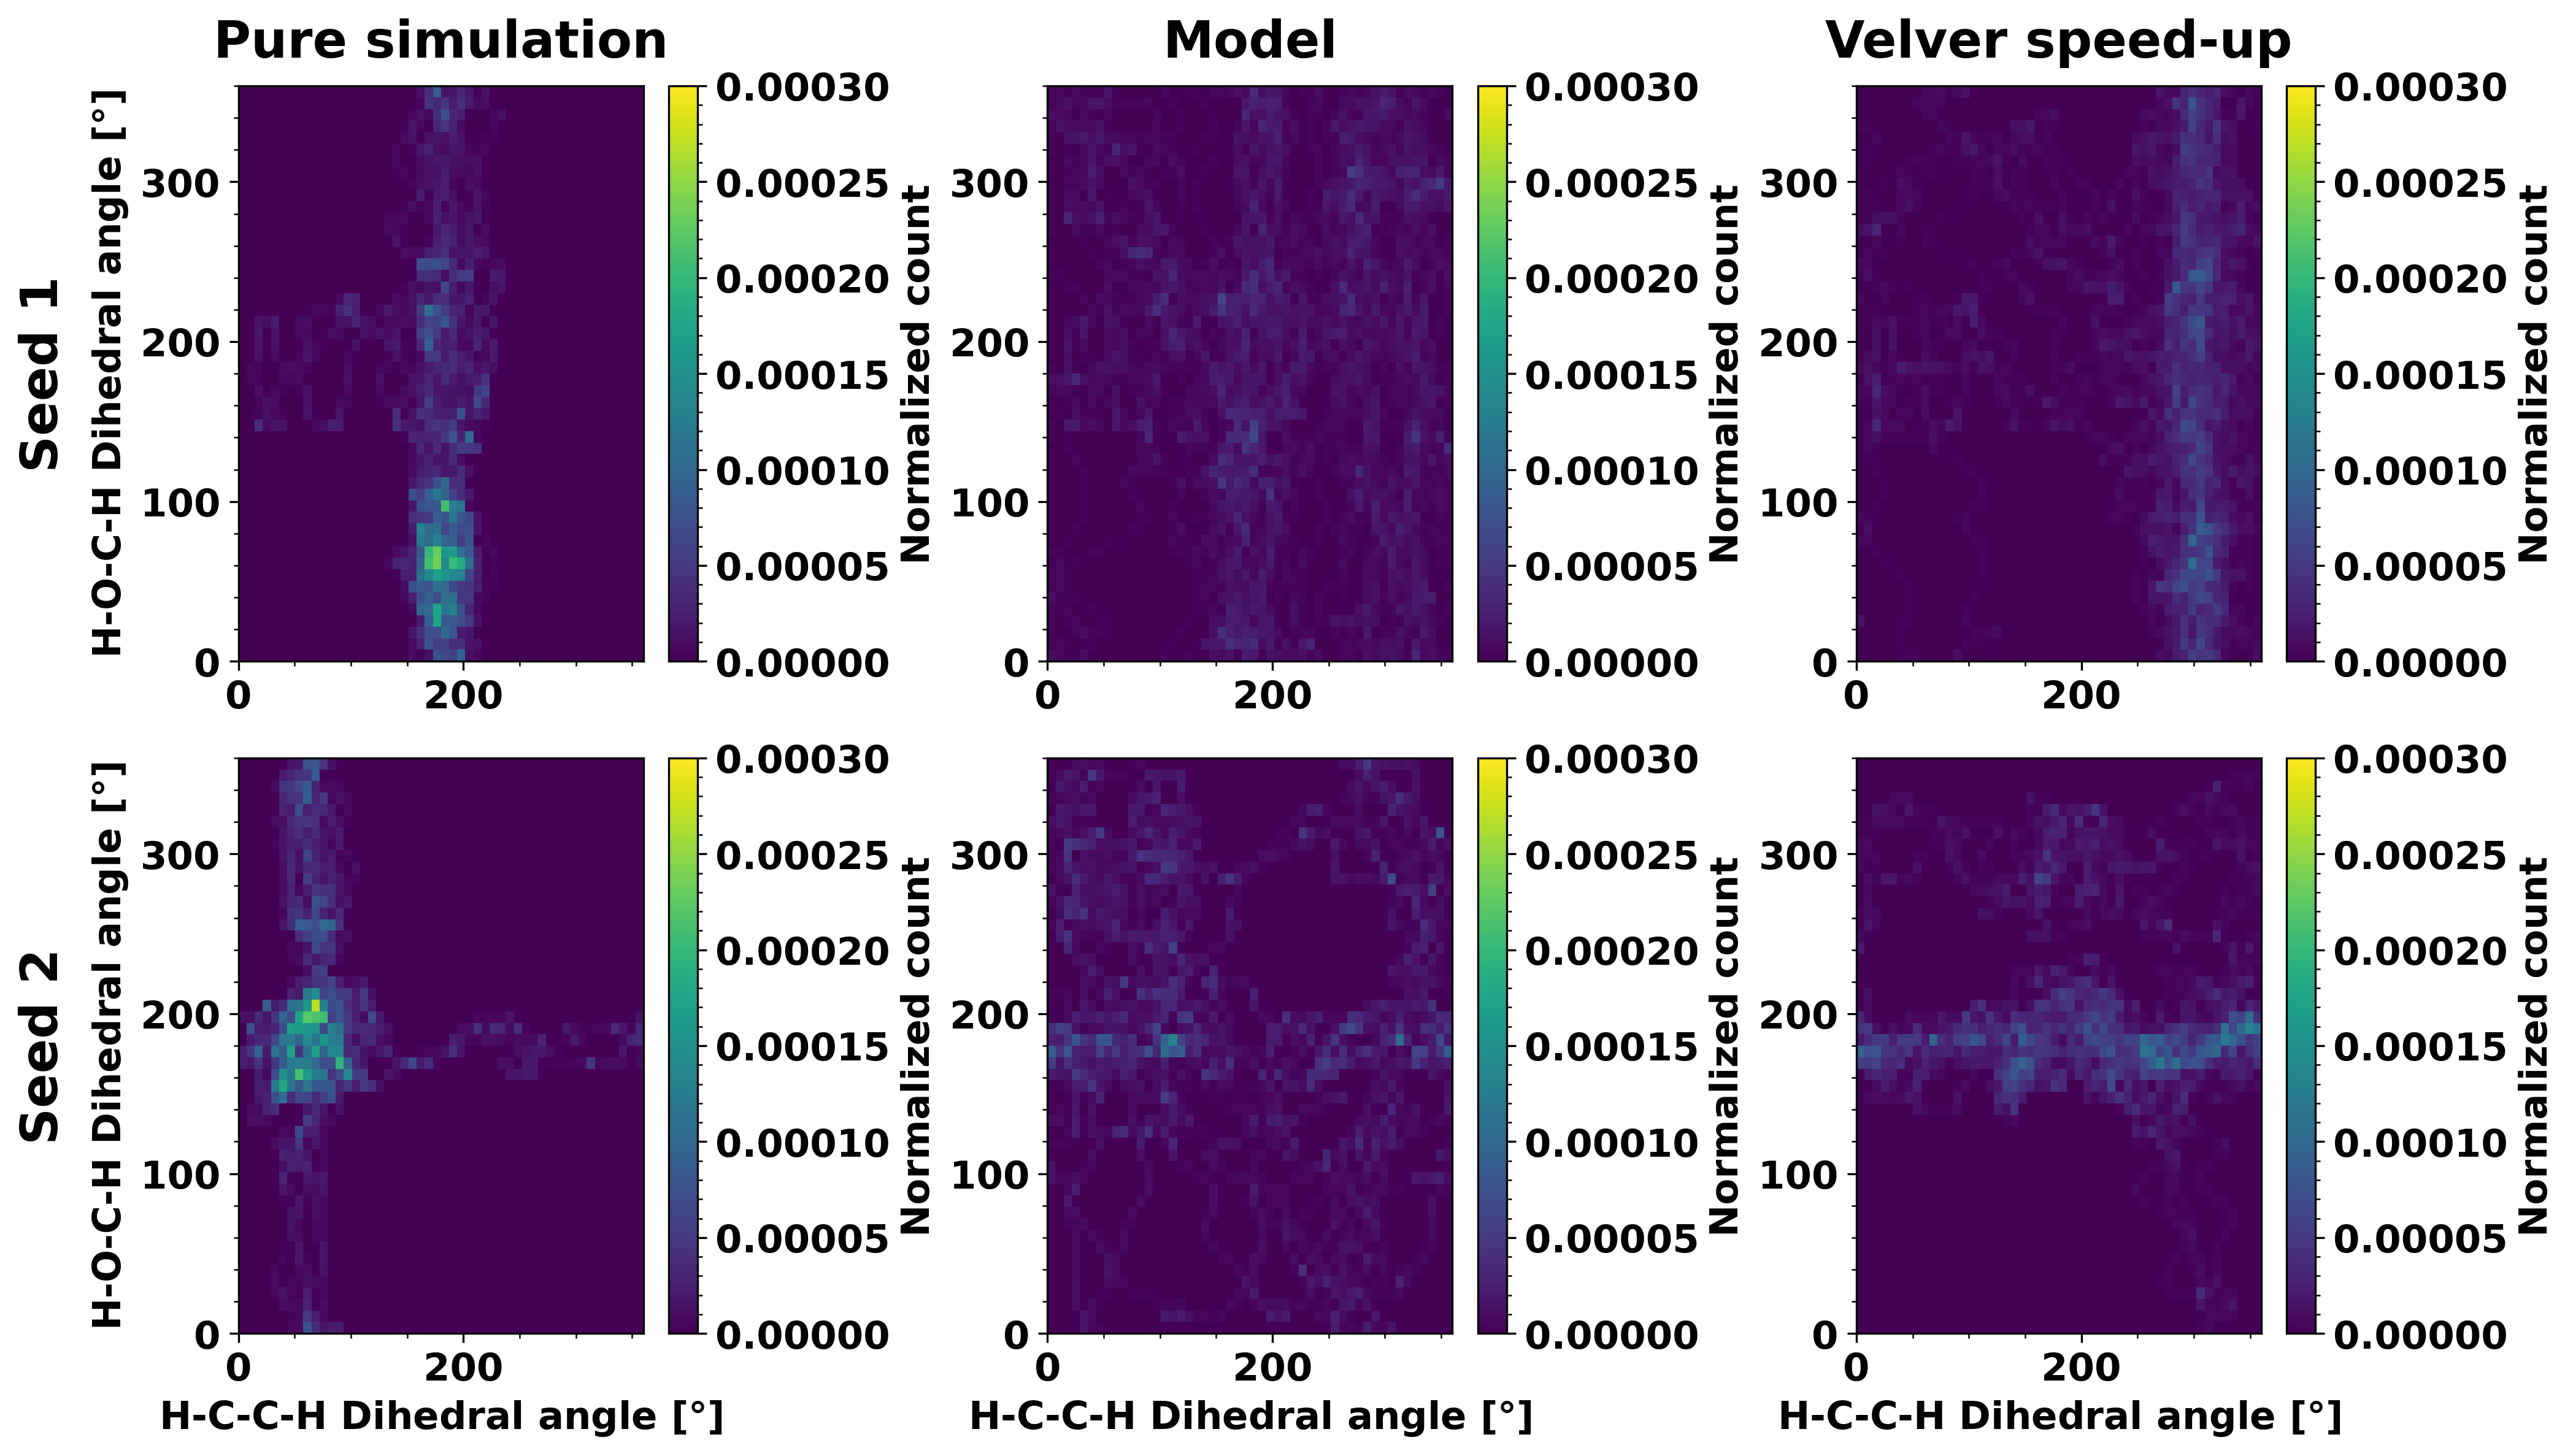

In [58]:
N_bins = 50
plot_index = 0
#x_range = (distances_model[bonds[plot_index][0], bonds[plot_index][1], :].min(), distances_model[bonds[plot_index][0], bonds[plot_index][1], :].max())

fig, ax = plt.subplots(2, 3, figsize=(14,8))
x_range = [[0, 360],[0, 360]]
h1 = ax[0,0].hist2d(dihedral_C_seed_1, dihedral_conformer_seed_1, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h2 = ax[1,0].hist2d(dihedral_C_seed_2, dihedral_conformer_seed_2, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h3 = ax[0,1].hist2d(dihedral_C_model_1, dihedral_conformer_model_1, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h4 = ax[1,1].hist2d(dihedral_C_model_2, dihedral_conformer_model_2, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h5 = ax[0,2].hist2d(dihedral_C_vel_1, dihedral_conformer_vel_1, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h6 = ax[1,2].hist2d(dihedral_C_vel_2, dihedral_conformer_vel_2, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)



pad = 5 # in point
rows = ["Seed 1", "Seed 2"]
cols = ["Pure simulation", "Model", "Velver speed-up"]
for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1.05), xytext=(0, 0),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=20, ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                fontsize=20, ha='right', va='center', rotation="vertical")

ax[1,0].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[1,1].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[1,2].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[0,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")
ax[1,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")


fig.colorbar(h1[3], ax=ax[0,0], label="Normalized count")
fig.colorbar(h2[3], ax=ax[1,0], label="Normalized count")
fig.colorbar(h3[3], ax=ax[0,1], label="Normalized count")
fig.colorbar(h4[3], ax=ax[1,1], label="Normalized count")
fig.colorbar(h5[3], ax=ax[0,2], label="Normalized count")
fig.colorbar(h6[3], ax=ax[1,2], label="Normalized count")




plt.tight_layout()
plt.show()

In [60]:
seed_1 = read(directory+"EtOH_moldyn_data_500.xyz", index=":")
model_1 = read(directory+"SVD_not_regularized12_2_500.xyz", index=":")
model_2 = read(directory+"SVD_regularized12_2_500_v2.xyz", index=":")
model_3 = read(directory+"SVD_not_regularized15_4_500.xyz", index=":")
model_4 = read(directory+"SVD_regularized15_4_500.xyz", index=":")
velver_1 = read(directory+"Velverlet_12_500.xyz", index=":")


dihedral_C_seed_1 = get_dihedral(seed_1, *index_C)
dihedral_C_model_1 = get_dihedral(model_1, *index_C)
dihedral_C_model_2 = get_dihedral(model_2, *index_C)
dihedral_C_model_3 = get_dihedral(model_3, *index_C)
dihedral_C_model_4 = get_dihedral(model_4, *index_C)
dihedral_C_vel_1 = get_dihedral(velver_1, *index_C)

dihedral_conformer_seed_1 = get_dihedral(seed_1, *index_conformer)
dihedral_conformer_seed_2 = get_dihedral(seed_2, *index_conformer)
dihedral_conformer_model_1 = get_dihedral(model_1, *index_conformer)
dihedral_conformer_model_2 = get_dihedral(model_2, *index_conformer)
dihedral_conformer_model_3 = get_dihedral(model_3, *index_conformer)
dihedral_conformer_model_4 = get_dihedral(model_4, *index_conformer)
dihedral_conformer_vel_1 = get_dihedral(velver_1, *index_conformer)

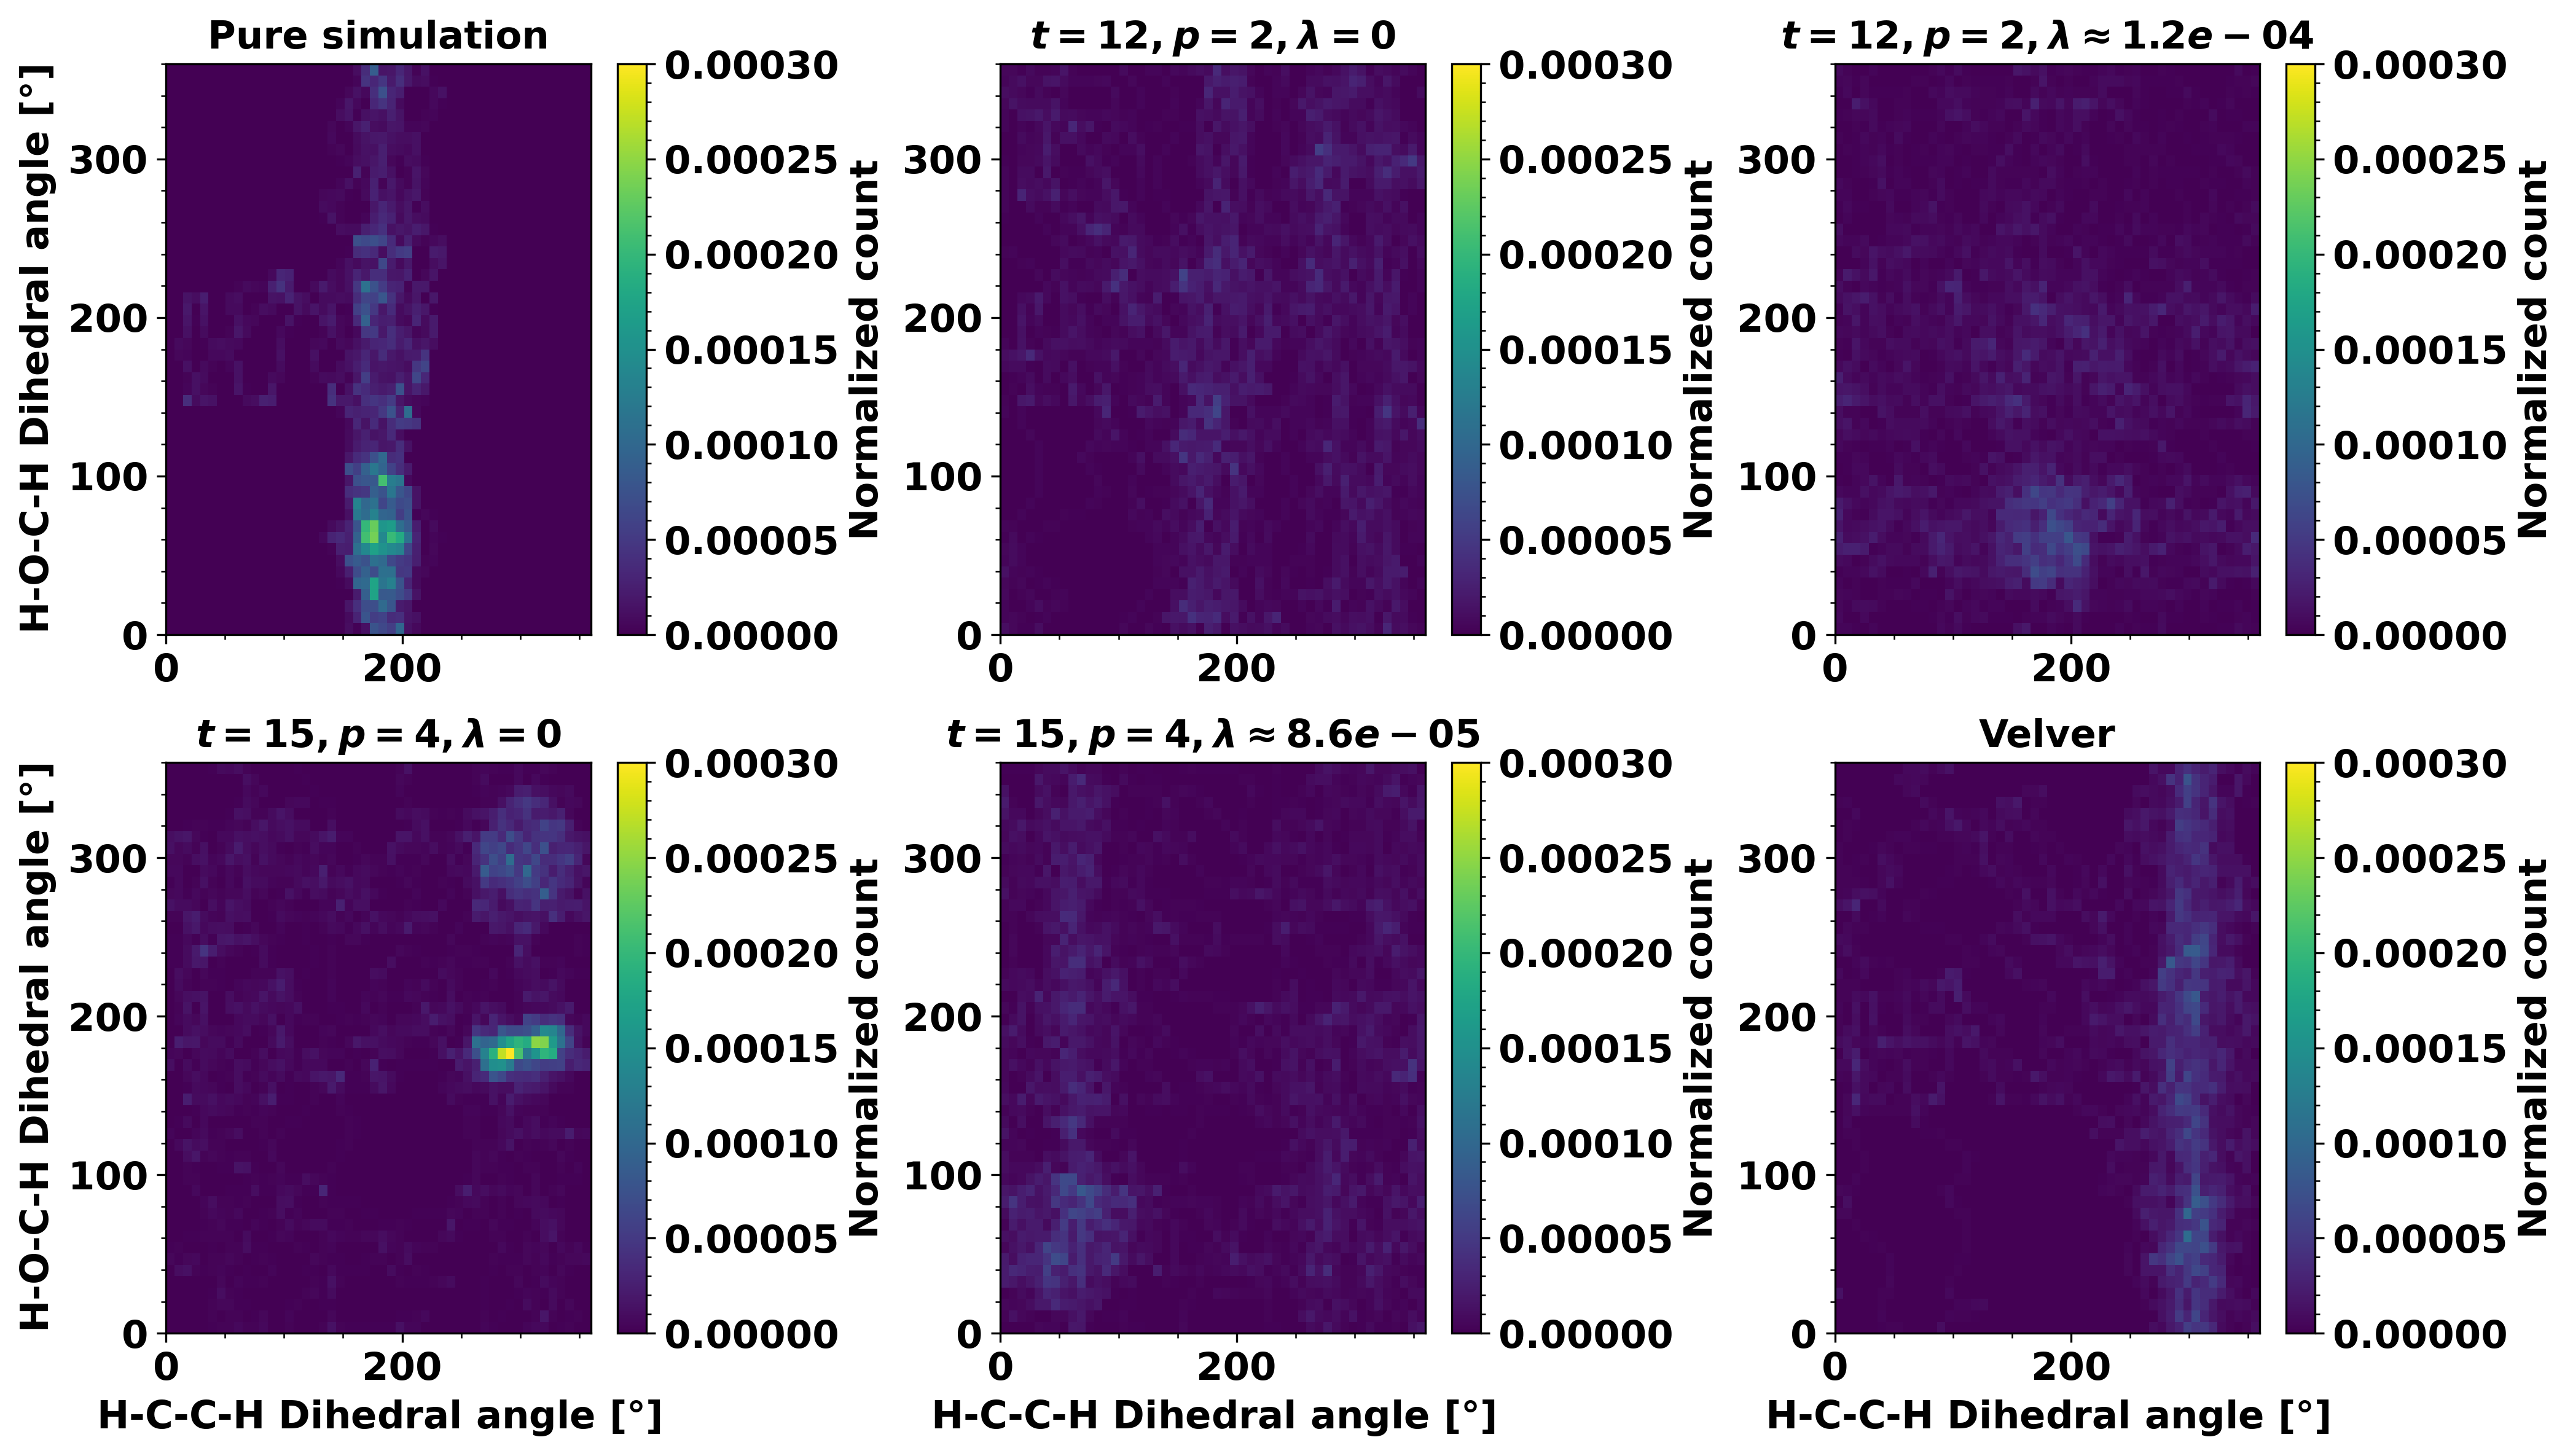

In [62]:
N_bins = 50
plot_index = 0
#x_range = (distances_model[bonds[plot_index][0], bonds[plot_index][1], :].min(), distances_model[bonds[plot_index][0], bonds[plot_index][1], :].max())

fig, ax = plt.subplots(2, 3, figsize=(14,8))
x_range = [[0, 360],[0, 360]]
h1 = ax[0,0].hist2d(dihedral_C_seed_1, dihedral_conformer_seed_1, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h2 = ax[0,1].hist2d(dihedral_C_model_1, dihedral_conformer_model_1, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h3 = ax[0,2].hist2d(dihedral_C_model_2, dihedral_conformer_model_2, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h4 = ax[1,0].hist2d(dihedral_C_model_3, dihedral_conformer_model_3, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h5 = ax[1,1].hist2d(dihedral_C_model_4, dihedral_conformer_model_4, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)
h6 = ax[1,2].hist2d(dihedral_C_vel_1, dihedral_conformer_vel_1, bins=N_bins, range=x_range, density=True, vmin=0, vmax=0.0003)


ax[1,0].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[1,1].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[1,2].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[0,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")
ax[1,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")

titles = ["Pure simulation", "$t=15, p=4, \lambda=0$", "$t=12, p=2, \lambda=0$", r"$t=15, p=4, \lambda\approx 8.6e-05$", r"$t=12, p=2, \lambda\approx 1.2e-04$", "Velver"]
for i in range(3):
    for j in range(2):
        ax[j, i].set_title(titles[2*i+j])

fig.colorbar(h1[3], ax=ax[0,0], label="Normalized count")
fig.colorbar(h2[3], ax=ax[1,0], label="Normalized count")
fig.colorbar(h3[3], ax=ax[0,1], label="Normalized count")
fig.colorbar(h4[3], ax=ax[1,1], label="Normalized count")
fig.colorbar(h5[3], ax=ax[0,2], label="Normalized count")
fig.colorbar(h6[3], ax=ax[1,2], label="Normalized count")


plt.tight_layout()
plt.show()

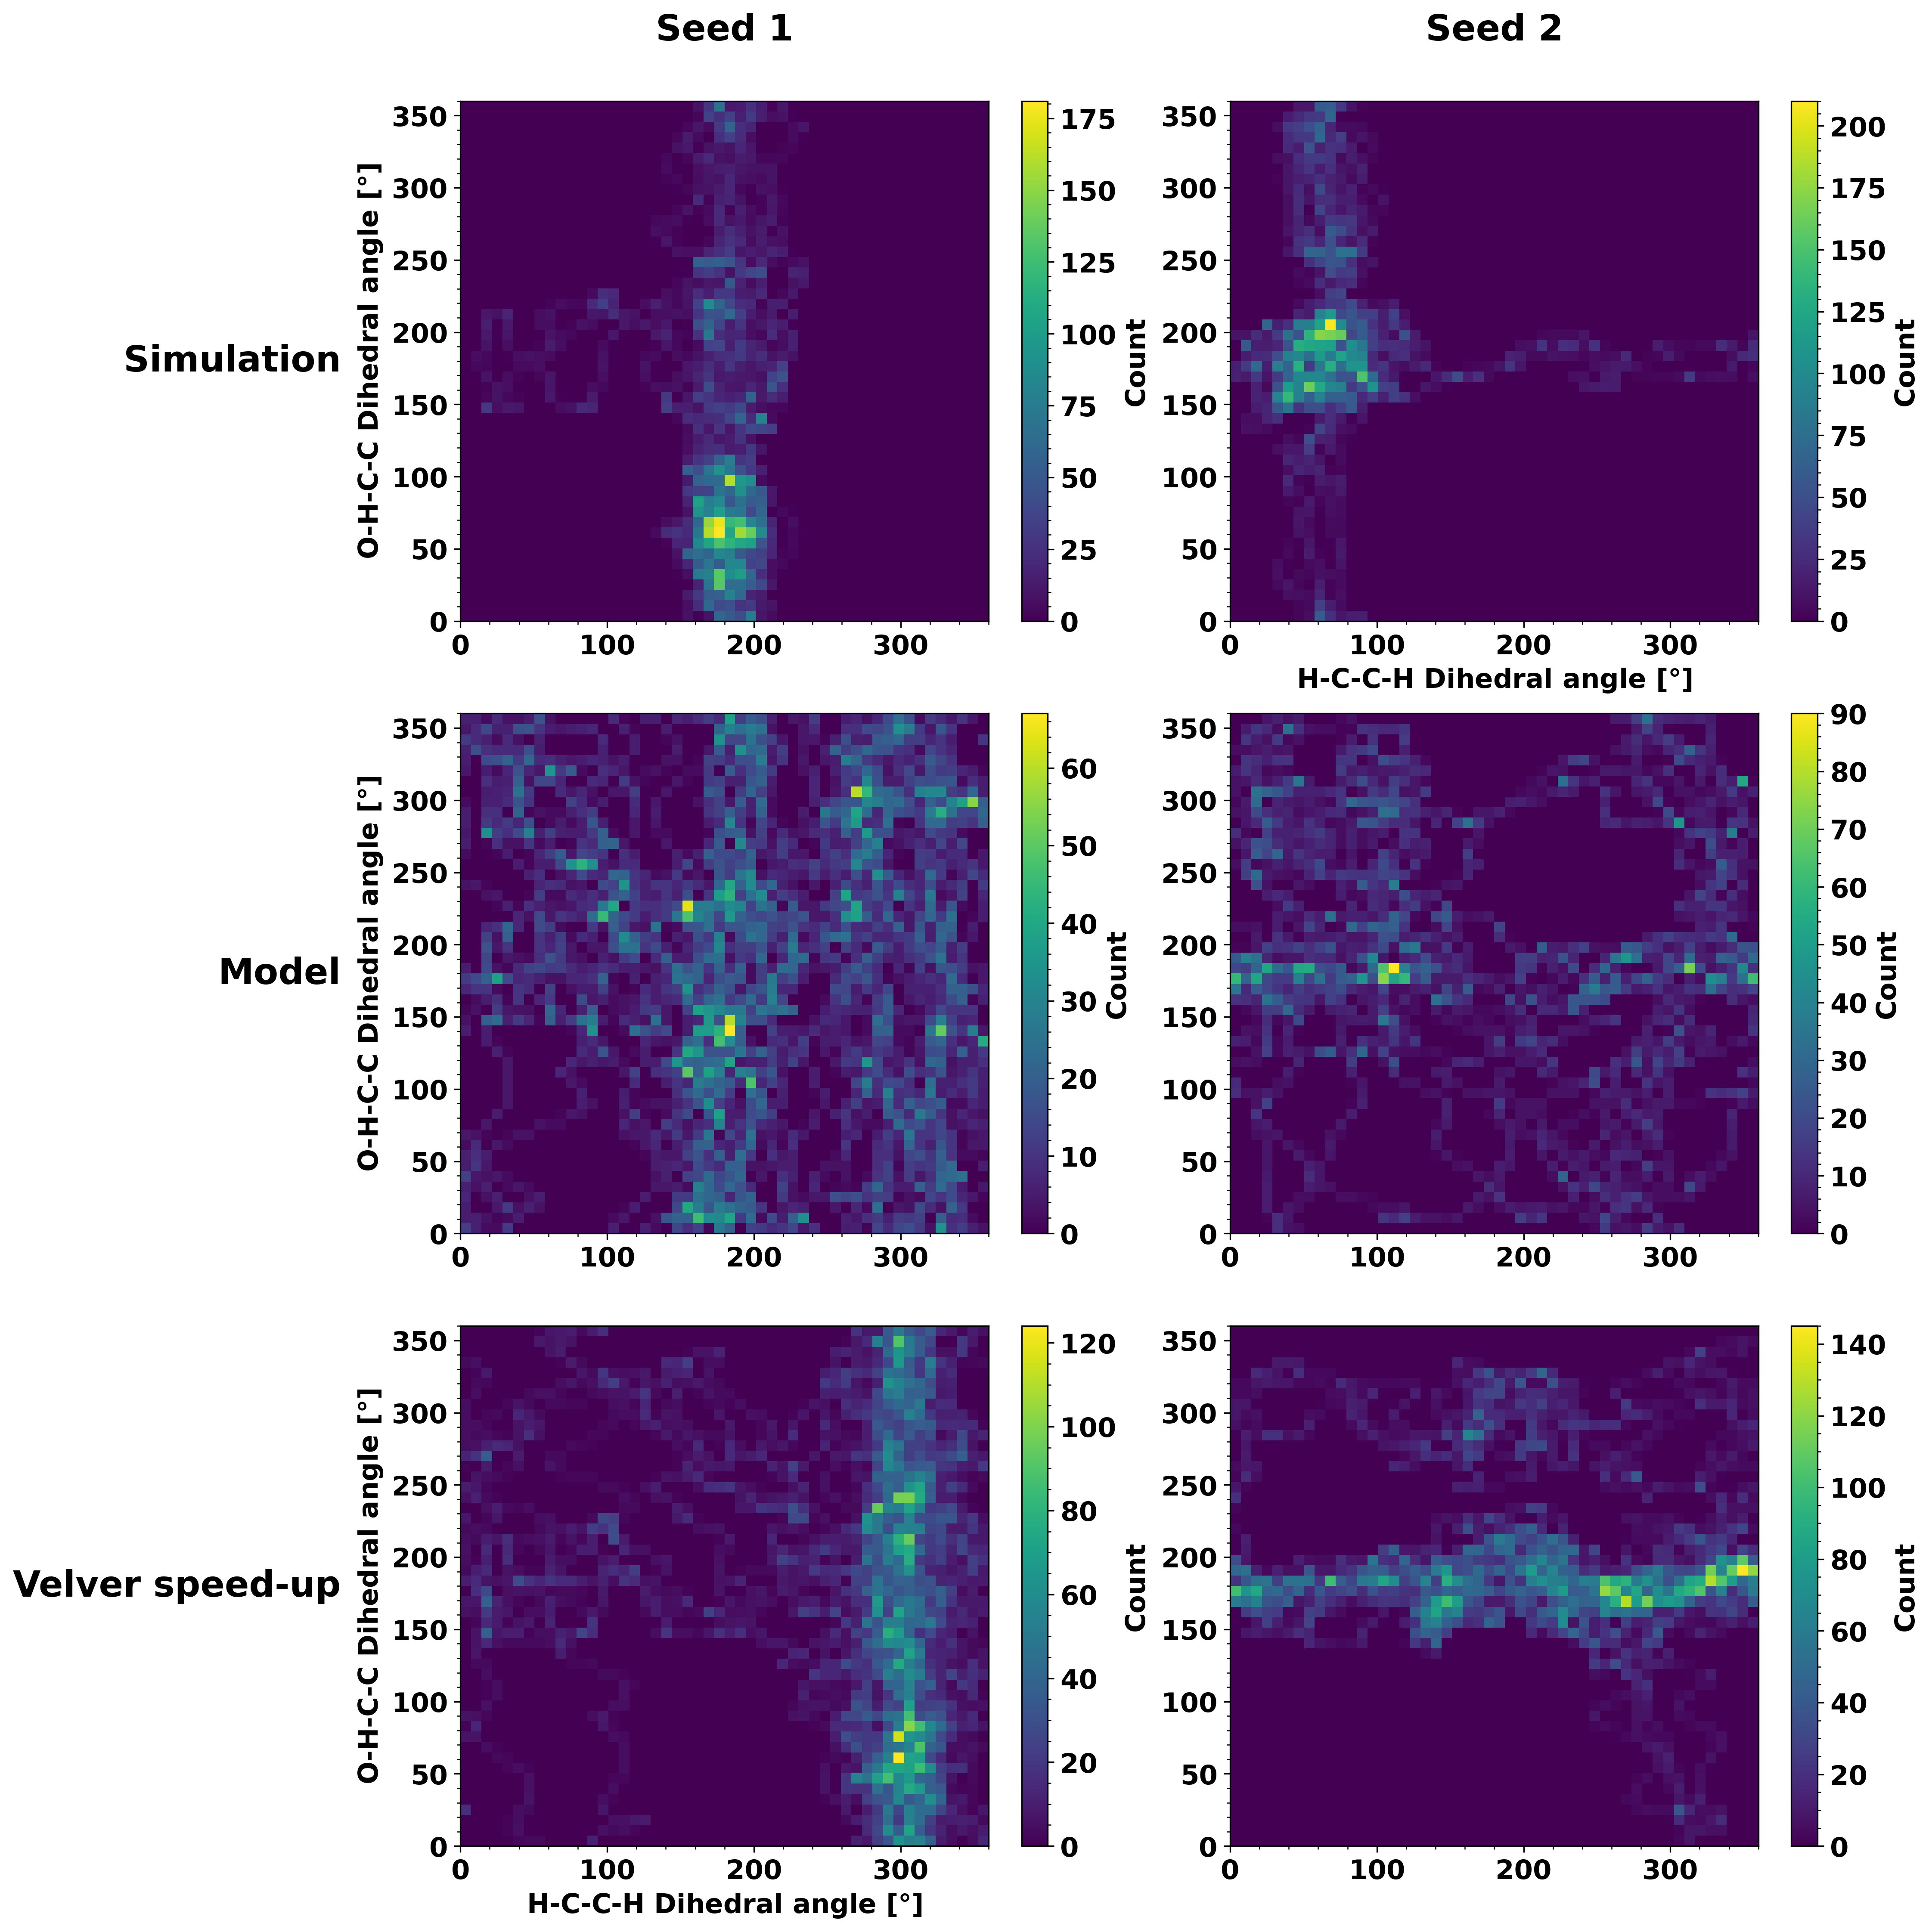

In [6]:
N_bins = 50
plot_index = 0
#x_range = (distances_model[bonds[plot_index][0], bonds[plot_index][1], :].min(), distances_model[bonds[plot_index][0], bonds[plot_index][1], :].max())

fig, ax = plt.subplots(3, 2, figsize=(15,15))
x_range = [[0, 360],[0, 360]]
h1 = ax[0,0].hist2d(dihedral_C_seed_1, dihedral_conformer_seed_1, bins=N_bins, range=x_range)
h2 = ax[0,1].hist2d(dihedral_C_seed_2, dihedral_conformer_seed_2, bins=N_bins, range=x_range)
h3 = ax[1,0].hist2d(dihedral_C_model_1, dihedral_conformer_model_1, bins=N_bins, range=x_range)
h4 = ax[1,1].hist2d(dihedral_C_model_2, dihedral_conformer_model_2, bins=N_bins, range=x_range)
h5 = ax[2,0].hist2d(dihedral_C_vel_1, dihedral_conformer_vel_1, bins=N_bins, range=x_range)
h6 = ax[2,1].hist2d(dihedral_C_vel_2, dihedral_conformer_vel_2, bins=N_bins, range=x_range)

pad = 5 # in point
cols = ["Seed 1", "Seed 2"]
rows = ["Simulation", "Model", "Velver speed-up"]
for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1.1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=20, ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                fontsize=20, ha='right', va='center')

ax[2,0].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[0,1].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[0,0].set_ylabel("O-H-C-C Dihedral angle [$\degree$]")
ax[1,0].set_ylabel("O-H-C-C Dihedral angle [$\degree$]")
ax[2,0].set_ylabel("O-H-C-C Dihedral angle [$\degree$]")

fig.colorbar(h1[3], ax=ax[0,0], label="Count")
fig.colorbar(h2[3], ax=ax[0,1], label="Count")
fig.colorbar(h3[3], ax=ax[1,0], label="Count")
fig.colorbar(h4[3], ax=ax[1,1], label="Count")
fig.colorbar(h5[3], ax=ax[2,0], label="Count")
fig.colorbar(h6[3], ax=ax[2,1], label="Count")




plt.tight_layout()
plt.show()

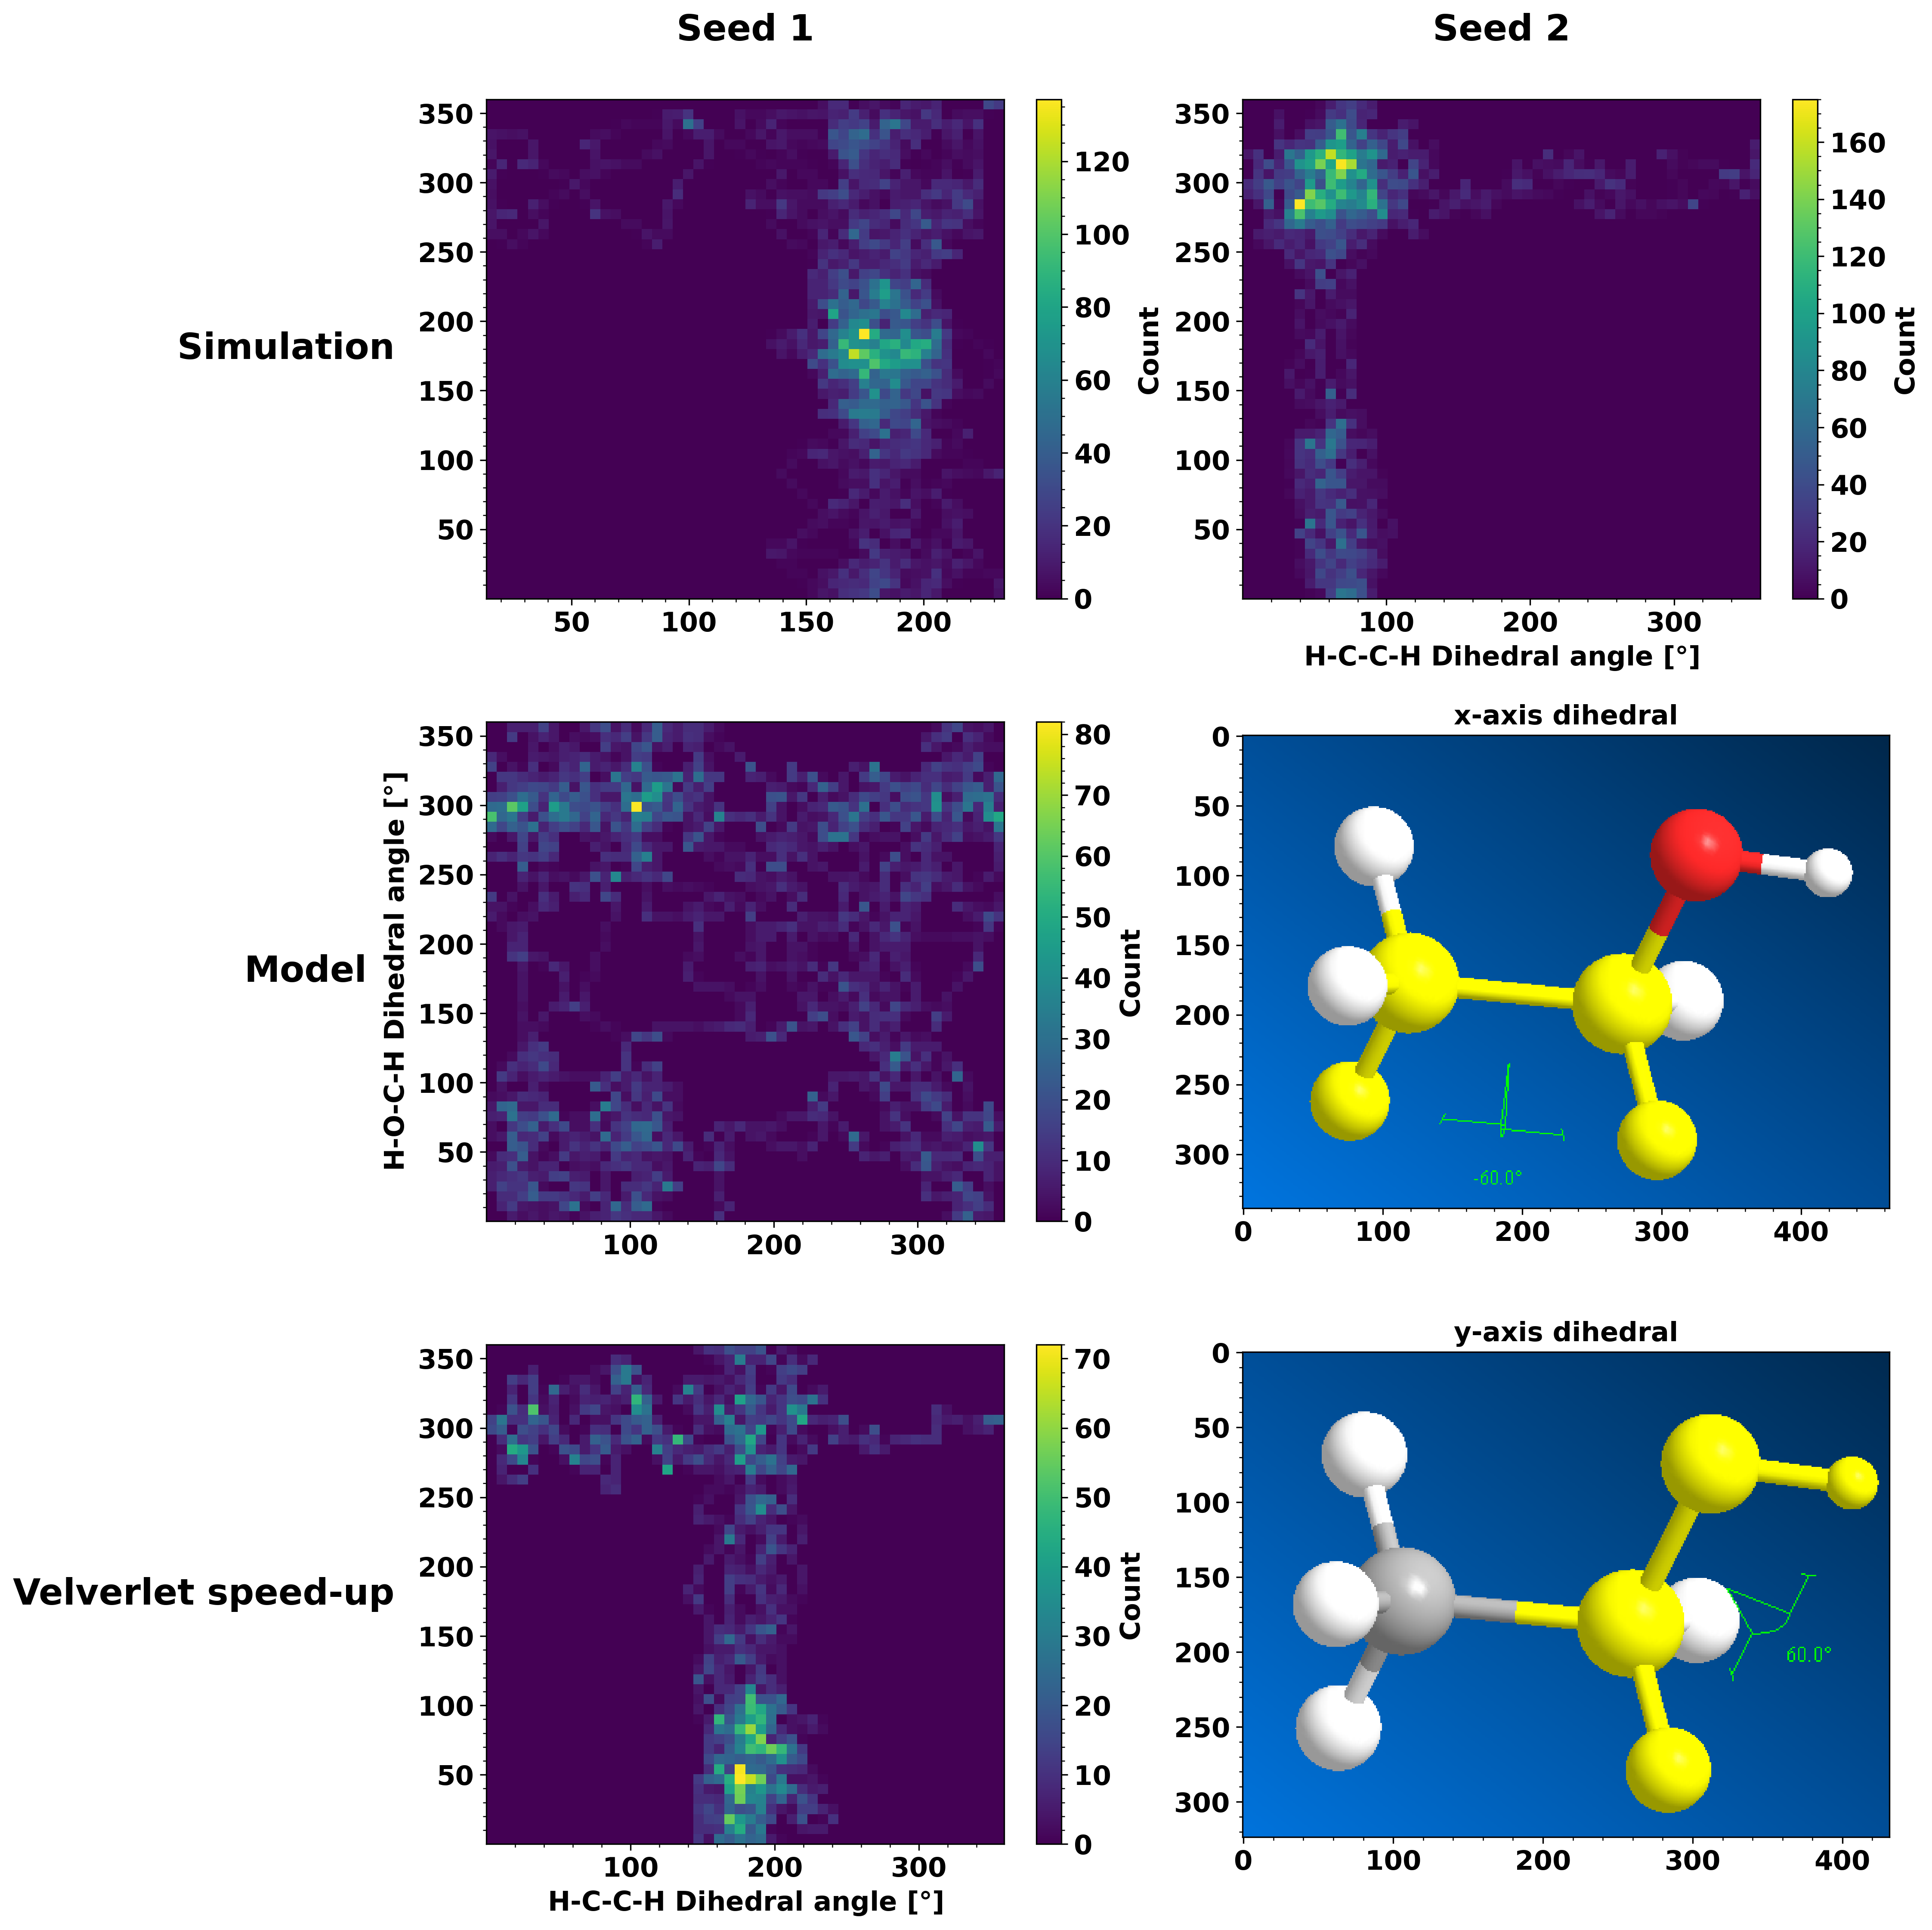

In [82]:
N_bins = 50
plot_index = 0
#x_range = (distances_model[bonds[plot_index][0], bonds[plot_index][1], :].min(), distances_model[bonds[plot_index][0], bonds[plot_index][1], :].max())

fig, ax = plt.subplots(3, 2, figsize=(15,15))

h1 = ax[0,0].hist2d(dihedral_C_seed_1, dihedral_O_seed_1, bins=N_bins)
h2 = ax[1,0].hist2d(dihedral_C_model_2, dihedral_O_model_2, bins=N_bins)
h3 = ax[2,0].hist2d(dihedral_C_error, dihedral_O_error, bins=N_bins)
h4 = ax[0,1].hist2d(dihedral_C_seed_2, dihedral_O_seed_2, bins=N_bins)

pad = 5 # in point
cols = ["Seed 1", "Seed 2"]
rows = ["Simulation", "Model", "Velverlet speed-up"]
for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1.1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=20, ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                fontsize=20, ha='right', va='center')

ax[2,0].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[0,1].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[1,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")
ax[1,1].imshow(np.asarray(Image.open("../Pictures/ethanol_dihedral_HCCH.png")))
ax[2,1].imshow(np.asarray(Image.open("../Pictures/ethanol_dihedral_HOCH.png")))
ax[1,1].set_title("x-axis dihedral")
ax[2,1].set_title("y-axis dihedral")
fig.colorbar(h1[3], ax=ax[0,0], label="Count")
fig.colorbar(h2[3], ax=ax[1,0], label="Count")
fig.colorbar(h3[3], ax=ax[2,0], label="Count")
fig.colorbar(h4[3], ax=ax[0,1], label="Count")




plt.tight_layout()
plt.show()

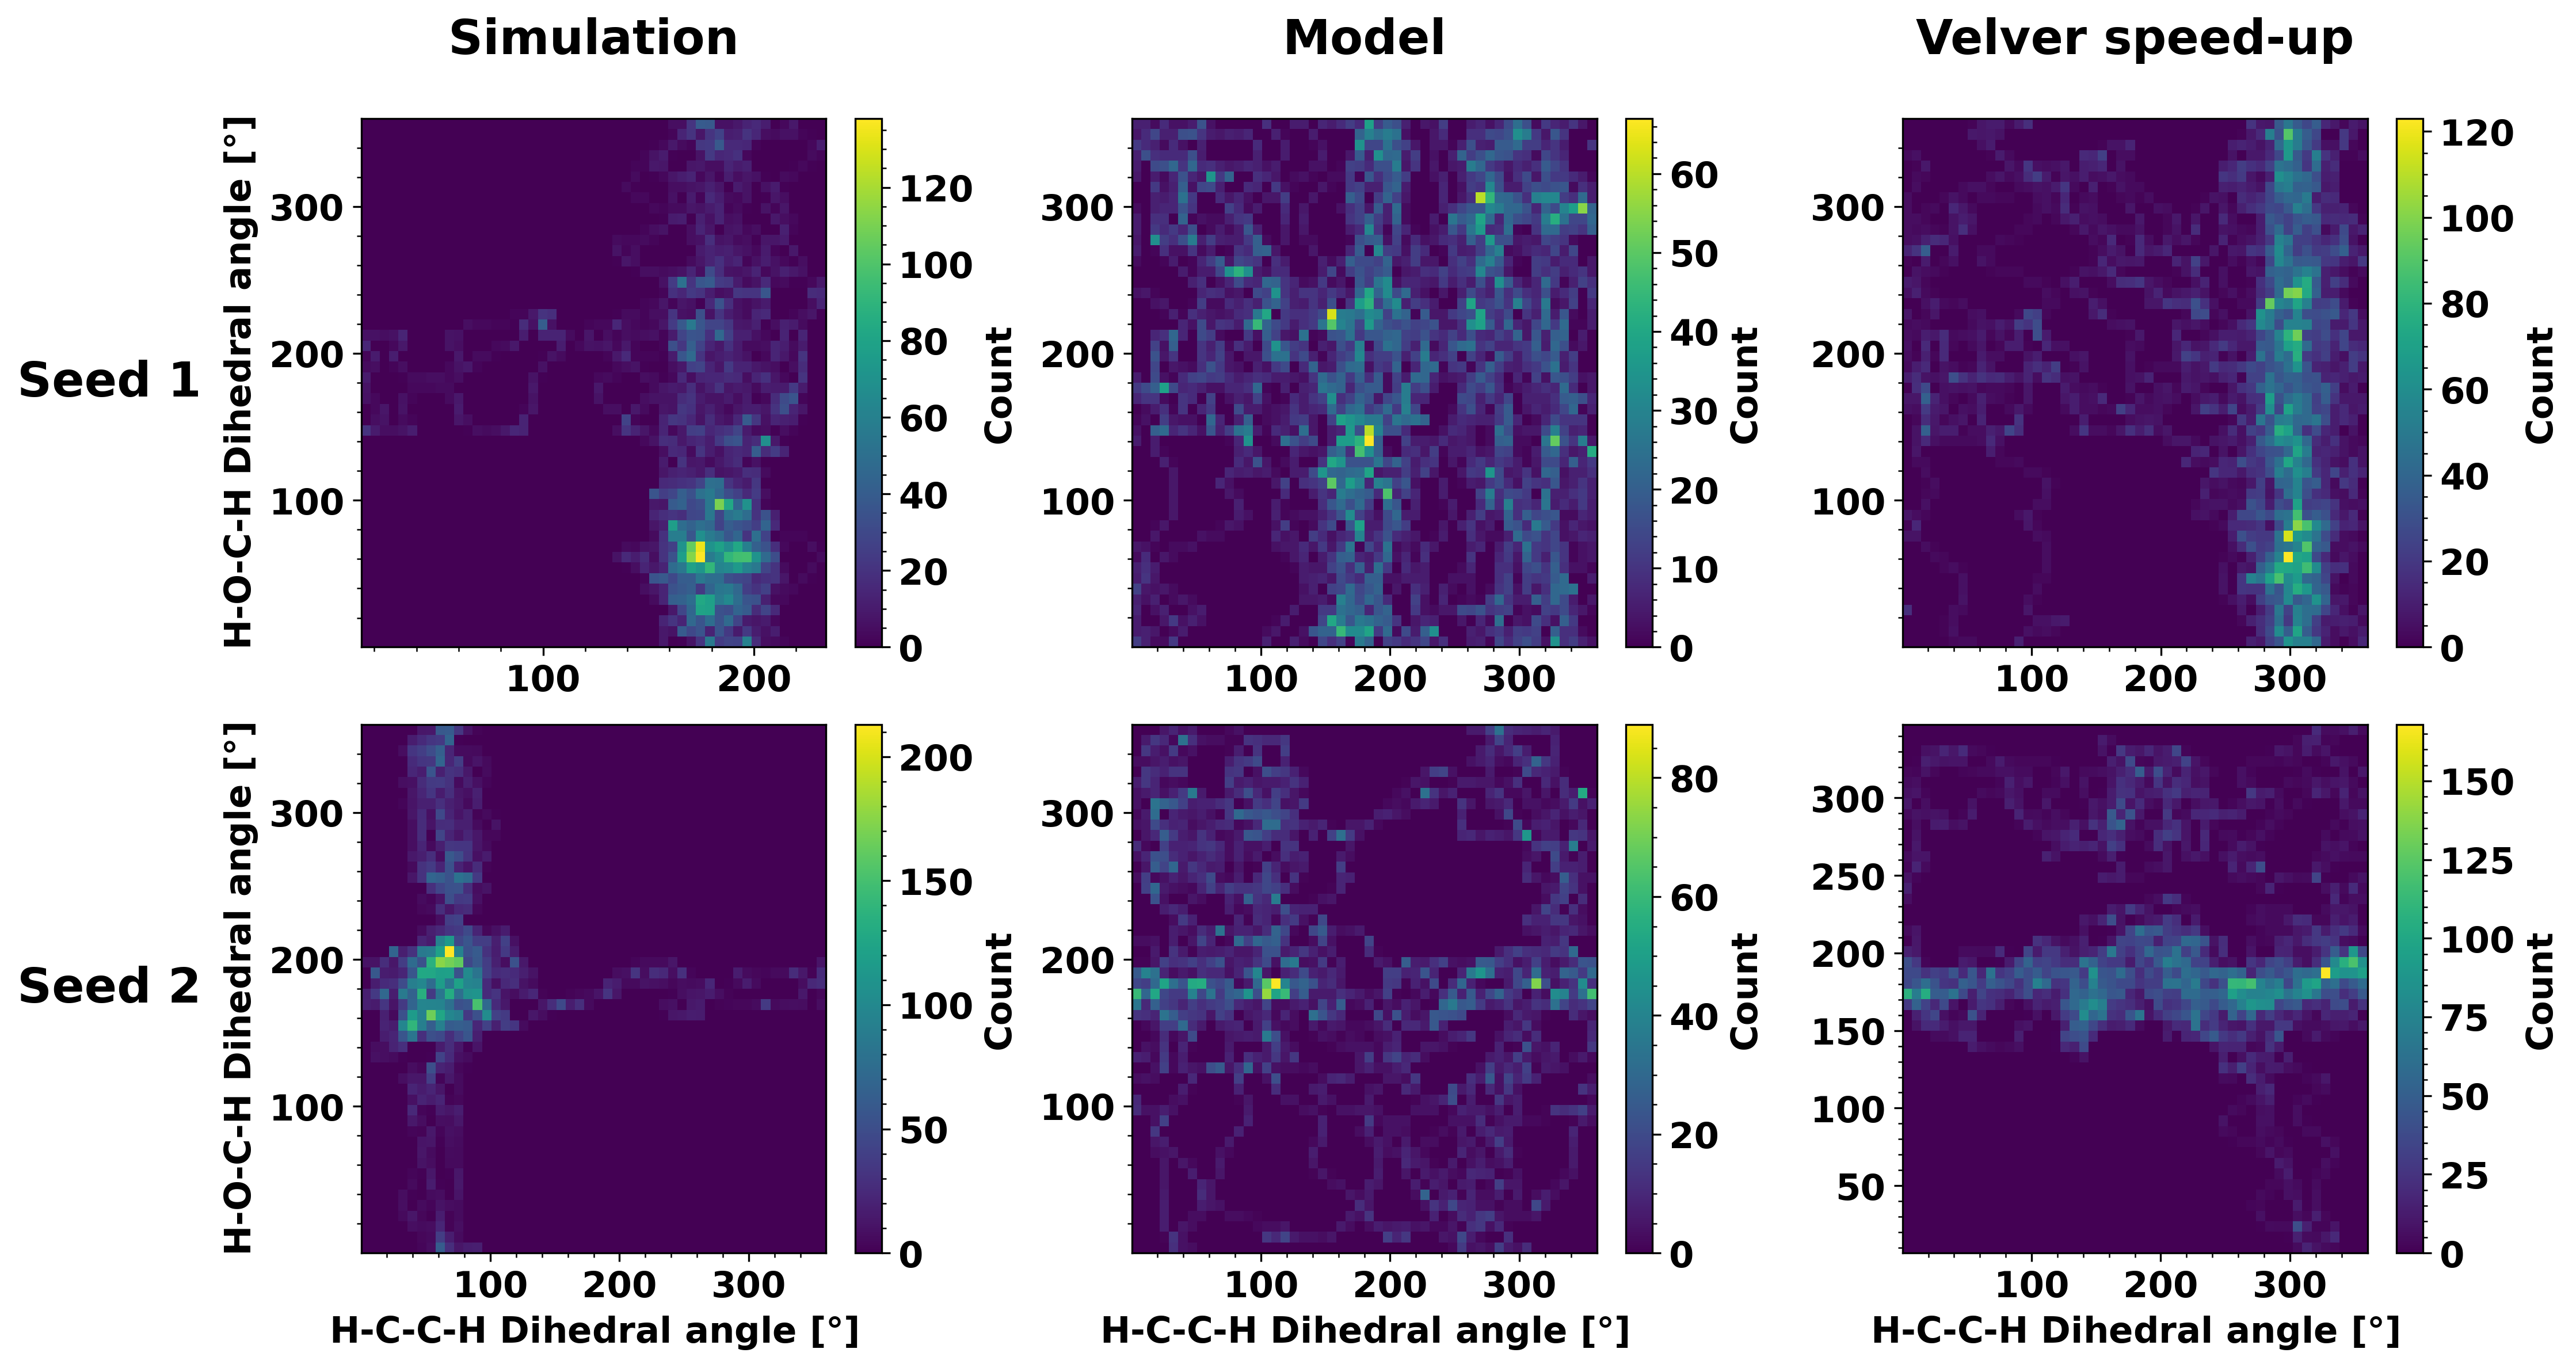

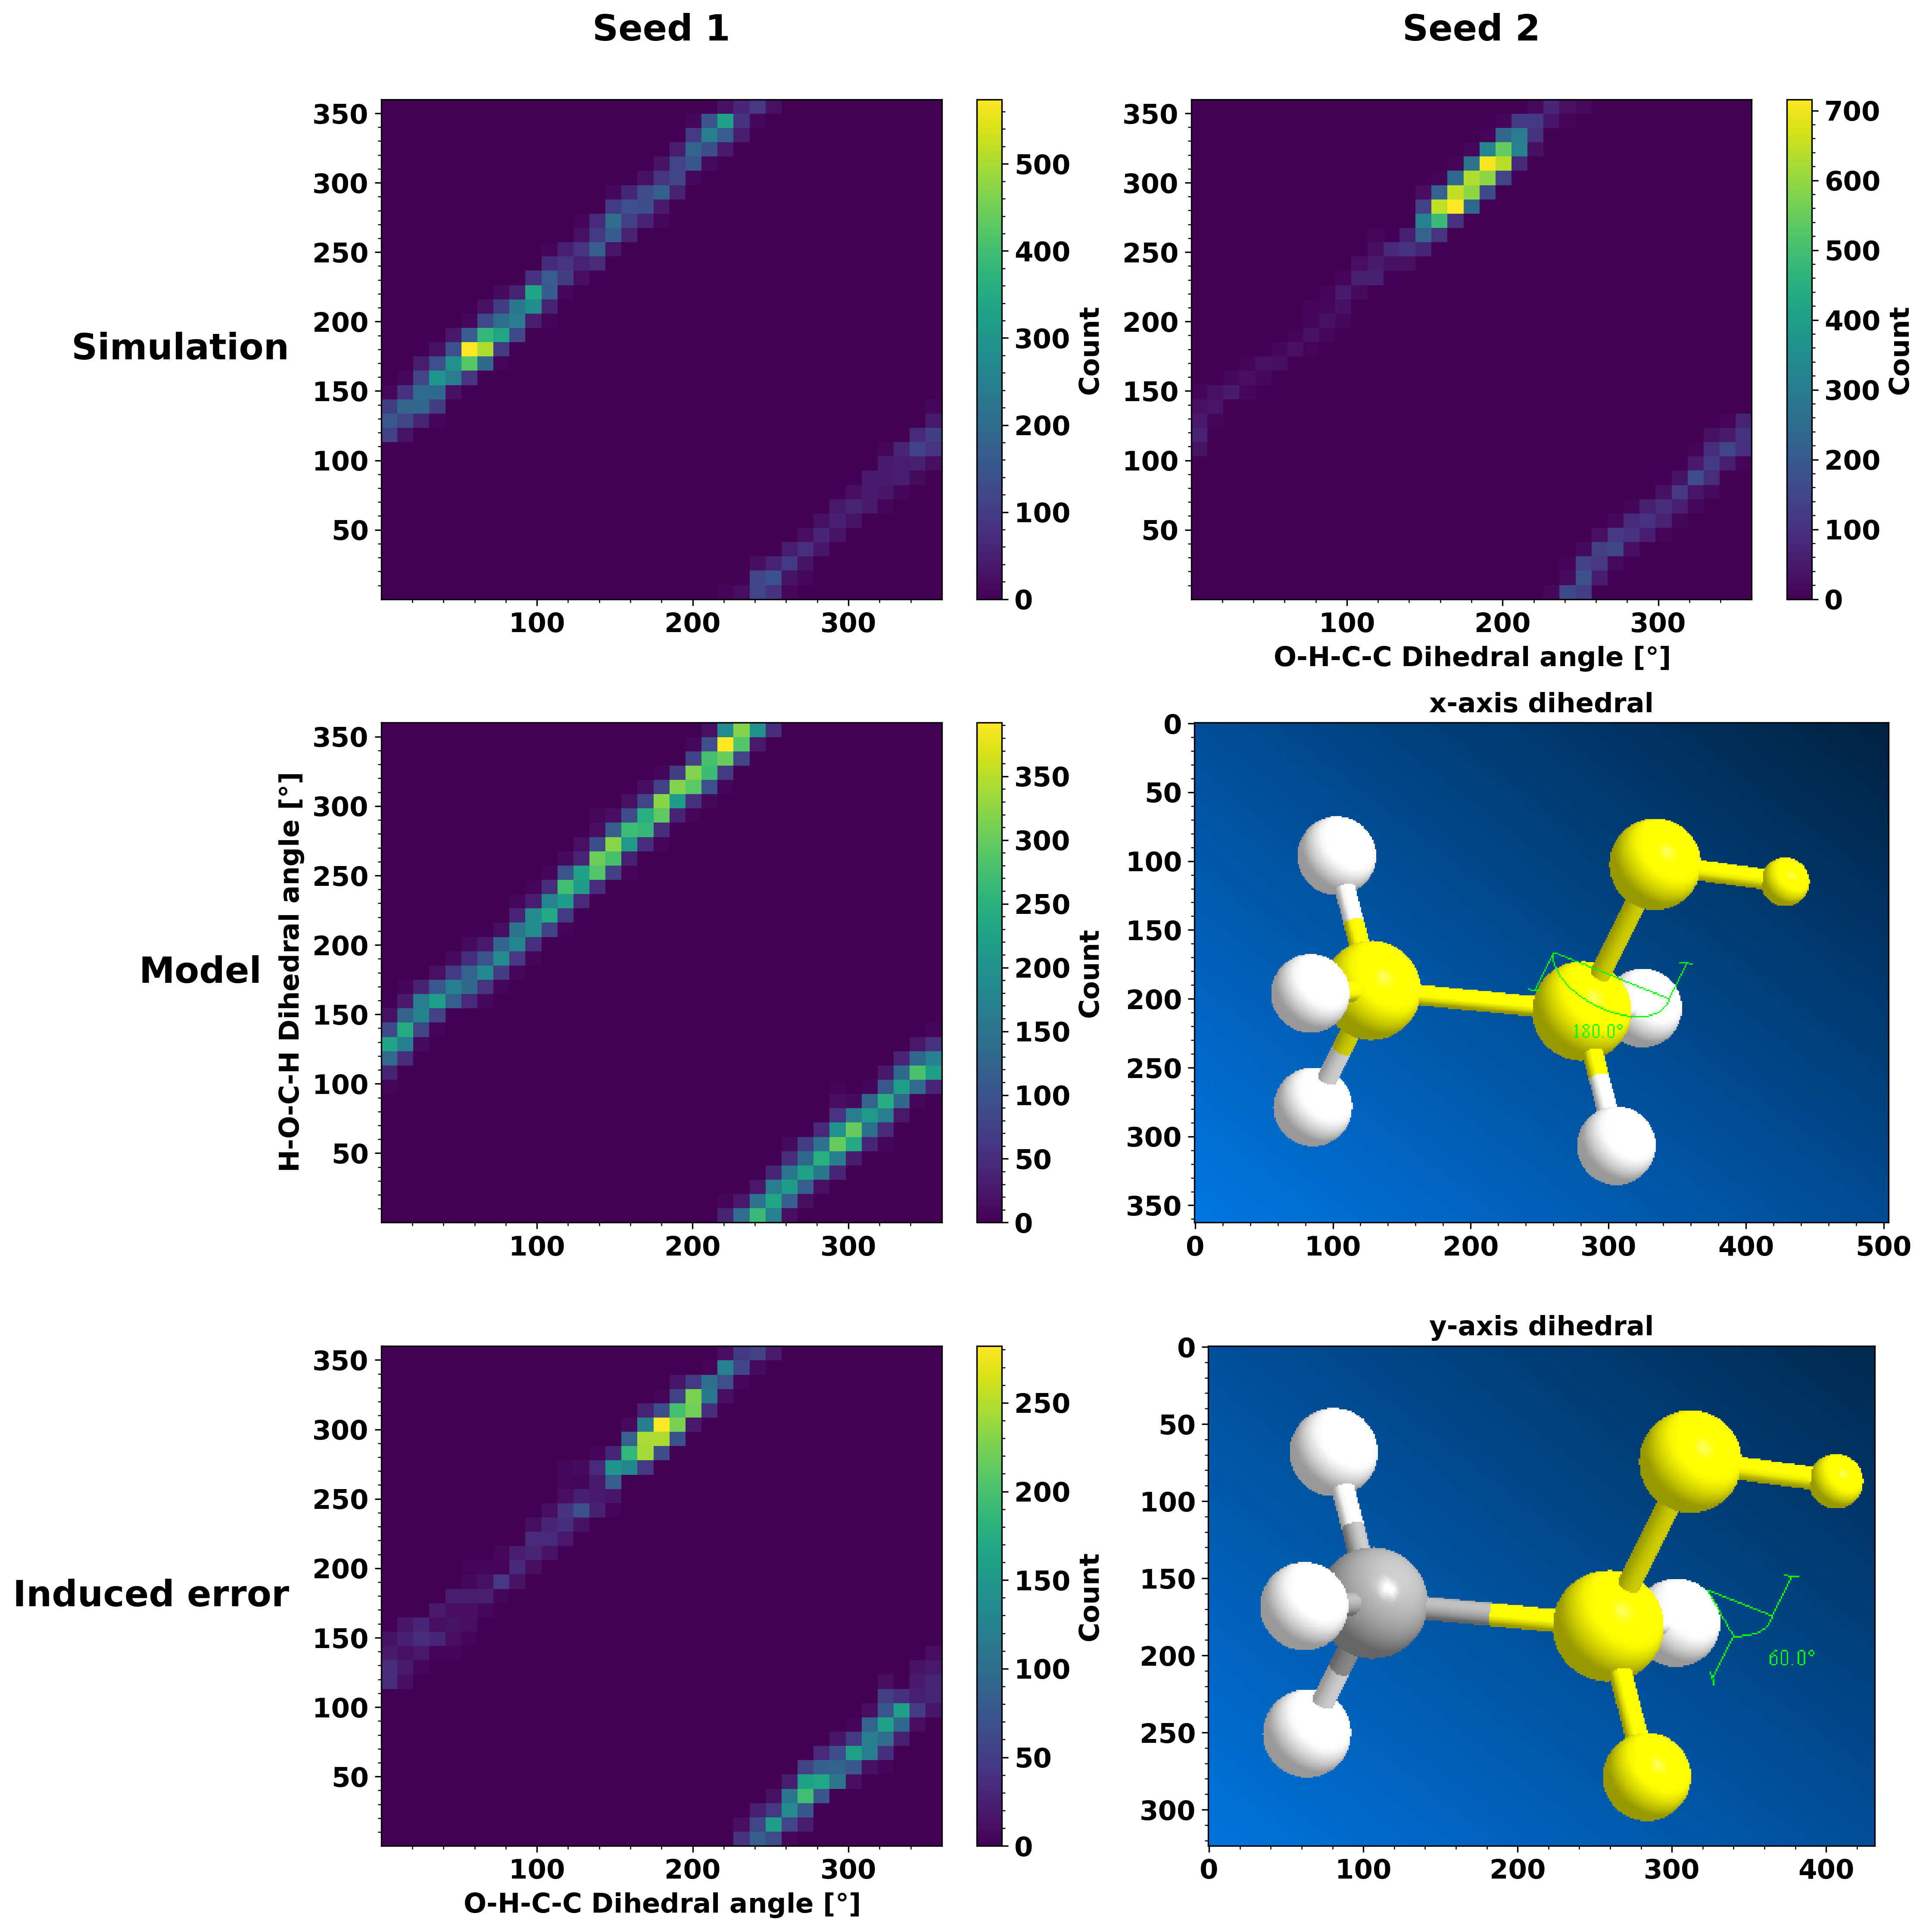

In [37]:
N_bins = 35
plot_index = 0
#x_range = (distances_model[bonds[plot_index][0], bonds[plot_index][1], :].min(), distances_model[bonds[plot_index][0], bonds[plot_index][1], :].max())

fig, ax = plt.subplots(3, 2, figsize=(15,15))

h1 = ax[0,0].hist2d(dihedral_conformer_seed_1, dihedral_O_seed_1, bins=N_bins)
h2 = ax[1,0].hist2d(dihedral_conformer_model_2, dihedral_O_model_2, bins=N_bins)
h3 = ax[2,0].hist2d(dihedral_conformer_error, dihedral_O_error, bins=N_bins)
h4 = ax[0,1].hist2d(dihedral_conformer_seed_2, dihedral_O_seed_2, bins=N_bins)

pad = 5 # in point
cols = ["Seed 1", "Seed 2"]
rows = ["Simulation", "Model", "Induced error"]
for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1.1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=20, ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                fontsize=20, ha='right', va='center')

ax[2,0].set_xlabel("O-H-C-C Dihedral angle [$\degree$]")
ax[0,1].set_xlabel("O-H-C-C Dihedral angle [$\degree$]")
ax[1,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")
ax[1,1].imshow(np.asarray(Image.open("../Pictures/ethanol_dihedral_HOCC.png")))
ax[2,1].imshow(np.asarray(Image.open("../Pictures/ethanol_dihedral_HOCH.png")))
ax[1,1].set_title("x-axis dihedral")
ax[2,1].set_title("y-axis dihedral")
fig.colorbar(h1[3], ax=ax[0,0], label="Count")
fig.colorbar(h2[3], ax=ax[1,0], label="Count")
fig.colorbar(h3[3], ax=ax[2,0], label="Count")
fig.colorbar(h4[3], ax=ax[0,1], label="Count")




plt.tight_layout()
plt.show()

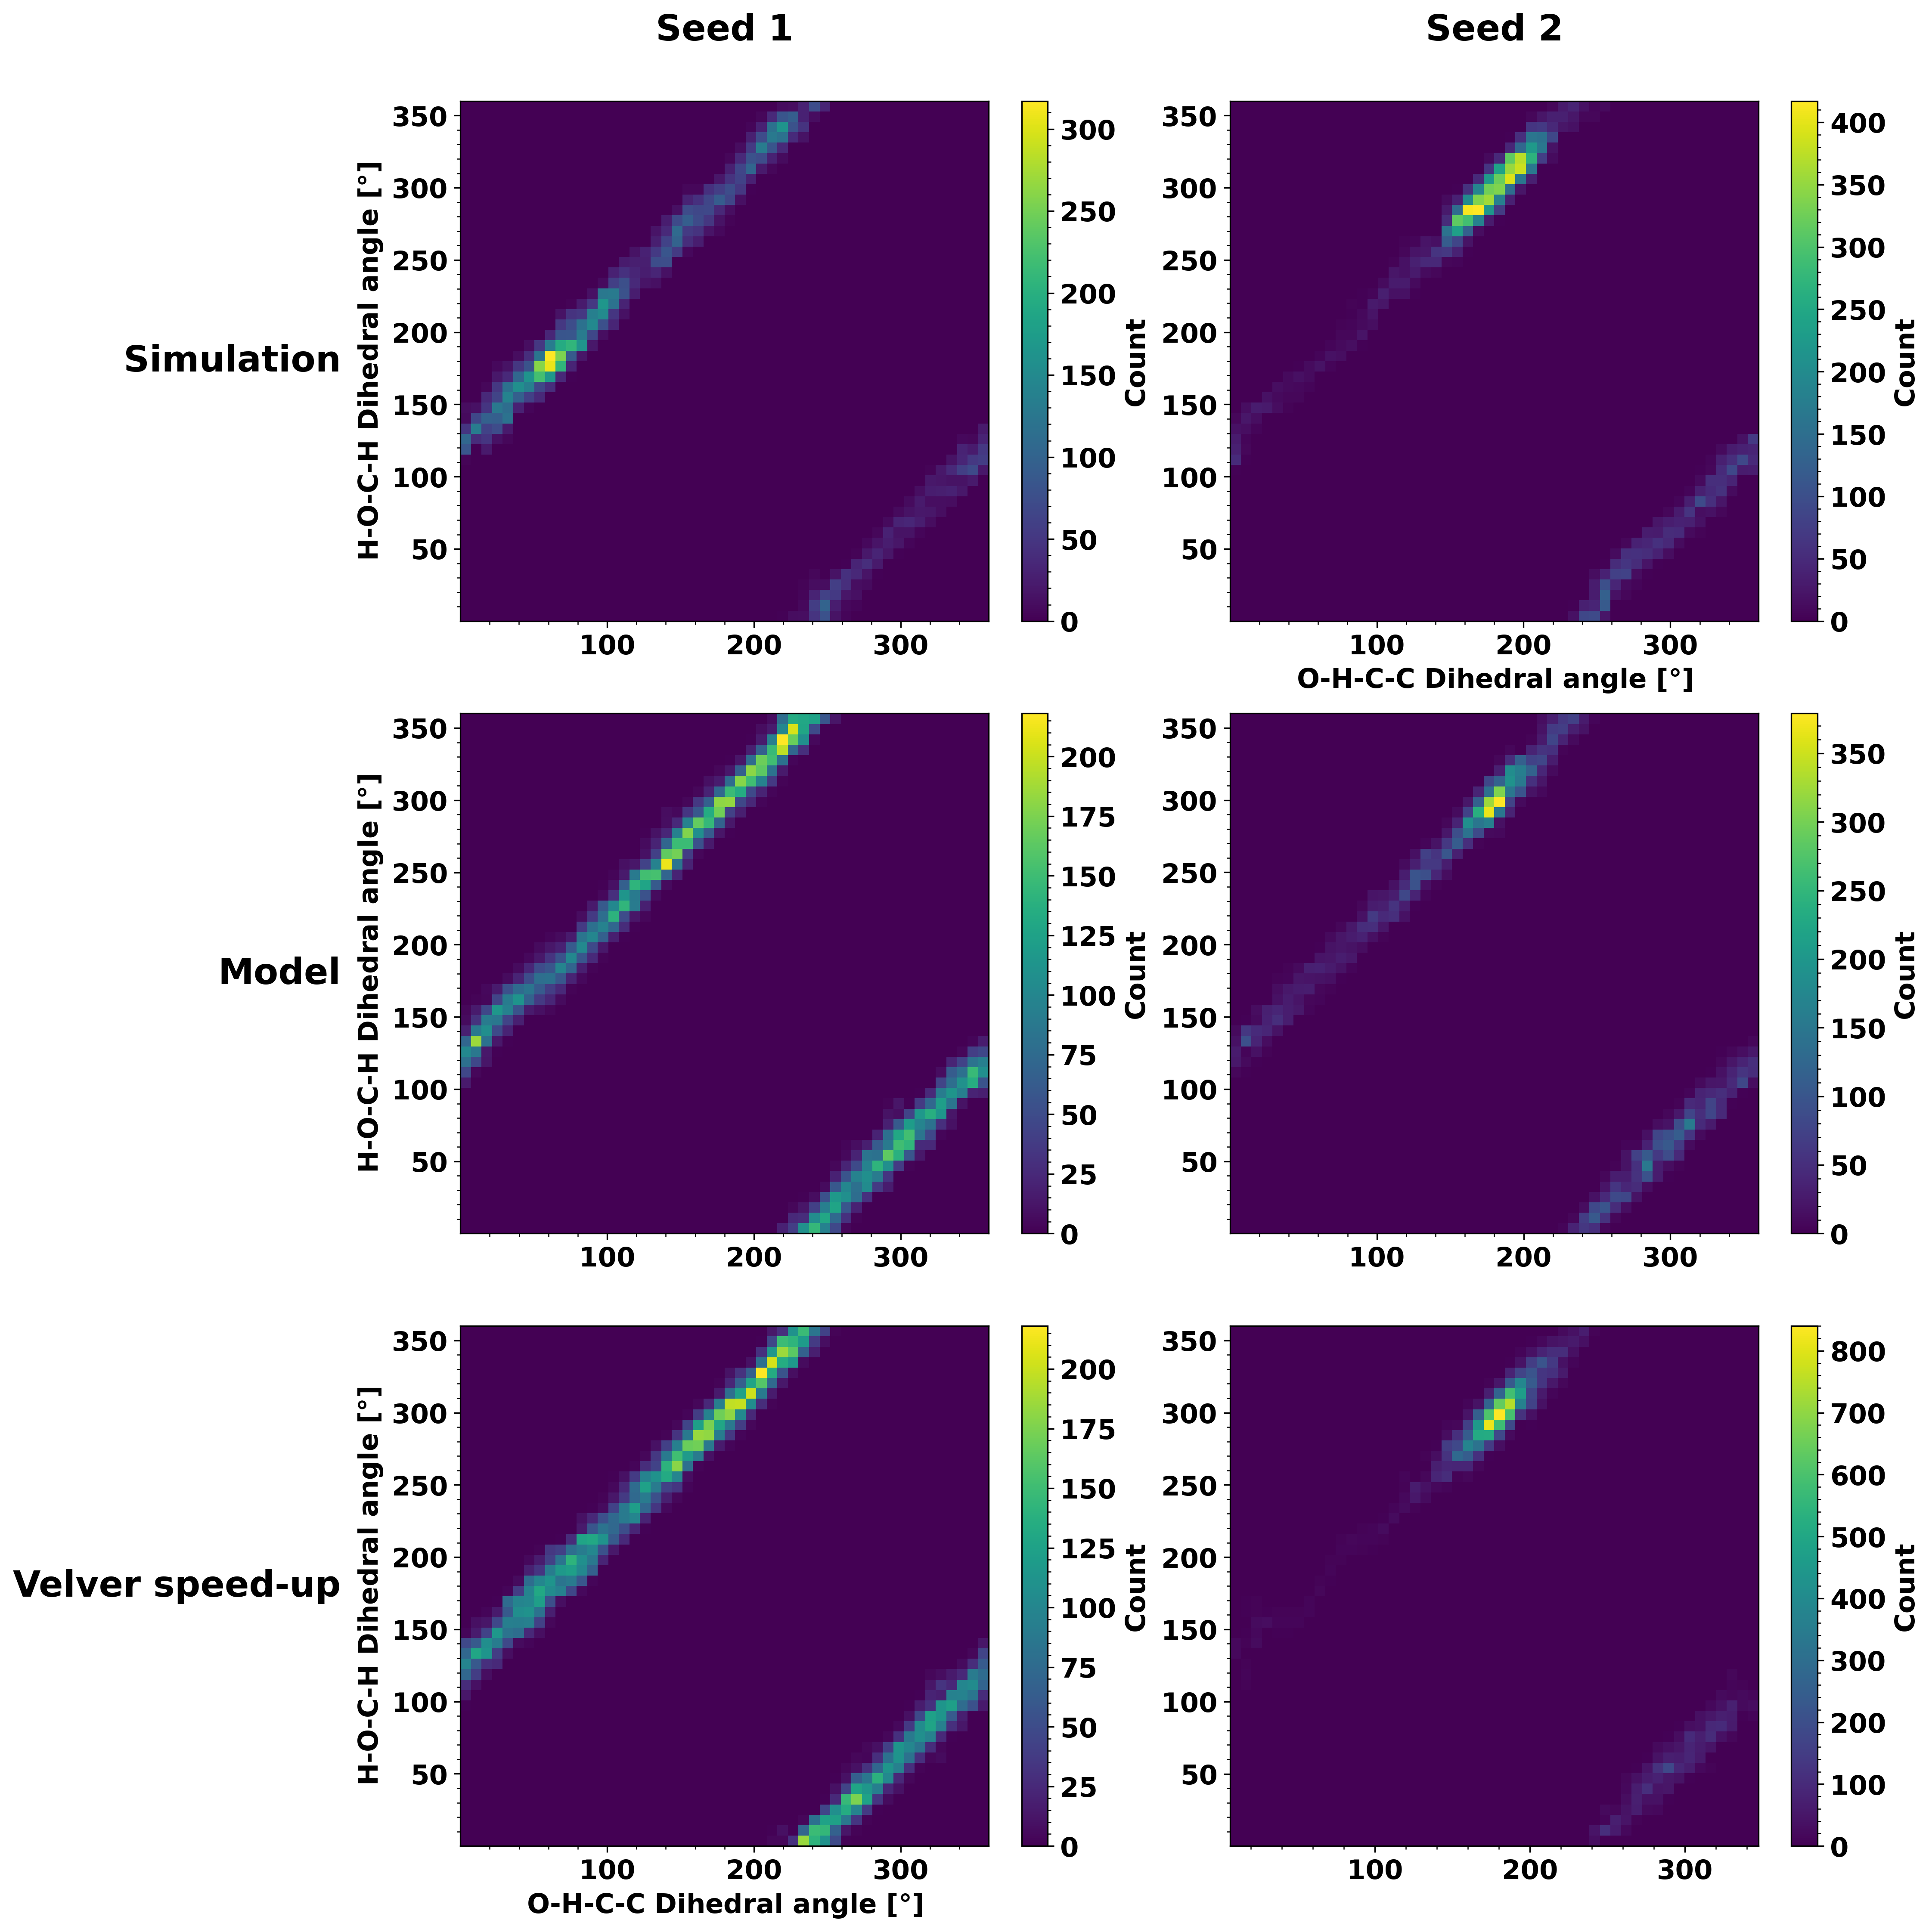

In [17]:
N_bins = 50
plot_index = 0
#x_range = (distances_model[bonds[plot_index][0], bonds[plot_index][1], :].min(), distances_model[bonds[plot_index][0], bonds[plot_index][1], :].max())

fig, ax = plt.subplots(3, 2, figsize=(15,15))

h1 = ax[0,0].hist2d(dihedral_conformer_seed_1, dihedral_O_seed_1, bins=N_bins)
h2 = ax[0,1].hist2d(dihedral_conformer_seed_2, dihedral_O_seed_2, bins=N_bins)
h3 = ax[1,0].hist2d(dihedral_conformer_model_1, dihedral_O_model_1, bins=N_bins)
h4 = ax[1,1].hist2d(dihedral_conformer_model_2, dihedral_O_model_2, bins=N_bins)
h5 = ax[2,0].hist2d(dihedral_conformer_vel_1, dihedral_O_vel_1, bins=N_bins)
h6 = ax[2,1].hist2d(dihedral_conformer_vel_2, dihedral_O_vel_2, bins=N_bins)

pad = 5 # in point
cols = ["Seed 1", "Seed 2"]
rows = ["Simulation", "Model", "Velver speed-up"]
for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1.1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=20, ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                fontsize=20, ha='right', va='center')

ax[2,0].set_xlabel("O-H-C-C Dihedral angle [$\degree$]")
ax[0,1].set_xlabel("O-H-C-C Dihedral angle [$\degree$]")
ax[0,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")
ax[1,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")
ax[2,0].set_ylabel("H-O-C-H Dihedral angle [$\degree$]")

fig.colorbar(h1[3], ax=ax[0,0], label="Count")
fig.colorbar(h2[3], ax=ax[0,1], label="Count")
fig.colorbar(h3[3], ax=ax[1,0], label="Count")
fig.colorbar(h4[3], ax=ax[1,1], label="Count")
fig.colorbar(h5[3], ax=ax[2,0], label="Count")
fig.colorbar(h6[3], ax=ax[2,1], label="Count")




plt.tight_layout()
plt.show()


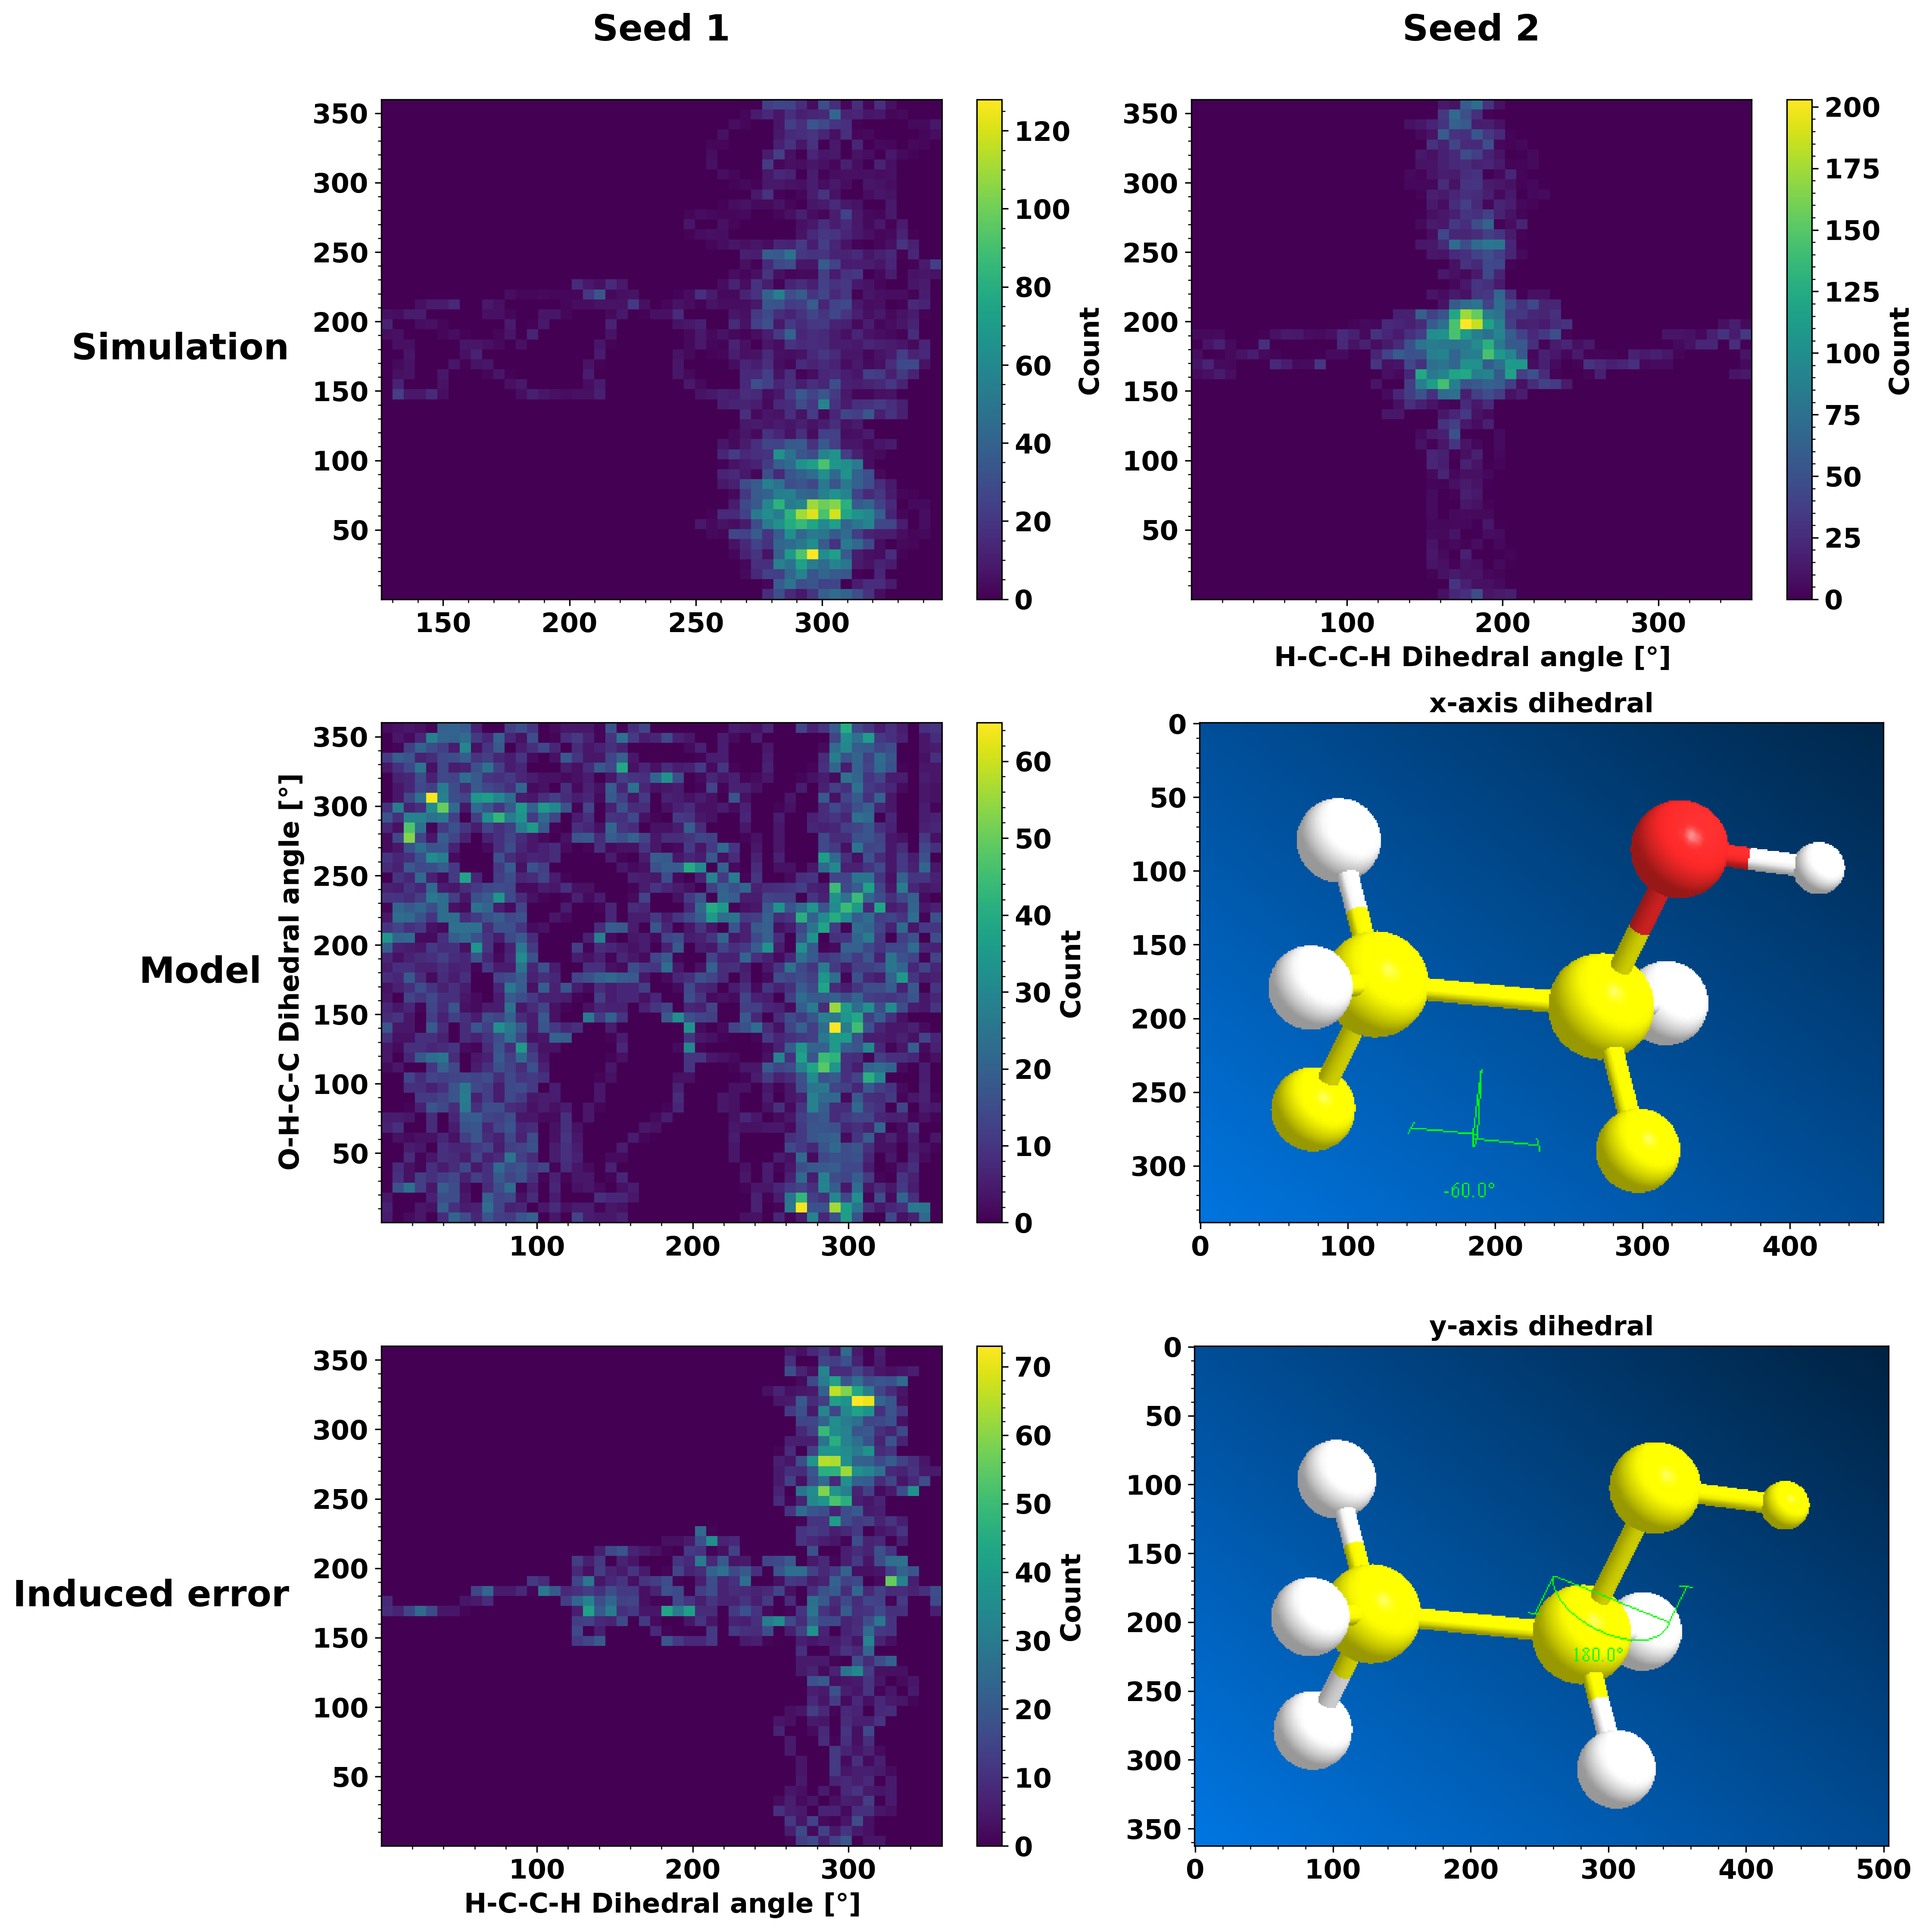

In [38]:
N_bins = 50
plot_index = 0
#x_range = (distances_model[bonds[plot_index][0], bonds[plot_index][1], :].min(), distances_model[bonds[plot_index][0], bonds[plot_index][1], :].max())

fig, ax = plt.subplots(3, 2, figsize=(15,15))

h1 = ax[0,0].hist2d(dihedral_C_seed_1, dihedral_conformer_seed_1, bins=N_bins)
h2 = ax[1,0].hist2d(dihedral_C_model_2, dihedral_conformer_model_2, bins=N_bins)
h3 = ax[2,0].hist2d(dihedral_C_error, dihedral_conformer_error, bins=N_bins)
h4 = ax[0,1].hist2d(dihedral_C_seed_2, dihedral_conformer_seed_2, bins=N_bins)

pad = 5 # in point
cols = ["Seed 1", "Seed 2"]
rows = ["Simulation", "Model", "Induced error"]
for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1.1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=20, ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                fontsize=20, ha='right', va='center')

ax[2,0].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[0,1].set_xlabel("H-C-C-H Dihedral angle [$\degree$]")
ax[1,0].set_ylabel("O-H-C-C Dihedral angle [$\degree$]")
ax[1,1].imshow(np.asarray(Image.open("../Pictures/ethanol_dihedral_HCCH.png")))
ax[2,1].imshow(np.asarray(Image.open("../Pictures/ethanol_dihedral_HOCC.png")))
ax[1,1].set_title("x-axis dihedral")
ax[2,1].set_title("y-axis dihedral")
fig.colorbar(h1[3], ax=ax[0,0], label="Count")
fig.colorbar(h2[3], ax=ax[1,0], label="Count")
fig.colorbar(h3[3], ax=ax[2,0], label="Count")
fig.colorbar(h4[3], ax=ax[0,1], label="Count")




plt.tight_layout()
plt.show()

# Conformational analysis

In [41]:
def evaluate_isomer_vec(mol):
    proj = np.zeros(len(mol))
    for i, atom in enumerate(mol):
        pos = atom.get_positions()
        a = pos[8,:]-pos[2,:]
        b = pos[1,:]-pos[0,:]
        proj[i] = np.dot(a, b/np.linalg.norm(b))
    return proj

In [42]:
isomer_seed1 = evaluate_isomer_vec(read(directory+"EtOH_moldyn_data_500.xyz", index=":"))
isomer_seed2 = evaluate_isomer_vec(read(directory+"EtOH_moldyn_data_700.xyz", index=":"))
isomer_model1 = evaluate_isomer_vec(read(directory+"SVD_not_regularized12_2_500.xyz", index=":"))
isomer_model2 = evaluate_isomer_vec(read(directory+"SVD_regularized12_2_500_v2.xyz", index=":"))
isomer_model3 = evaluate_isomer_vec(read(directory+"SVD_not_regularized15_4_500.xyz", index=":"))
isomer_model4 = evaluate_isomer_vec(read(directory+"SVD_regularized15_4_500.xyz", index=":"))
isomer_velver = evaluate_isomer_vec(read(directory+"Velverlet_12_500.xyz", index=":"))
isomer_velver2 = evaluate_isomer_vec(read(directory+"Velverlet_12_700.xyz", index=":"))
isomer_model_700 = evaluate_isomer_vec(read(directory+"speed_up_ethanol12_2_700.xyz", index=":"))

(518, 481, 4)


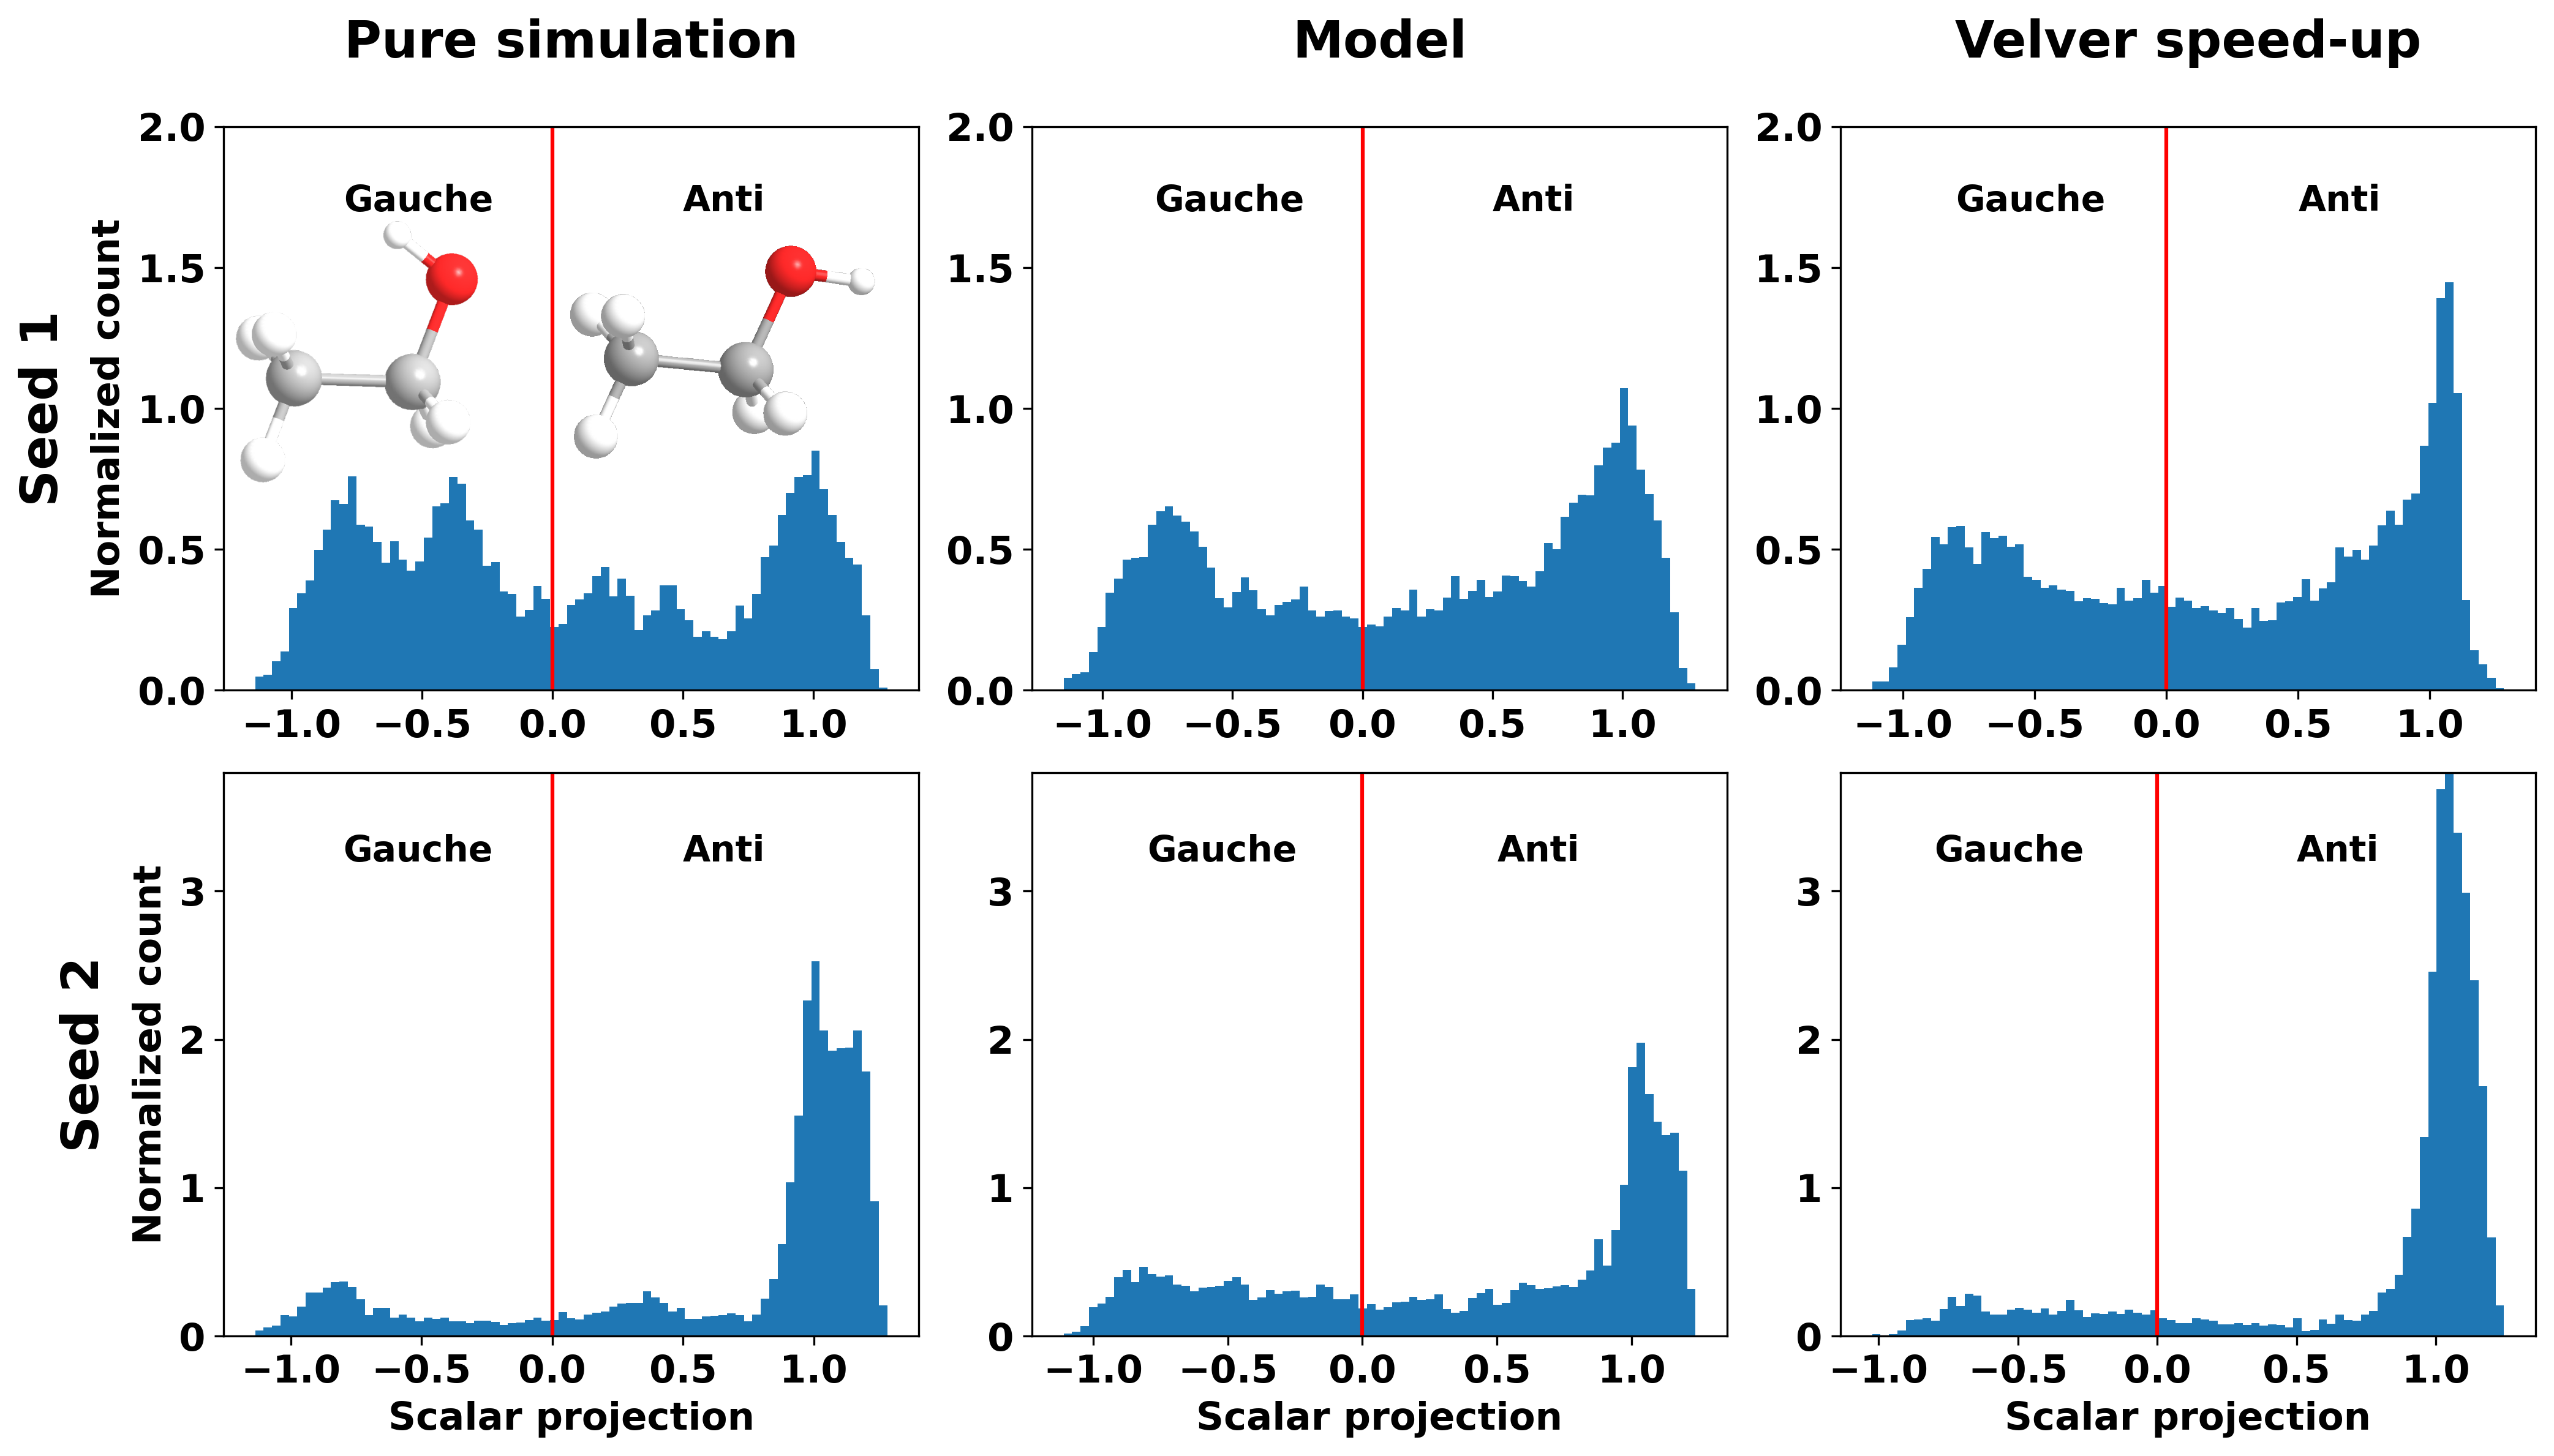

In [54]:
fig, ax = plt.subplots(2, 3, figsize=(14,8))
nbins = 75
ax[0, 0].hist(isomer_seed1, bins=nbins, density=True)
ax[0, 1].hist(isomer_model1, bins=nbins, density=True)
ax[0, 2].hist(isomer_velver, bins=nbins, density=True)
ax[1, 0].hist(isomer_seed2, bins=nbins, density=True)
ax[1, 1].hist(isomer_model_700, bins=nbins, density=True)
ax[1, 2].hist(isomer_velver2, bins=nbins, density=True)
ax[0, 0].set_ylabel("Normalized count")
ax[1, 0].set_ylabel("Normalized count")

titles = ["Simulation", "$t=15, p=4, \lambda=0$", "$t=12, p=2, \lambda=0$", r"$t=15, p=4, \lambda\approx 8.6e-05$", r"$t=12, p=2, \lambda\approx 1.2e-04$", "Velver"]
for i in range(3):
    ax[0, i].set_ylim(0, 2)
    ax[1, i].set_ylim(0, 3.8)
    ax[0, i].text(-0.8, 1.7, "Gauche", fontsize=14)
    ax[0, i].text(0.5, 1.7, "Anti", fontsize=14)
    ax[1, i].text(-0.8, 3.2, "Gauche", fontsize=14)
    ax[1, i].text(0.5, 3.2, "Anti", fontsize=14)
    for j in range(2):
        ax[j, i].vlines(0, 0, 1000, color="r")
        ax[j, i].minorticks_off()
        #ax[j, i].set_title(titles[2*i+j])
img_gauche = plt.imread("D:\KU\Masters\Gemma_group\Master thesis\Pictures/Gauche_config_2.PNG", "png")
img_anti = plt.imread("D:\KU\Masters\Gemma_group\Master thesis\Pictures/Anti_config_2.PNG")
print(img_gauche.shape)
images = [img_gauche, img_anti]
loc = [(-0.75, 1.2), (0.65, 1.2)]
for i in range(2):
    #mask = np.where(images[i][:,:,0]==1)
    #images[i][mask[0],mask[1], 3]=0
    imagebox = OffsetImage(images[i], zoom=0.2)
    ab = AnnotationBbox(imagebox, loc[i], frameon=False)
    ax[0, 0].add_artist(ab)
pad = 5 # in point
rows = ["Seed 1", "Seed 2"]
cols = ["Pure simulation", "Model", "Velver speed-up"]
for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1.1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=20, ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                fontsize=20, ha='right', va='center', rotation="vertical")

ax[1, 0].minorticks_off()
ax[1, 0].set_xlabel("Scalar projection")
ax[1, 1].set_xlabel("Scalar projection")
ax[1, 2].set_xlabel("Scalar projection")
plt.tight_layout()
plt.show()

(518, 481, 4)


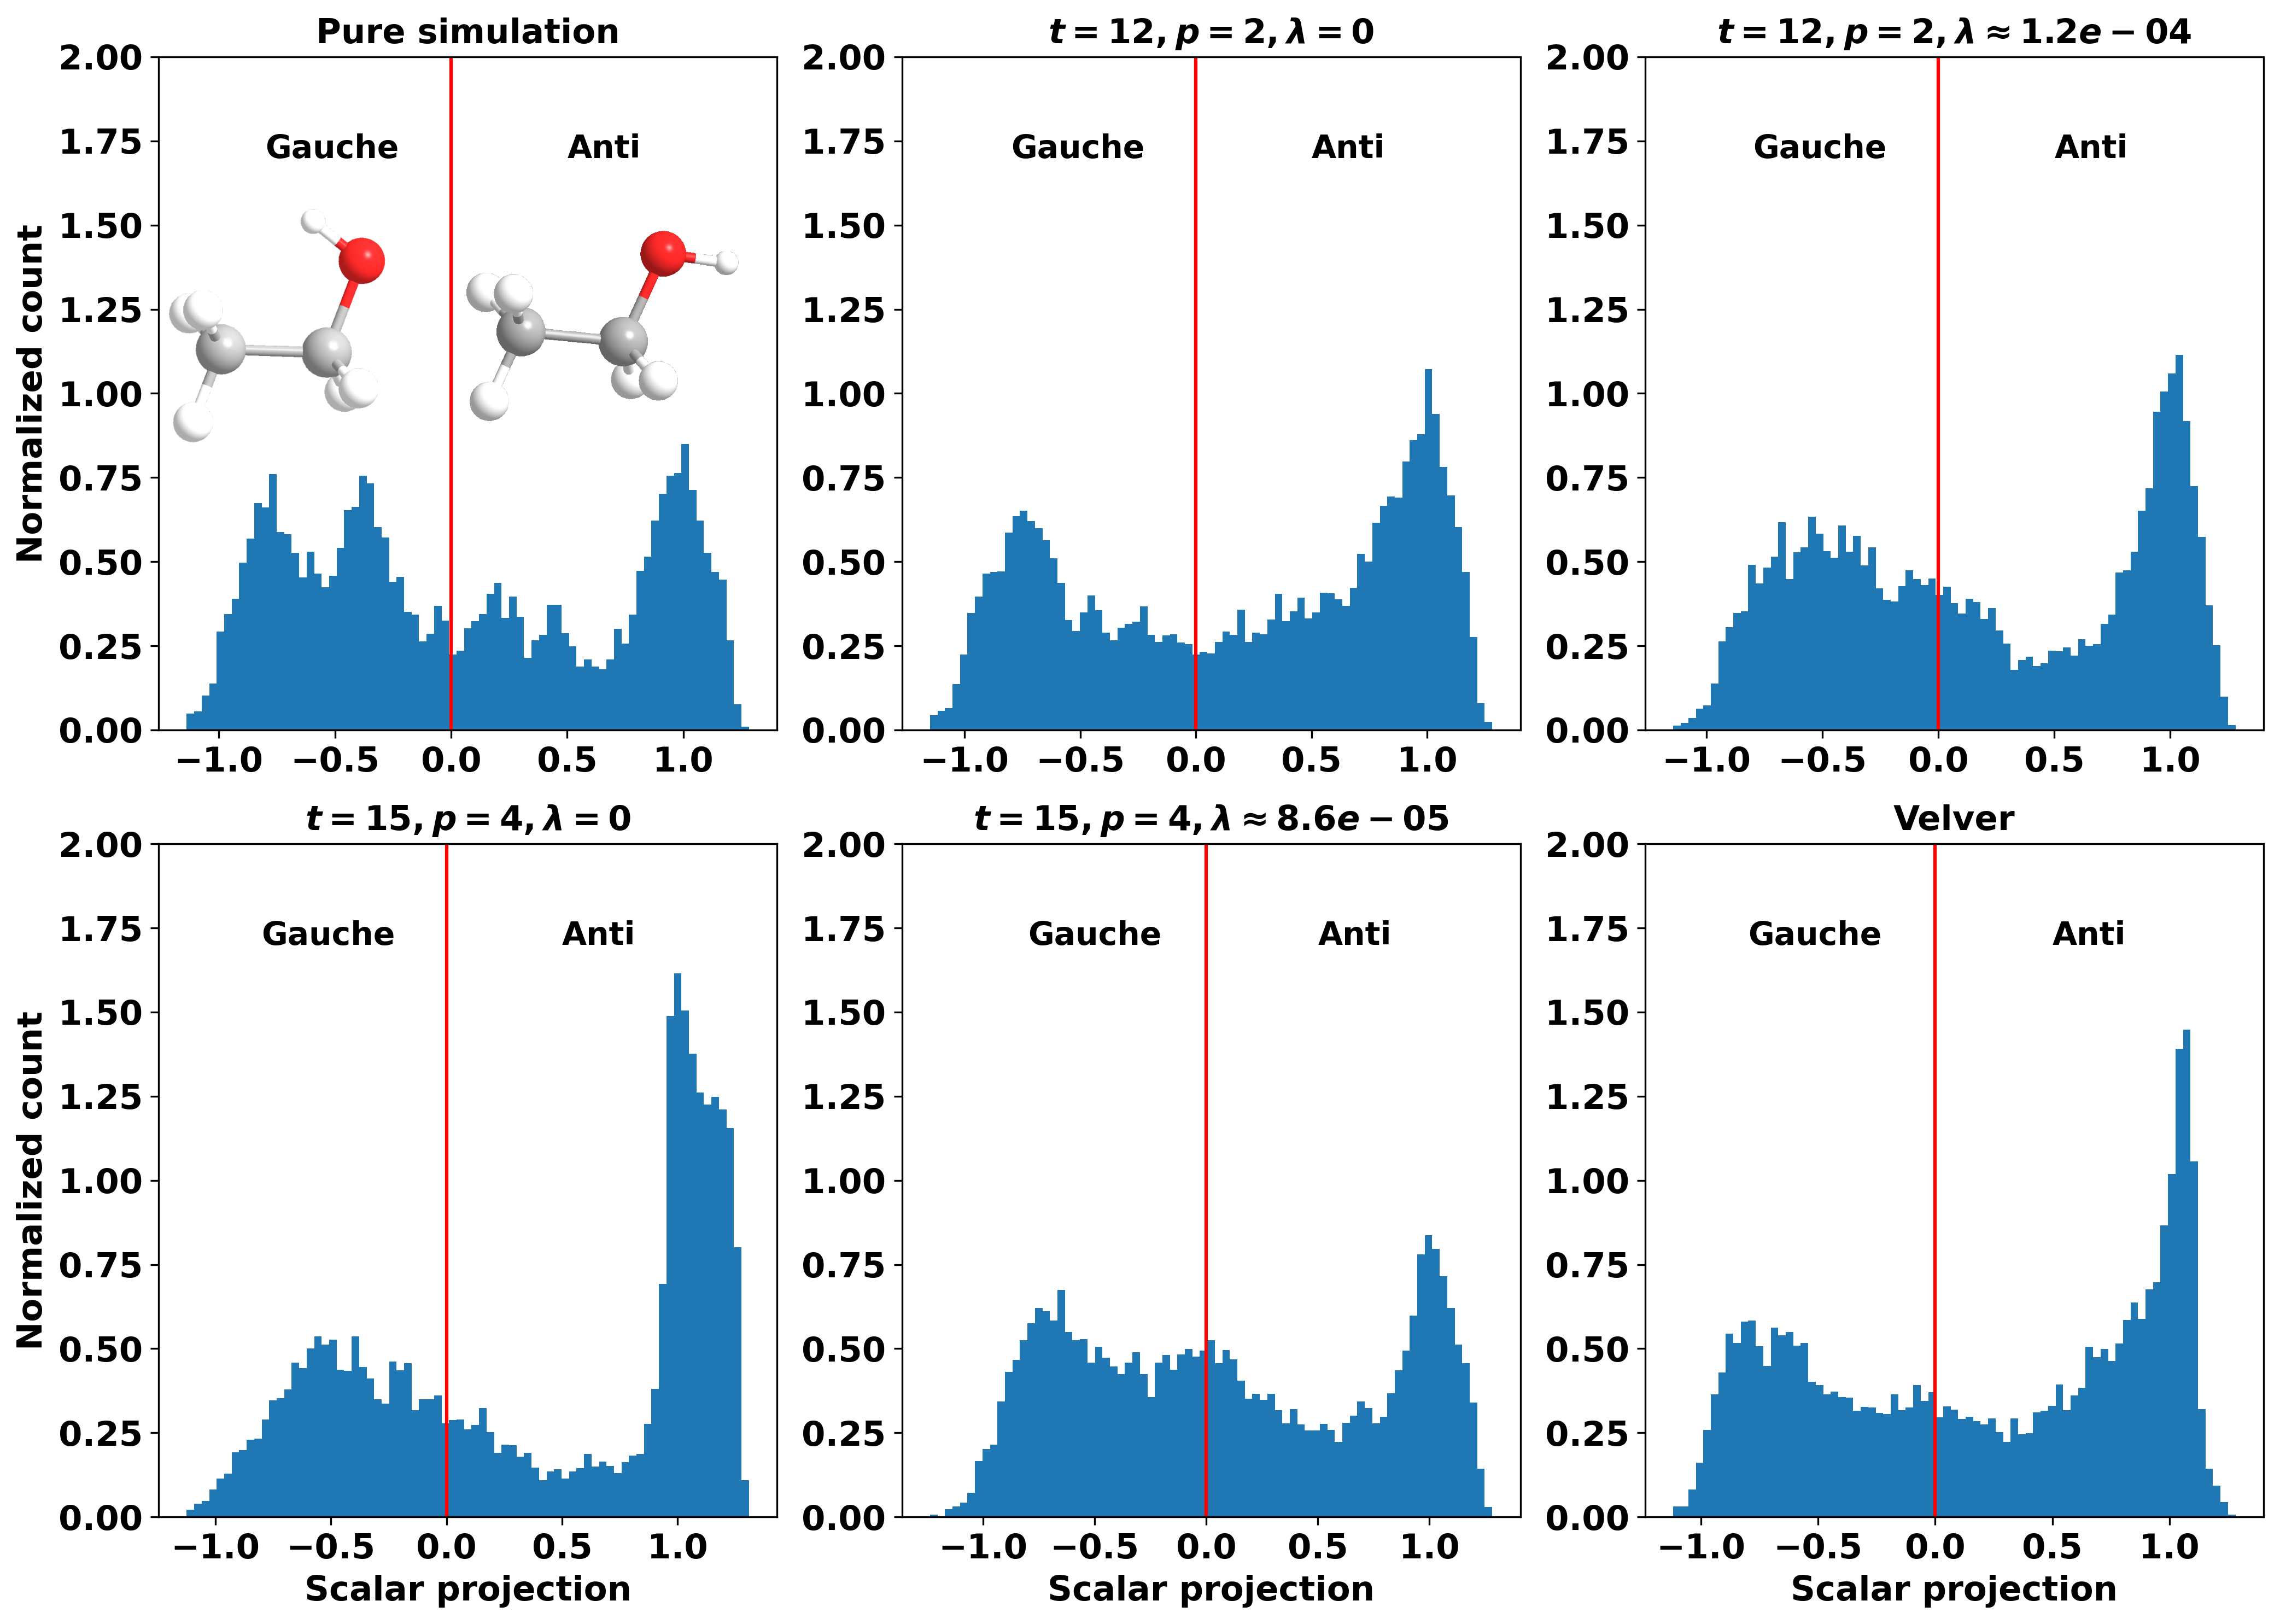

In [55]:
fig, ax = plt.subplots(2, 3, figsize=(14,10))
nbins = 75
ax[0, 0].hist(isomer_seed1, bins=nbins, density=True)
ax[0, 1].hist(isomer_model1, bins=nbins, density=True)
ax[0, 2].hist(isomer_model2, bins=nbins, density=True)
ax[1, 0].hist(isomer_model3, bins=nbins, density=True)
ax[1, 1].hist(isomer_model4, bins=nbins, density=True)
ax[1, 2].hist(isomer_velver, bins=nbins, density=True)
ax[0, 0].set_ylabel("Normalized count")
ax[1, 0].set_ylabel("Normalized count")

titles = ["Pure simulation", "$t=15, p=4, \lambda=0$", "$t=12, p=2, \lambda=0$", r"$t=15, p=4, \lambda\approx 8.6e-05$", r"$t=12, p=2, \lambda\approx 1.2e-04$", "Velver"]
img_gauche = plt.imread("D:\KU\Masters\Gemma_group\Master thesis\Pictures/Gauche_config_2.PNG", "png")
img_anti = plt.imread("D:\KU\Masters\Gemma_group\Master thesis\Pictures/Anti_config_2.PNG")
print(img_gauche.shape)
images = [img_gauche, img_anti]
loc = [(-0.75, 1.2), (0.65, 1.2)]
for i in range(2):
    #mask = np.where(images[i][:,:,0]==1)
    #images[i][mask[0],mask[1], 3]=0
    imagebox = OffsetImage(images[i], zoom=0.2)
    ab = AnnotationBbox(imagebox, loc[i], frameon=False)
    ax[0, 0].add_artist(ab)
for i in range(3):
    for j in range(2):
        ax[j, i].text(-0.8, 1.7, "Gauche", fontsize=14)
        ax[j, i].text(0.5, 1.7, "Anti", fontsize=14)
        ax[j, i].vlines(0, 0, 1000, color="r")
        ax[j, i].set_ylim(0, 2)
        ax[j, i].minorticks_off()
        ax[j, i].set_title(titles[2*i+j])

ax[1, 0].set_ylim(0, 2)
ax[1, 0].minorticks_off()
ax[1, 0].set_xlabel("Scalar projection")
ax[1, 1].set_xlabel("Scalar projection")
ax[1, 2].set_xlabel("Scalar projection")
plt.tight_layout()
plt.show()